# Example 1, Lindeborgs Gård : running various scenarios

In [4]:
import sys, os
# add module directory to system path, relative
sys.path.insert(0, os.path.join('..', 'farm_biochar_model'))
# add module directory to system path, absolute
sys.path.insert(0, os.path.join(os.getcwd(),'..', 'farm_biochar_model')) 

# import components of farm_biochar_model
import farm_demand as fd # energy demand
import farm_supply as fs # energy supply
import farm_ficus as ff # unit commitment solver
import farm_bw2 as fb # life cycle analysis

# other libraries (in environment)
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

## Define some input data

### Energy demand and supply

In [5]:
# absolute folder path
afp = 'C:/Users/eazzi/Box Sync/KTH_PhD_HeavyData/P2_farm_biochar'
ex = '/ex1_Lindeborgs'

# SMHI Weather data
smhi_folder = afp+ex+'/input_files/'
smhi_files=['smhi-opendata_1_86420_20190321_121405.csv', 'smhi-opendata_1_86420_20190321_121419.csv']

# Heating demand
ref_year= ['1996', '2010'] #'2017' # Heat demand reference year
T_max = 17 # Outdoor temperature above which no heating is required

# Building properties
# 3 buildings
a = np.array([400, 100, 89]) #m2
e = np.array([90, 200, 150*1.6]) #kWh/m2/yr, from Boverket, PEF-corrected
w = np.array([0.08, 0.065, 0.05])# share hot water

#Case 1: electricity based declarations
c = np.array([1/1.6*3, 1/1.6*3, 1/1.6*3]) # /PEF *COP; worst case el values
#Case 2: solid biomass fuel, PEF = 1 and EFF = 0.9 (Krav to be above 0.87, Boverket regulation)
c = np.array([1/0.9, 1/0.9, 1/0.9]) # /PEF * EFF (biomass) or /PEF * COP (heat pump)

# Annual electrical demand
elec_yr = 11000 # kWh

# Year to study
year='2018'
scenario = 'b17intermed'
list_years=['2015', '2017']

### Ficus parameters
See ficus documentation, for details https://ficus.readthedocs.io/

In [6]:
# Select heating plants:
plants_folder= afp+'/farm_biochar_model/'
plants_file= 'farm_supply_plants.xlsx'
# Plants of interest, for the scenario
plantsAvailable = ['pyr', 'el. heater'] # select among list in plants_file

# Time steps
tb = 3600*24 # s, e.g. hourly = 3600; monthly = 3600*730 (h/month); daily = 3600*24 
tb_start = 1 # interval for optimisation, 1..365 = full year
tb_end = 365 # # e.g. daily, 365 = last day of the year

# List of commodities
commodities_imp = ['elec', 'pellets'] # importable commodities
commodities_exp = ['elec', 'biochar'] # exportable commodities
commodities = commodities_imp + list(set(commodities_exp) - set(commodities_imp)) # all commodities, unique list
import_max = ['inf', 'inf', 0] # in order as commodities
export_max = ['inf', 0, 'inf'] 

# Emission factors for electricity
el_folder = afp+ex+'/input_files/'
el_file='powermix-se.xlsx'
el_tab = 'powermix-se_2018'

# Static emission factor for other commodities
ef_pellets = 0.13286474045379412 # market for wood pellets, RER kg CO2/kg dry pellets
LHV_pellets = 18/3.6 # kWh/kg dry pellets
ef_pellets = ef_pellets / LHV_pellets *1000 # gCO2/kWh dry pellets

biochar_seq = 0.8*0.8*44/12*1000 # gCO2/kg biochar; biochar is not in kWh but in kg of biochar; we assume 80% C with 80% remaining after 100y

# Input Ficus file names, scenario names
ficus_file = afp+ex+'/input_files/'
ficus_scenario = scenario+'.xlsx'

# Output Ficus 
ficus_result_folder = afp+ex+'/output_files'
result_name = os.path.splitext(os.path.split(afp+ex+'/input_files'+ficus_scenario)[1])[0]
#resultfile = os.path.join(ficus_result_folder, 'result-{}.xlsx'.format(result_name))


### Brightway2 parameters

In [4]:
# ficus output folder to bw2
bw2_folder = r"C:/Users/eazzi/Box Sync/KTH_PhD_HeavyData/P2a_farm_biochar/results/cs1_Lindeborgs_base-20190516T1829_true_ef"
bw2_file = 'result-cs1_Lindeborgs_base-20190516T1830.xlsx'
p2e=tb/3600 # 24h, conversion from kW to kWh

# ficus input folder to bw2
bw2_ficus_file = ficus_folder+ficus_file+ficus_scenario
processes = plantsAvailable

# bw2 path to db, only if project is new
ei_name = "ecoinvent 3.3 cutoff"
ei_path = "C:\\Users\\eazzi\\Box Sync\\KTH_PhD_HeavyData\\ecoinvent_3.3_cutoff_ecoSpold02\\datasets\\"

# bw2 project name and scenario_prefix_activity
proj= ex
fg_db = "farmEnergySystem"
act_suffix= scenario
fu_name= "farmEnergy_"+act_suffix


## RUN Single-scenario

In [7]:
# energy demand calculated
ref_year= ['1996', '2010']
#Case 2: solid biomass fuel, PEF = 1 and EFF = 0.9 (Krav to be above 0.87, Boverket regulation)
e = np.array([90, 90, 90]) #kWh/m2/yr, from Boverket, PEF-corrected
c = np.array([1/1*0.9, 1/1*0.9, 1/1*0.9]) # /PEF * EFF (biomass) or /PEF * COP (heat pump)

farm_demand = fd.run_scn_demand(smhi_folder, smhi_files,
                                areas=a, energiprestande=e, water_share=w, cop_corr=c,
                                ref_year=ref_year, T_max=T_max, cc=False, cc_scen)

TypeError: run_scn_demand() missing 1 required positional argument: 'cc_scen'

In [5]:
# energy demand calculated
ref_year= ['1996', '2010']
#Case 3: electricity based declarations
e = np.array([90, 200, 159*1.6]) #kWh/m2/yr, from Boverket, PEF-corrected
c = np.array([1/1*0.9, 1/1.6*3, 1/1.6*3]) # /PEF *COP
scenario = 'b17tagTest'
farm_demand = fd.run_scn_demand(smhi_folder, smhi_files,
                                areas=a, energiprestande=e, water_share=w, cop_corr=c,
                                ref_year=ref_year, T_max=T_max, cc=False)

Parsing: smhi-opendata_1_86420_20190321_121405.csv
Parsing: smhi-opendata_1_86420_20190321_121419.csv
*Calculating annual heat demand*
Reference year:  ['1996', '2010']
Total heat demand is  112353.0  kWh of which 6.365784625243652 % hot water
Building heating signature:  -1.0487102314143282  kW/K
Average yearly degreedays:  -100314.50714285717  degree-hour/year
Returning farm_demand DataFrame


In [7]:
# plants parsed and ficus file written
farm_supply = fs.run_scn_ficus_writer(plants_folder, plants_file,
                                      tb, tb_start, tb_end, 
                                      commodities_imp, commodities_exp, import_max, export_max, 
                                      el_folder, el_file, el_tab, 
                                      ef_pellets, biochar_seq, 
                                      plantsAvailable, farm_demand, year, elec_yr,
                                      ficus_folder, ficus_file, scenario)
# run ficus milp
prob = ff.run_ficus(ficus_folder+ficus_file+scenario+'.xlsx', opt = 'cplex', MipGap = 0)

# saving ficus report and figures
result_dir = ff.prepare_result_directory(ficus_result_folder,ficus_file+scenario)
ff.report(prob, result_dir)
ff.result_figures(result_dir,prob=prob, show=False)

Parsing sample_plants
Calculating data for ficus input folder
365 366 = annee bissextile
Writing ficus input file


C:\Users\eazzi\AppData\Local\conda\conda\envs\bw2\lib\site-packages\openpyxl\worksheet\_reader.py:296: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
C:\Users\eazzi\AppData\Local\conda\conda\envs\bw2\lib\site-packages\openpyxl\worksheet\_reader.py:296: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)


Read Data ...

Data Read. time: 0.1 s

Prepare Data ...

Data Prepared. time: 0.1 s

Define Model ...

Model Defined. time: 8.2 s

Solve Model ...


Welcome to IBM(R) ILOG(R) CPLEX(R) Interactive Optimizer 12.8.0.0
  with Simplex, Mixed Integer & Barrier Optimizers
5725-A06 5725-A29 5724-Y48 5724-Y49 5724-Y54 5724-Y55 5655-Y21
Copyright IBM Corp. 1988, 2017.  All Rights Reserved.

Type 'help' for a list of available commands.
Type 'help' followed by a command name for more
information on commands.

CPLEX> Logfile 'cplex.log' closed.
Logfile 'C:\Users\eazzi\AppData\Local\Temp\tmphtw50bbd.cplex.log' open.
CPLEX> New value for default parallel thread count: 2
CPLEX> Problem 'C:\Users\eazzi\AppData\Local\Temp\tmpg7dgfqes.pyomo.lp' read.
Read time = 0.02 sec. (2.00 ticks)
CPLEX> Problem name         : C:\Users\eazzi\AppData\Local\Temp\tmpg7dgfqes.pyomo.lp
Objective sense      : Minimize
Variables            :    9885  [Nneg: 6955,  Free: 2198,  Binary: 732]
Objective nonzeros   :       8
Li

C:\Users\eazzi\Box Sync\KTH_PhD_HeavyData\P2a_farm_biochar\farm_ficus\farm_ficus.py:2164: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  sp_crtd = ax0.stackplot(step_edit_x(created.index), step_edit_y(created.as_matrix().T), linewidth=0.15)
C:\Users\eazzi\Box Sync\KTH_PhD_HeavyData\P2a_farm_biochar\farm_ficus\farm_ficus.py:2174: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  sp_csmd = ax0.stackplot(step_edit_x(consumed.index), step_edit_y(-consumed.as_matrix().T), linewidth=0.15)
C:\Users\eazzi\AppData\Local\conda\conda\envs\bw2\lib\site-packages\matplotlib\tight_layout.py:181: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  warnings.warn('Tight layout not applied. '


Biochar produced annually:  biochar_production    10.6421
dtype: float64  tons
Compile ficus lci and lcia
pyr
el. heater
-18.79060070523207 ton CO2-eq, net score, for 1 year of farm-energy
Daily and weekly plots
Towards bw2...
bw2# Add production processes, manufacturing, and start-ups
bw2# Add technosphere and biosphere flows to each production process
Current project is:  cs1_Lindeborgs
Read only mode:  False


Writing activities to SQLite3 database:
0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


Title: Writing activities to SQLite3 database:
  Started: 05/28/2019 19:32:25
  Finished: 05/28/2019 19:32:25
  Total time elapsed: 00:00:00
  CPU %: 71.30
  Memory %: 1.90
Scenario  b17tagTest  is now ready for analysis in Activity-Browser


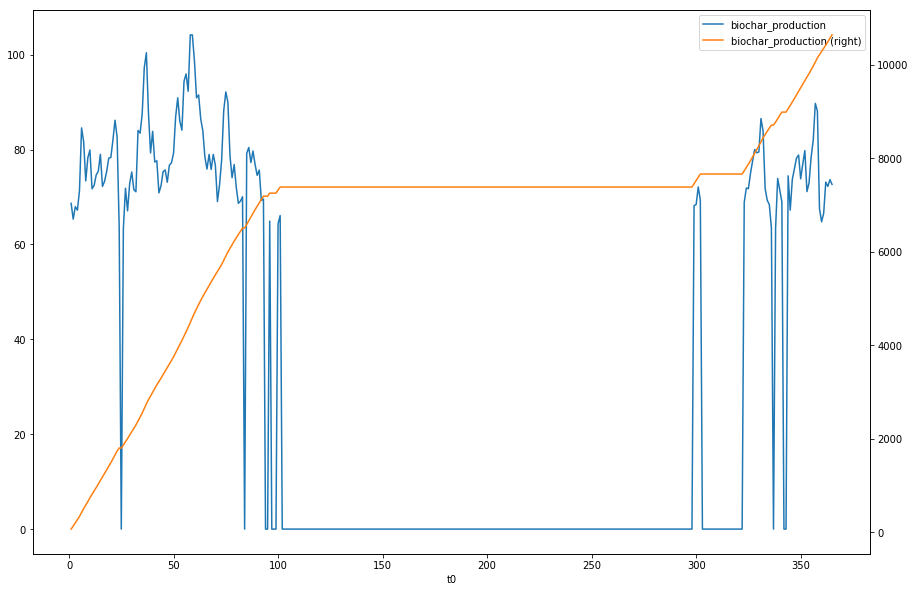

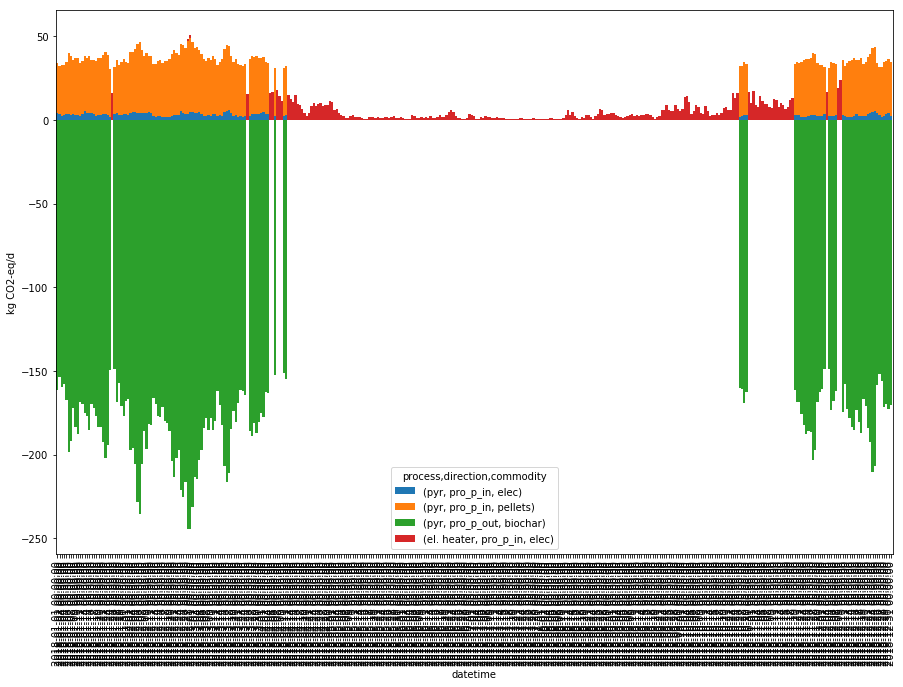

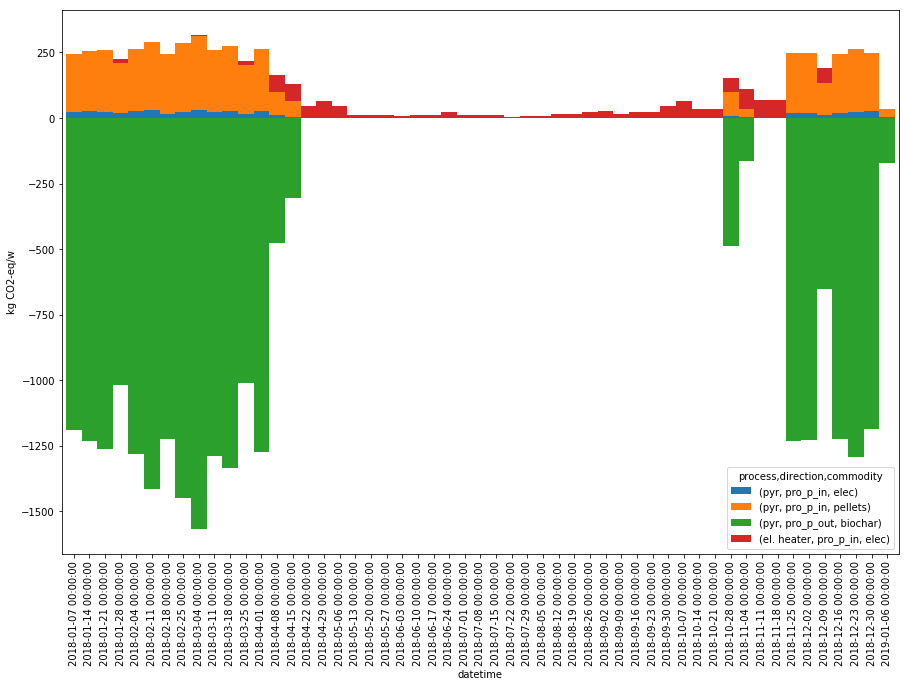

In [8]:
result_dir = ff.prepare_result_directory(ficus_result_folder,ficus_file+scenario)

# printing final report and bw2-LCA
lci_t, lcia_t = fb.run_scn_bw2(result_dir, 'result-'+proj+'_'+ficus_scenario, year, p2e, 
                      plantsAvailable, ficus_folder, ficus_file, scenario,
                      proj, fg_db, fresh_db=False, plantEmissions=False, plantManufacturing=False)

## Single Run All In One

In [2]:
# SMHI Weather data
smhi_folder = 'C:/Users/eazzi/Box Sync/KTH_PhD_HeavyData/P2a_farm_biochar'+'/farm_demand/data/'
smhi_files=['smhi-opendata_1_86420_20190321_121405.csv', 'smhi-opendata_1_86420_20190321_121419.csv']

# Heating demand
ref_year= ['1996', '2010'] #'2017' # Heat demand reference year
T_max = 17 # Outdoor temperature above which no heating is required

# Building properties
# 3 buildings
a = np.array([400, 100, 89]) #m2
e = np.array([90, 200, 150*1.6]) #kWh/m2/yr, from Boverket, PEF-corrected
w = np.array([0.08, 0.065, 0.05])# share hot water

    #Case 1: electricity based declarations
    #c = np.array([1/1.6*3, 1/1.6*3, 1/1.6*3]) # /PEF *COP; worst case el values
    #Case 2: solid biomass fuel, PEF = 1 and EFF = 0.9 (Krav to be above 0.87, Boverket regulation)
    #c = np.array([1/0.9, 1/0.9, 1/0.9]) # /PEF * EFF (biomass) or /PEF * COP (heat pump)
#Case 3: mixed declarations, new building bioenergy, old-ones on electricity
e = np.array([90, 200, 159*1.6]) #kWh/m2/yr, from Boverket, PEF-corrected
c = np.array([1/1*0.9, 1/1.6*3, 1/1.6*3]) # /PEF *COP

# Annual electrical demand
elec_yr = 11000 # kWh

# Year to study
year='2018'
scenario = 'vinnova'

# Sample plants
plants_folder= 'C:/Users/eazzi/Box Sync/KTH_PhD_HeavyData/P2a_farm_biochar'+'/farm_supply/'
plants_file= 'sample_plants.xlsx'
# Plants of interest, for the scenario
plantsAvailable = ['pyrBMC60', 'el. heater'] # select among list in plants_file # BioGreen60


tb = 3600*24 # s, e.g. hourly = 3600; monthly = 3600*730 (h/month); daily = 3600*24 
tb_start = 1 # interval for optimisation, 1..365 = full year
tb_end = 365 # # e.g. daily, 365 = last day of the year

# List of commodities
commodities_imp = ['elec', 'pellets'] # importable commodities
commodities_exp = ['elec', 'biochar'] # exportable commodities
commodities = commodities_imp + list(set(commodities_exp) - set(commodities_imp)) # all commodities, unique list
import_max = ['inf', 'inf', 0] # in order as commodities
export_max = ['inf', 0, 'inf'] 

# Dynamic emission factors for electricity
el_folder = 'C:/Users/eazzi/Box Sync/KTH_PhD_HeavyData/P2a_farm_biochar'+'/farm_bw2/data/'
el_file='powermix-se.xlsx'
el_tab = 'powermix-se_tweak_app'

# Static emission factor for other commodities
ef_pellets = 0.13286474045379412 # market for wood pellets, RER kg CO2/kg dry pellets
LHV_pellets = 18/3.6 # kWh/kg dry pellets
ef_pellets = ef_pellets / LHV_pellets *1000 # gCO2/kWh dry pellets

biochar_seq = 0.8*0.8*44/12*1000 # gCO2/kg biochar; biochar is not in kWh but in kg of biochar; we assume 80% C with 80% remaining after 100y

# Input Ficus file names, scenario names
ficus_folder = 'C:/Users/eazzi/Box Sync/KTH_PhD_HeavyData/P2a_farm_biochar/'
ficus_file = 'cs1_Lindeborgs_'
ficus_scenario = scenario+'.xlsx'

# Output Ficus 
ficus_result_folder = 'C:/Users/eazzi/Box Sync/KTH_PhD_HeavyData/P2a_farm_biochar/results'
result_name = os.path.splitext(os.path.split(ficus_folder+ficus_file+ficus_scenario)[1])[0]
#resultfile = os.path.join(ficus_result_folder, 'result-{}.xlsx'.format(result_name))

# ficus output folder to bw2
bw2_folder = r"C:/Users/eazzi/Box Sync/KTH_PhD_HeavyData/P2a_farm_biochar/results/cs1_Lindeborgs_base-20190516T1829_true_ef"
bw2_file = 'result-cs1_Lindeborgs_base-20190516T1830.xlsx'
p2e=tb/3600 # 24h, conversion from kW to kWh

# ficus input folder to bw2
bw2_ficus_file = ficus_folder+ficus_file+ficus_scenario
processes = plantsAvailable

# bw2 path to db, only if project is new
ei_name = "ecoinvent 3.3 cutoff"
ei_path = "C:\\Users\\eazzi\\Box Sync\\KTH_PhD_HeavyData\\ecoinvent_3.3_cutoff_ecoSpold02\\datasets\\"

# bw2 project name and scenario_prefix_activity
proj="cs1_Lindeborgs"
fg_db = "farmEnergySystem"
act_suffix= scenario
fu_name= "farmEnergy_"+act_suffix

In [3]:
farm_demand = fd.run_scn_demand(smhi_folder, smhi_files,
                                areas=a, energiprestande=e, water_share=w, cop_corr=c,
                                ref_year=ref_year, T_max=T_max, cc=False)

Parsing: smhi-opendata_1_86420_20190321_121405.csv
Parsing: smhi-opendata_1_86420_20190321_121419.csv
*Calculating annual heat demand*
Reference year:  ['1996', '2010']
Total heat demand is  112353.0  kWh of which 6.365784625243652 % hot water
Building heating signature:  -1.0487102314143282  kW/K
Average yearly degreedays:  -100314.50714285717  degree-hour/year
Returning farm_demand DataFrame


In [4]:
# plants parsed and ficus file written
farm_supply = fs.run_scn_ficus_writer(plants_folder, plants_file,
                                      tb, tb_start, tb_end, 
                                      commodities_imp, commodities_exp, import_max, export_max, 
                                      el_folder, el_file, el_tab, 
                                      ef_pellets, biochar_seq, 
                                      plantsAvailable, farm_demand, year, elec_yr,
                                      ficus_folder, ficus_file, scenario)
# run ficus milp
prob = ff.run_ficus(ficus_folder+ficus_file+scenario+'.xlsx', opt = 'cplex', MipGap = 0)

# saving ficus report and figures
result_dir = ff.prepare_result_directory(ficus_result_folder,ficus_file+scenario)
ff.report(prob, result_dir)
ff.result_figures(result_dir,prob=prob, show=False)

Parsing sample_plants
Calculating data for ficus input folder
365 366 = annee bissextile
Writing ficus input file


C:\Users\eazzi\AppData\Local\conda\conda\envs\bw2\lib\site-packages\openpyxl\worksheet\_reader.py:296: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
C:\Users\eazzi\AppData\Local\conda\conda\envs\bw2\lib\site-packages\openpyxl\worksheet\_reader.py:296: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)


Read Data ...

Data Read. time: 0.2 s

Prepare Data ...

Data Prepared. time: 0.1 s

Define Model ...

Model Defined. time: 7.7 s

Solve Model ...


Welcome to IBM(R) ILOG(R) CPLEX(R) Interactive Optimizer 12.8.0.0
  with Simplex, Mixed Integer & Barrier Optimizers
5725-A06 5725-A29 5724-Y48 5724-Y49 5724-Y54 5724-Y55 5655-Y21
Copyright IBM Corp. 1988, 2017.  All Rights Reserved.

Type 'help' for a list of available commands.
Type 'help' followed by a command name for more
information on commands.

CPLEX> Logfile 'cplex.log' closed.
Logfile 'C:\Users\eazzi\AppData\Local\Temp\tmp8f8v9d14.cplex.log' open.
CPLEX> New value for default parallel thread count: 2
CPLEX> Problem 'C:\Users\eazzi\AppData\Local\Temp\tmp4degu3_9.pyomo.lp' read.
Read time = 0.02 sec. (2.00 ticks)
CPLEX> Problem name         : C:\Users\eazzi\AppData\Local\Temp\tmp4degu3_9.pyomo.lp
Objective sense      : Minimize
Variables            :    9885  [Nneg: 6955,  Free: 2198,  Binary: 732]
Objective nonzeros   :       8
Li

C:\Users\eazzi\Box Sync\KTH_PhD_HeavyData\P2a_farm_biochar\farm_ficus\farm_ficus.py:2164: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  sp_crtd = ax0.stackplot(step_edit_x(created.index), step_edit_y(created.as_matrix().T), linewidth=0.15)
C:\Users\eazzi\Box Sync\KTH_PhD_HeavyData\P2a_farm_biochar\farm_ficus\farm_ficus.py:2174: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  sp_csmd = ax0.stackplot(step_edit_x(consumed.index), step_edit_y(-consumed.as_matrix().T), linewidth=0.15)
C:\Users\eazzi\AppData\Local\conda\conda\envs\bw2\lib\site-packages\matplotlib\tight_layout.py:181: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  warnings.warn('Tight layout not applied. '


Biochar produced annually:  biochar_production    11.293712
dtype: float64  tons
Compile ficus lci and lcia
-20.36774572779979 ton CO2-eq, net score, for 1 year of farm-energy
Daily and weekly plots
Towards bw2...
bw2# Add production processes, manufacturing, and start-ups
bw2# Add technosphere and biosphere flows to each production process
Current project is:  cs1_Lindeborgs
Read only mode:  False


Writing activities to SQLite3 database:
0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


Title: Writing activities to SQLite3 database:
  Started: 06/03/2019 17:05:33
  Finished: 06/03/2019 17:05:33
  Total time elapsed: 00:00:00
  CPU %: 87.00
  Memory %: 1.74
Scenario  vinnova  is now ready for analysis in Activity-Browser


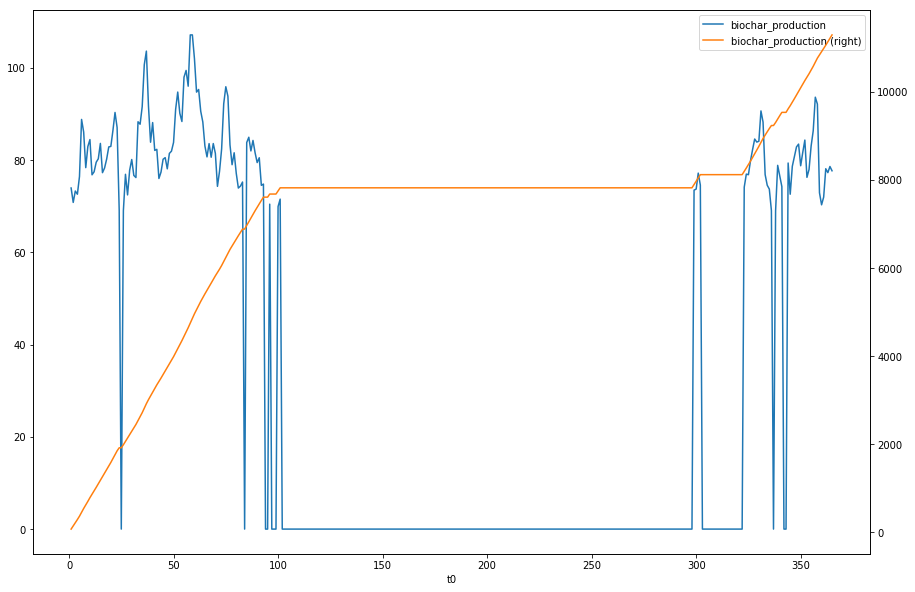

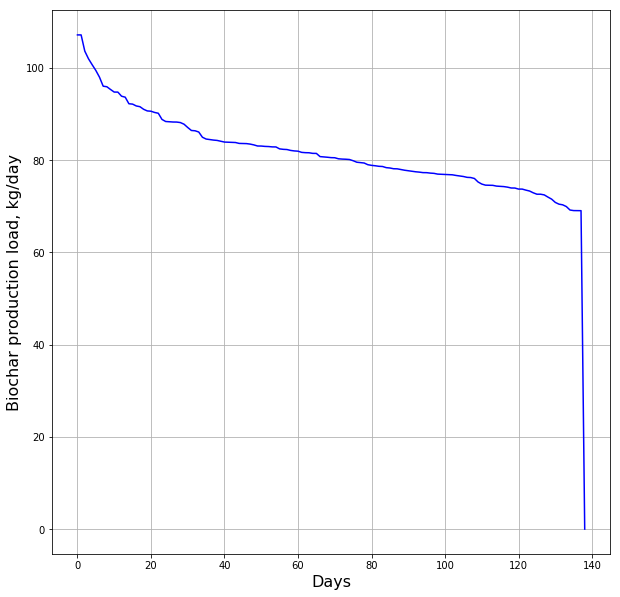

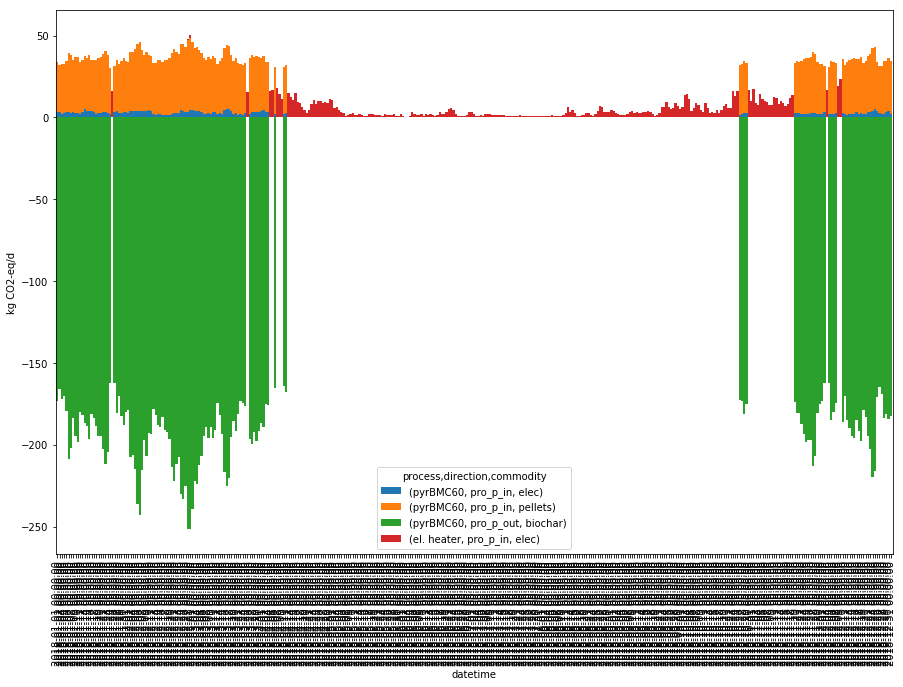

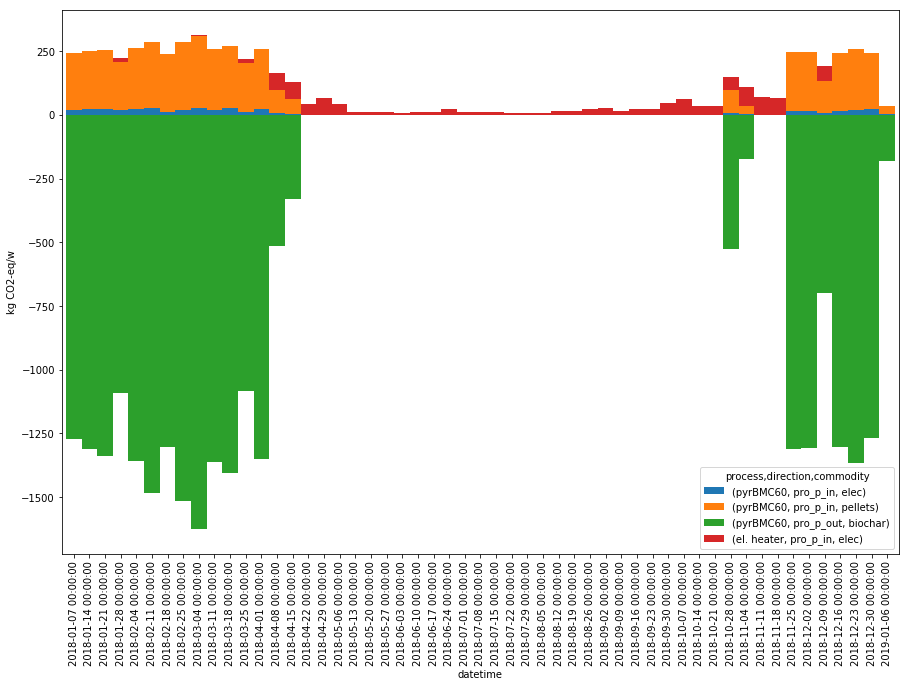

In [3]:
result_dir = ff.prepare_result_directory(ficus_result_folder,ficus_file+scenario)

# printing final report and bw2-LCA
lci_t, lcia_t = fb.run_scn_bw2(result_dir, 'result-'+proj+'_'+ficus_scenario, year, p2e, 
                      plantsAvailable, ficus_folder, ficus_file, scenario,
                      proj, fg_db, fresh_db=False, plantEmissions=False, plantManufacturing=False)

## Scenario definitions

### Different supply technologies, for a given year

In [8]:
# name scenarios
scen_list = ['el_']#['pyr_', 'pyr-el_'] # 'comb_',
# what differs between scenarios
ofInterest_list = [
    ['el. heater'],
] # ['comb', 'el. heater'] ['pyr-el', 'el. heater']

year = '2018'

In [53]:
farm_demand = fd.run_scn_demand(smhi_folder, smhi_files,
                                areas=a, energiprestande=e, water_share=w, cop_corr=c,
                                ref_year=ref_year, T_max=T_max, cc=False)
tmp = fs.selectInterval(farm_demand.resample('D').mean(), year+'-01-01', year+'-12-31')
print(year, '>>> ', tmp.sum().sum()*p2e, ' kWh/yr')

for i in range(len(scen_list)):
    print(scen_list[i], ofInterest_list[i], year)
    scenario = scen_list[i]+year
    plantsAvailable=ofInterest_list[i]
    # plants parsed and ficus file written
    farm_supply = fs.run_scn_ficus_writer(plants_folder, plants_file,
                                          tb, tb_start, tb_end, 
                                          commodities_imp, commodities_exp, import_max, export_max, 
                                          el_folder, el_file, el_tab, 
                                          ef_pellets, biochar_seq, 
                                          plantsAvailable, farm_demand, year, elec_yr,
                                          ficus_folder, ficus_file, scenario)
    # run ficus milp
    prob = ff.run_ficus(ficus_folder+ficus_file+scenario+'.xlsx', opt = 'cplex', MipGap = 0)

    # saving ficus report and figures
    result_dir = ff.prepare_result_directory(ficus_result_folder,ficus_file+scenario)
    ff.report(prob, result_dir)
    ff.result_figures(result_dir,prob=prob, show=False)
    # printing final report and bw2-LCA

    lci_t, lcia_t = fb.run_scn_bw2(result_dir, 'result-'+proj+'_'+scenario+'.xlsx', year, p2e, 
                      plantsAvailable, ficus_folder, ficus_file, scenario,
                      proj, fg_db, fresh_db=False)    

Parsing: smhi-opendata_1_86420_20190321_121405.csv
Parsing: smhi-opendata_1_86420_20190321_121419.csv
*Calculating annual heat demand*
Reference year:  2017
Total heat demand is  145050.0  kWh of which 6.783867631851086 % hot water
Returning farm_demand DataFrame
2018 >>>  170494.32487690917  kWh/yr
el_ ['el. heater'] 2018
Parsing sample_plants
Calculating data for ficus input folder
365 366 = annee bissextile
Writing ficus input file


C:\Users\eazzi\AppData\Local\conda\conda\envs\bw2\lib\site-packages\openpyxl\worksheet\_reader.py:296: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
C:\Users\eazzi\AppData\Local\conda\conda\envs\bw2\lib\site-packages\openpyxl\worksheet\_reader.py:296: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)


Read Data ...

Data Read. time: 0.1 s

Prepare Data ...

Data Prepared. time: 0.0 s

Define Model ...

ERROR: Constructing component 'co_ext_out' from data=None failed: ValueError:
    The value=biochar is not valid for set=co_ext_out because it is not within
    the domain=commodity


ValueError: The value=biochar is not valid for set=co_ext_out
because it is not within the domain=commodity

Read Data ...

Data Read. time: 0.1 s

Prepare Data ...

Data Prepared. time: 0.0 s

Define Model ...

Model Defined. time: 1.3 s

Solve Model ...


Welcome to IBM(R) ILOG(R) CPLEX(R) Interactive Optimizer 12.8.0.0
  with Simplex, Mixed Integer & Barrier Optimizers
5725-A06 5725-A29 5724-Y48 5724-Y49 5724-Y54 5724-Y55 5655-Y21
Copyright IBM Corp. 1988, 2017.  All Rights Reserved.

Type 'help' for a list of available commands.
Type 'help' followed by a command name for more
information on commands.

CPLEX> Logfile 'cplex.log' closed.
Logfile 'C:\Users\eazzi\AppData\Local\Temp\tmpxjo78phf.cplex.log' open.
CPLEX> New value for default parallel thread count: 2
CPLEX> Problem 'C:\Users\eazzi\AppData\Local\Temp\tmpomdo_r4h.pyomo.lp' read.
Read time = 0.02 sec. (0.37 ticks)
CPLEX> Problem name         : C:\Users\eazzi\AppData\Local\Temp\tmpomdo_r4h.pyomo.lp
Objective sense      : Minimize
Variables            :    2943  [Nneg: 2935,  Free: 8]
Objective nonzeros   :       8
Linear constraints 

C:\Users\eazzi\Box Sync\KTH_PhD_HeavyData\P2a_farm_biochar\farm_ficus\farm_ficus.py:2164: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  sp_crtd = ax0.stackplot(step_edit_x(created.index), step_edit_y(created.as_matrix().T), linewidth=0.15)
C:\Users\eazzi\Box Sync\KTH_PhD_HeavyData\P2a_farm_biochar\farm_ficus\farm_ficus.py:2174: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  sp_csmd = ax0.stackplot(step_edit_x(consumed.index), step_edit_y(-consumed.as_matrix().T), linewidth=0.15)
No handles with labels found to put in legend.


Compile ficus lci and lcia
el. heater
8.734685420138229 ton CO2-eq, net score, for 1 year of farm-energy
Daily and weekly plots
Towards bw2...
Current project is:  cs1_Lindeborgs
Read only mode:  False


Writing activities to SQLite3 database:
0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


Title: Writing activities to SQLite3 database:
  Started: 05/21/2019 14:09:53
  Finished: 05/21/2019 14:09:53
  Total time elapsed: 00:00:00
  CPU %: 41.10
  Memory %: 1.84
Scenario  el_2018  is now ready for analysis in Activity-Browser


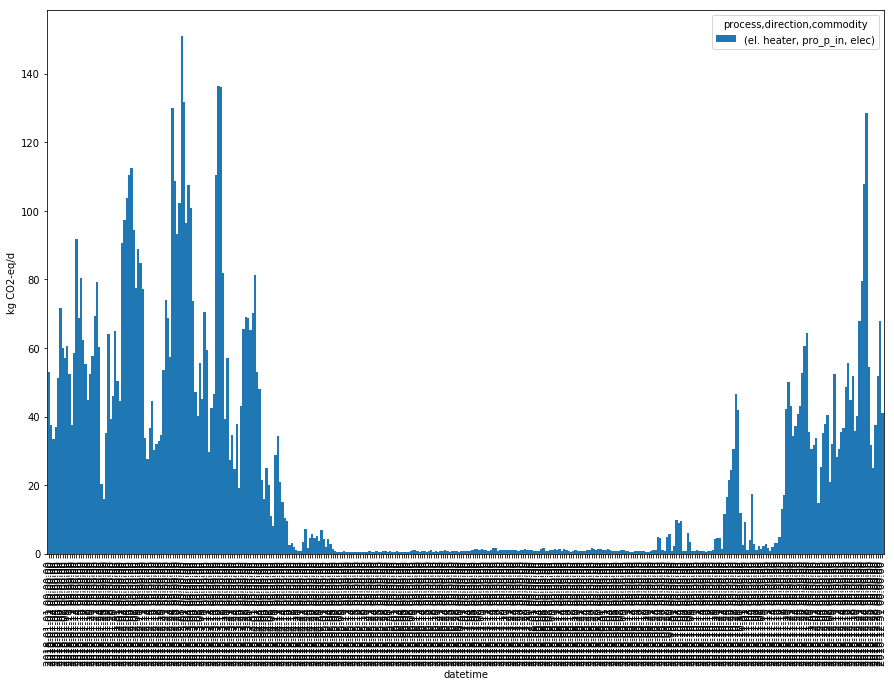

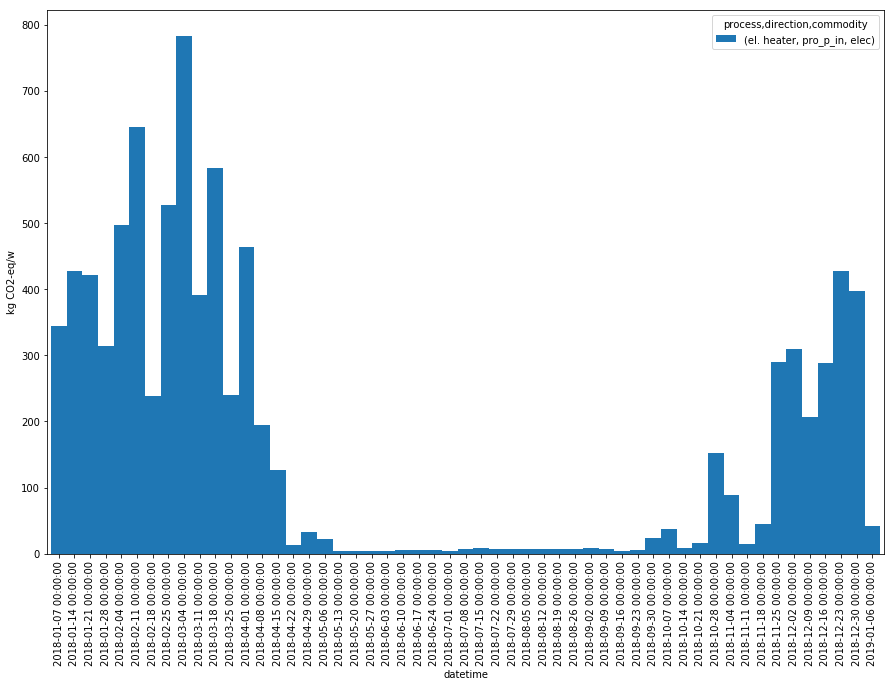

In [55]:
# Quick fix for scenario without biochar >> need to change ficus_excel file writing
scenario = scen_list[0]+year
plantsAvailable=ofInterest_list[0]
    
prob = ff.run_ficus(ficus_folder+ficus_file+scenario+'.xlsx', opt = 'cplex', MipGap = 0)

# saving ficus report and figures
result_dir = ff.prepare_result_directory(ficus_result_folder,ficus_file+scenario)
ff.report(prob, result_dir)
ff.result_figures(result_dir,prob=prob, show=False)
# printing final report and bw2-LCA

lci_t, lcia_t = fb.run_scn_bw2(result_dir, 'result-'+proj+'_'+scenario+'.xlsx', year, p2e, 
                  plantsAvailable, ficus_folder, ficus_file, scenario,
                  proj, fg_db, fresh_db=False)    

###  Same technology, series of years

In [9]:
# energy demand calculated
ref_year= ['1996', '2010']
#Case 2: solid biomass fuel, PEF = 1 and EFF = 0.9 (Krav to be above 0.87, Boverket regulation)
e = np.array([90, 90, 90]) #kWh/m2/yr, from Boverket, PEF-corrected
c = np.array([1/1*0.9, 1/1*0.9, 1/1*0.9]) # /PEF * EFF (biomass) or /PEF * COP (heat pump)

#Case 3: electricity based declarations
e = np.array([90, 200, 159*1.6]) #kWh/m2/yr, from Boverket, PEF-corrected
c = np.array([1/1*0.9, 1/1.6*3, 1/1.6*3]) # /PEF *COP
scenario = 'b17intermed'
farm_demand = fd.run_scn_demand(smhi_folder, smhi_files,
                                areas=a, energiprestande=e, water_share=w, cop_corr=c,
                                ref_year=ref_year, T_max=T_max, cc=False)

TypeError: run_scn_demand() missing 1 required positional argument: 'cc_scen'

Parsing: smhi-opendata_1_86420_20190321_121405.csv
Parsing: smhi-opendata_1_86420_20190321_121419.csv
*Calculating annual heat demand*
Reference year:  ['1996', '2010']
Total heat demand is  112353.0  kWh of which 6.365784625243652 % hot water
Building heating signature:  -1.0487102314143282  kW/K
Average yearly degreedays:  -100314.50714285717  degree-hour/year
Returning farm_demand DataFrame
2001 >>>  108150.26644983236  kWh/yr
Parsing sample_plants
Calculating data for ficus input folder
365 366 = annee bissextile
Writing ficus input file


C:\Users\eazzi\AppData\Local\conda\conda\envs\bw2\lib\site-packages\openpyxl\worksheet\_reader.py:296: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
C:\Users\eazzi\AppData\Local\conda\conda\envs\bw2\lib\site-packages\openpyxl\worksheet\_reader.py:296: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)


Read Data ...

Data Read. time: 0.1 s

Prepare Data ...

Data Prepared. time: 0.0 s

Define Model ...

Model Defined. time: 8.1 s

Solve Model ...


Welcome to IBM(R) ILOG(R) CPLEX(R) Interactive Optimizer 12.8.0.0
  with Simplex, Mixed Integer & Barrier Optimizers
5725-A06 5725-A29 5724-Y48 5724-Y49 5724-Y54 5724-Y55 5655-Y21
Copyright IBM Corp. 1988, 2017.  All Rights Reserved.

Type 'help' for a list of available commands.
Type 'help' followed by a command name for more
information on commands.

CPLEX> Logfile 'cplex.log' closed.
Logfile 'C:\Users\eazzi\AppData\Local\Temp\tmp7mn5efhj.cplex.log' open.
CPLEX> New value for default parallel thread count: 2
CPLEX> Problem 'C:\Users\eazzi\AppData\Local\Temp\tmpugdqpf2h.pyomo.lp' read.
Read time = 0.03 sec. (2.00 ticks)
CPLEX> Problem name         : C:\Users\eazzi\AppData\Local\Temp\tmpugdqpf2h.pyomo.lp
Objective sense      : Minimize
Variables            :    9885  [Nneg: 6955,  Free: 2198,  Binary: 732]
Objective nonzeros   :       8
Li

C:\Users\eazzi\Box Sync\KTH_PhD_HeavyData\P2a_farm_biochar\farm_ficus\farm_ficus.py:2164: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  sp_crtd = ax0.stackplot(step_edit_x(created.index), step_edit_y(created.as_matrix().T), linewidth=0.15)
C:\Users\eazzi\Box Sync\KTH_PhD_HeavyData\P2a_farm_biochar\farm_ficus\farm_ficus.py:2174: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  sp_csmd = ax0.stackplot(step_edit_x(consumed.index), step_edit_y(-consumed.as_matrix().T), linewidth=0.15)
C:\Users\eazzi\AppData\Local\conda\conda\envs\bw2\lib\site-packages\matplotlib\tight_layout.py:181: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  warnings.warn('Tight layout not applied. '


Biochar produced annually:  biochar_production    10.817145
dtype: float64  tons
Compile ficus lci and lcia
pyr
el. heater
-18.84402568294478 ton CO2-eq, net score, for 1 year of farm-energy
Daily and weekly plots
Towards bw2...
bw2# Add production processes, manufacturing, and start-ups
bw2# Add technosphere and biosphere flows to each production process
Current project is:  cs1_Lindeborgs
Read only mode:  False


Writing activities to SQLite3 database:
0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


Title: Writing activities to SQLite3 database:
  Started: 05/27/2019 23:10:02
  Finished: 05/27/2019 23:10:02
  Total time elapsed: 00:00:00
  CPU %: 45.40
  Memory %: 2.00
Scenario  b17intermed_loop_2001  is now ready for analysis in Activity-Browser
2002 >>>  104069.62367245606  kWh/yr
Parsing sample_plants
Calculating data for ficus input folder
365 366 = annee bissextile
Writing ficus input file
Read Data ...

Data Read. time: 0.1 s

Prepare Data ...

Data Prepared. time: 0.0 s

Define Model ...

Model Defined. time: 8.4 s

Solve Model ...


Welcome to IBM(R) ILOG(R) CPLEX(R) Interactive Optimizer 12.8.0.0
  with Simplex, Mixed Integer & Barrier Optimizers
5725-A06 5725-A29 5724-Y48 5724-Y49 5724-Y54 5724-Y55 5655-Y21
Copyright IBM Corp. 1988, 2017.  All Rights Reserved.

Type 'help' for a list of available commands.
Type 'help' followed by a command name for more
information on commands.

CPLEX> Logfile 'cplex.log' closed.
Logfile 'C:\Users\eazzi\AppData\Local\Temp\tmpwyd9_vz6.cpl

Writing activities to SQLite3 database:
0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


Title: Writing activities to SQLite3 database:
  Started: 05/27/2019 23:10:50
  Finished: 05/27/2019 23:10:50
  Total time elapsed: 00:00:00
  CPU %: 108.00
  Memory %: 2.38
Scenario  b17intermed_loop_2002  is now ready for analysis in Activity-Browser
2003 >>>  106350.69776536018  kWh/yr
Parsing sample_plants
Calculating data for ficus input folder
365 366 = annee bissextile
Writing ficus input file
Read Data ...

Data Read. time: 0.1 s

Prepare Data ...

Data Prepared. time: 0.0 s

Define Model ...

Model Defined. time: 7.9 s

Solve Model ...


Welcome to IBM(R) ILOG(R) CPLEX(R) Interactive Optimizer 12.8.0.0
  with Simplex, Mixed Integer & Barrier Optimizers
5725-A06 5725-A29 5724-Y48 5724-Y49 5724-Y54 5724-Y55 5655-Y21
Copyright IBM Corp. 1988, 2017.  All Rights Reserved.

Type 'help' for a list of available commands.
Type 'help' followed by a command name for more
information on commands.

CPLEX> Logfile 'cplex.log' closed.
Logfile 'C:\Users\eazzi\AppData\Local\Temp\tmph4ltrpkf.cp

Writing activities to SQLite3 database:
0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


Title: Writing activities to SQLite3 database:
  Started: 05/27/2019 23:11:36
  Finished: 05/27/2019 23:11:37
  Total time elapsed: 00:00:00
  CPU %: 64.00
  Memory %: 2.71
Scenario  b17intermed_loop_2003  is now ready for analysis in Activity-Browser
2005 >>>  103725.277593767  kWh/yr
Parsing sample_plants
Calculating data for ficus input folder
365 366 = annee bissextile
Writing ficus input file
Read Data ...

Data Read. time: 0.1 s

Prepare Data ...

Data Prepared. time: 0.0 s

Define Model ...

Model Defined. time: 7.6 s

Solve Model ...


Welcome to IBM(R) ILOG(R) CPLEX(R) Interactive Optimizer 12.8.0.0
  with Simplex, Mixed Integer & Barrier Optimizers
5725-A06 5725-A29 5724-Y48 5724-Y49 5724-Y54 5724-Y55 5655-Y21
Copyright IBM Corp. 1988, 2017.  All Rights Reserved.

Type 'help' for a list of available commands.
Type 'help' followed by a command name for more
information on commands.

CPLEX> Logfile 'cplex.log' closed.
Logfile 'C:\Users\eazzi\AppData\Local\Temp\tmpfqorkndz.cplex

Writing activities to SQLite3 database:
0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


Title: Writing activities to SQLite3 database:
  Started: 05/27/2019 23:12:22
  Finished: 05/27/2019 23:12:22
  Total time elapsed: 00:00:00
  CPU %: 99.70
  Memory %: 3.10
Scenario  b17intermed_loop_2005  is now ready for analysis in Activity-Browser
2006 >>>  100432.1099641776  kWh/yr
Parsing sample_plants
Calculating data for ficus input folder
365 366 = annee bissextile
Writing ficus input file
Read Data ...

Data Read. time: 0.1 s

Prepare Data ...

Data Prepared. time: 0.1 s

Define Model ...

Model Defined. time: 7.9 s

Solve Model ...


Welcome to IBM(R) ILOG(R) CPLEX(R) Interactive Optimizer 12.8.0.0
  with Simplex, Mixed Integer & Barrier Optimizers
5725-A06 5725-A29 5724-Y48 5724-Y49 5724-Y54 5724-Y55 5655-Y21
Copyright IBM Corp. 1988, 2017.  All Rights Reserved.

Type 'help' for a list of available commands.
Type 'help' followed by a command name for more
information on commands.

CPLEX> Logfile 'cplex.log' closed.
Logfile 'C:\Users\eazzi\AppData\Local\Temp\tmpec33r6dp.cple

Writing activities to SQLite3 database:
0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


Title: Writing activities to SQLite3 database:
  Started: 05/27/2019 23:13:09
  Finished: 05/27/2019 23:13:09
  Total time elapsed: 00:00:00
  CPU %: 91.90
  Memory %: 3.41
Scenario  b17intermed_loop_2006  is now ready for analysis in Activity-Browser
2007 >>>  100440.86955472882  kWh/yr
Parsing sample_plants
Calculating data for ficus input folder
365 366 = annee bissextile
Writing ficus input file
Read Data ...

Data Read. time: 0.1 s

Prepare Data ...

Data Prepared. time: 0.0 s

Define Model ...

Model Defined. time: 8.0 s

Solve Model ...


Welcome to IBM(R) ILOG(R) CPLEX(R) Interactive Optimizer 12.8.0.0
  with Simplex, Mixed Integer & Barrier Optimizers
5725-A06 5725-A29 5724-Y48 5724-Y49 5724-Y54 5724-Y55 5655-Y21
Copyright IBM Corp. 1988, 2017.  All Rights Reserved.

Type 'help' for a list of available commands.
Type 'help' followed by a command name for more
information on commands.

CPLEX> Logfile 'cplex.log' closed.
Logfile 'C:\Users\eazzi\AppData\Local\Temp\tmpva0xj7f0.cpl

Writing activities to SQLite3 database:
0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


Title: Writing activities to SQLite3 database:
  Started: 05/27/2019 23:13:55
  Finished: 05/27/2019 23:13:55
  Total time elapsed: 00:00:00
  CPU %: 85.60
  Memory %: 3.76
Scenario  b17intermed_loop_2007  is now ready for analysis in Activity-Browser
2009 >>>  106824.82925392766  kWh/yr
Parsing sample_plants
Calculating data for ficus input folder
365 366 = annee bissextile
Writing ficus input file
Read Data ...

Data Read. time: 0.1 s

Prepare Data ...

Data Prepared. time: 0.1 s

Define Model ...

Model Defined. time: 7.4 s

Solve Model ...


Welcome to IBM(R) ILOG(R) CPLEX(R) Interactive Optimizer 12.8.0.0
  with Simplex, Mixed Integer & Barrier Optimizers
5725-A06 5725-A29 5724-Y48 5724-Y49 5724-Y54 5724-Y55 5655-Y21
Copyright IBM Corp. 1988, 2017.  All Rights Reserved.

Type 'help' for a list of available commands.
Type 'help' followed by a command name for more
information on commands.

CPLEX> Logfile 'cplex.log' closed.
Logfile 'C:\Users\eazzi\AppData\Local\Temp\tmpi9ucwkr3.cpl

C:\Users\eazzi\AppData\Local\conda\conda\envs\bw2\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Towards bw2...
bw2# Add production processes, manufacturing, and start-ups
bw2# Add technosphere and biosphere flows to each production process
Current project is:  cs1_Lindeborgs
Read only mode:  False


Writing activities to SQLite3 database:
0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


Title: Writing activities to SQLite3 database:
  Started: 05/27/2019 23:14:42
  Finished: 05/27/2019 23:14:42
  Total time elapsed: 00:00:00
  CPU %: 78.50
  Memory %: 4.14
Scenario  b17intermed_loop_2009  is now ready for analysis in Activity-Browser
2010 >>>  122862.96746656307  kWh/yr
Parsing sample_plants
Calculating data for ficus input folder
365 366 = annee bissextile
Writing ficus input file
Read Data ...

Data Read. time: 0.1 s

Prepare Data ...

Data Prepared. time: 0.0 s

Define Model ...

Model Defined. time: 8.2 s

Solve Model ...


Welcome to IBM(R) ILOG(R) CPLEX(R) Interactive Optimizer 12.8.0.0
  with Simplex, Mixed Integer & Barrier Optimizers
5725-A06 5725-A29 5724-Y48 5724-Y49 5724-Y54 5724-Y55 5655-Y21
Copyright IBM Corp. 1988, 2017.  All Rights Reserved.

Type 'help' for a list of available commands.
Type 'help' followed by a command name for more
information on commands.

CPLEX> Logfile 'cplex.log' closed.
Logfile 'C:\Users\eazzi\AppData\Local\Temp\tmp8hmw1m2p.cpl

Writing activities to SQLite3 database:
0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


Title: Writing activities to SQLite3 database:
  Started: 05/27/2019 23:15:29
  Finished: 05/27/2019 23:15:29
  Total time elapsed: 00:00:00
  CPU %: 68.80
  Memory %: 4.44
Scenario  b17intermed_loop_2010  is now ready for analysis in Activity-Browser
2011 >>>  99176.29852951772  kWh/yr
Parsing sample_plants
Calculating data for ficus input folder
365 366 = annee bissextile
Writing ficus input file
Read Data ...

Data Read. time: 0.1 s

Prepare Data ...

Data Prepared. time: 0.0 s

Define Model ...

Model Defined. time: 7.5 s

Solve Model ...


Welcome to IBM(R) ILOG(R) CPLEX(R) Interactive Optimizer 12.8.0.0
  with Simplex, Mixed Integer & Barrier Optimizers
5725-A06 5725-A29 5724-Y48 5724-Y49 5724-Y54 5724-Y55 5655-Y21
Copyright IBM Corp. 1988, 2017.  All Rights Reserved.

Type 'help' for a list of available commands.
Type 'help' followed by a command name for more
information on commands.

CPLEX> Logfile 'cplex.log' closed.
Logfile 'C:\Users\eazzi\AppData\Local\Temp\tmp6czqhtqu.cple

Writing activities to SQLite3 database:
0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


Title: Writing activities to SQLite3 database:
  Started: 05/27/2019 23:16:16
  Finished: 05/27/2019 23:16:16
  Total time elapsed: 00:00:00
  CPU %: 86.00
  Memory %: 4.89
Scenario  b17intermed_loop_2011  is now ready for analysis in Activity-Browser
2013 >>>  104902.53262248589  kWh/yr
Parsing sample_plants
Calculating data for ficus input folder
365 366 = annee bissextile
Writing ficus input file
Read Data ...

Data Read. time: 0.1 s

Prepare Data ...

Data Prepared. time: 0.0 s

Define Model ...

Model Defined. time: 7.4 s

Solve Model ...


Welcome to IBM(R) ILOG(R) CPLEX(R) Interactive Optimizer 12.8.0.0
  with Simplex, Mixed Integer & Barrier Optimizers
5725-A06 5725-A29 5724-Y48 5724-Y49 5724-Y54 5724-Y55 5655-Y21
Copyright IBM Corp. 1988, 2017.  All Rights Reserved.

Type 'help' for a list of available commands.
Type 'help' followed by a command name for more
information on commands.

CPLEX> Logfile 'cplex.log' closed.
Logfile 'C:\Users\eazzi\AppData\Local\Temp\tmpmxdcrh6_.cpl

Writing activities to SQLite3 database:
0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


Title: Writing activities to SQLite3 database:
  Started: 05/27/2019 23:17:05
  Finished: 05/27/2019 23:17:05
  Total time elapsed: 00:00:00
  CPU %: 87.50
  Memory %: 5.30
Scenario  b17intermed_loop_2013  is now ready for analysis in Activity-Browser
2014 >>>  96424.58584656384  kWh/yr
Parsing sample_plants
Calculating data for ficus input folder
365 366 = annee bissextile
Writing ficus input file
Read Data ...

Data Read. time: 0.1 s

Prepare Data ...

Data Prepared. time: 0.0 s

Define Model ...

Model Defined. time: 7.9 s

Solve Model ...


Welcome to IBM(R) ILOG(R) CPLEX(R) Interactive Optimizer 12.8.0.0
  with Simplex, Mixed Integer & Barrier Optimizers
5725-A06 5725-A29 5724-Y48 5724-Y49 5724-Y54 5724-Y55 5655-Y21
Copyright IBM Corp. 1988, 2017.  All Rights Reserved.

Type 'help' for a list of available commands.
Type 'help' followed by a command name for more
information on commands.

CPLEX> Logfile 'cplex.log' closed.
Logfile 'C:\Users\eazzi\AppData\Local\Temp\tmpbw4kvdaw.cple

Writing activities to SQLite3 database:
0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


Title: Writing activities to SQLite3 database:
  Started: 05/27/2019 23:17:53
  Finished: 05/27/2019 23:17:54
  Total time elapsed: 00:00:00
  CPU %: 75.00
  Memory %: 5.71
Scenario  b17intermed_loop_2014  is now ready for analysis in Activity-Browser
2015 >>>  95318.24449346075  kWh/yr
Parsing sample_plants
Calculating data for ficus input folder
365 366 = annee bissextile
Writing ficus input file
Read Data ...

Data Read. time: 0.1 s

Prepare Data ...

Data Prepared. time: 0.1 s

Define Model ...

Model Defined. time: 8.2 s

Solve Model ...


Welcome to IBM(R) ILOG(R) CPLEX(R) Interactive Optimizer 12.8.0.0
  with Simplex, Mixed Integer & Barrier Optimizers
5725-A06 5725-A29 5724-Y48 5724-Y49 5724-Y54 5724-Y55 5655-Y21
Copyright IBM Corp. 1988, 2017.  All Rights Reserved.

Type 'help' for a list of available commands.
Type 'help' followed by a command name for more
information on commands.

CPLEX> Logfile 'cplex.log' closed.
Logfile 'C:\Users\eazzi\AppData\Local\Temp\tmp18tiws27.cple

Writing activities to SQLite3 database:
0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


Title: Writing activities to SQLite3 database:
  Started: 05/27/2019 23:18:43
  Finished: 05/27/2019 23:18:43
  Total time elapsed: 00:00:00
  CPU %: 64.60
  Memory %: 6.05
Scenario  b17intermed_loop_2015  is now ready for analysis in Activity-Browser
2017 >>>  100725.5259884122  kWh/yr
Parsing sample_plants
Calculating data for ficus input folder
365 366 = annee bissextile
Writing ficus input file
Read Data ...

Data Read. time: 0.1 s

Prepare Data ...

Data Prepared. time: 0.0 s

Define Model ...

Model Defined. time: 7.5 s

Solve Model ...


Welcome to IBM(R) ILOG(R) CPLEX(R) Interactive Optimizer 12.8.0.0
  with Simplex, Mixed Integer & Barrier Optimizers
5725-A06 5725-A29 5724-Y48 5724-Y49 5724-Y54 5724-Y55 5655-Y21
Copyright IBM Corp. 1988, 2017.  All Rights Reserved.

Type 'help' for a list of available commands.
Type 'help' followed by a command name for more
information on commands.

CPLEX> Logfile 'cplex.log' closed.
Logfile 'C:\Users\eazzi\AppData\Local\Temp\tmpluorx_82.cple

Writing activities to SQLite3 database:
0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


Title: Writing activities to SQLite3 database:
  Started: 05/27/2019 23:19:33
  Finished: 05/27/2019 23:19:33
  Total time elapsed: 00:00:00
  CPU %: 75.00
  Memory %: 6.42
Scenario  b17intermed_loop_2017  is now ready for analysis in Activity-Browser
2018 >>>  99950.00445990535  kWh/yr
Parsing sample_plants
Calculating data for ficus input folder
365 366 = annee bissextile
Writing ficus input file
Read Data ...

Data Read. time: 0.1 s

Prepare Data ...

Data Prepared. time: 0.0 s

Define Model ...

Model Defined. time: 7.6 s

Solve Model ...


Welcome to IBM(R) ILOG(R) CPLEX(R) Interactive Optimizer 12.8.0.0
  with Simplex, Mixed Integer & Barrier Optimizers
5725-A06 5725-A29 5724-Y48 5724-Y49 5724-Y54 5724-Y55 5655-Y21
Copyright IBM Corp. 1988, 2017.  All Rights Reserved.

Type 'help' for a list of available commands.
Type 'help' followed by a command name for more
information on commands.

CPLEX> Logfile 'cplex.log' closed.
Logfile 'C:\Users\eazzi\AppData\Local\Temp\tmpm7jyf164.cple

Writing activities to SQLite3 database:
0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


Title: Writing activities to SQLite3 database:
  Started: 05/27/2019 23:20:23
  Finished: 05/27/2019 23:20:23
  Total time elapsed: 00:00:00
  CPU %: 70.50
  Memory %: 6.52
Scenario  b17intermed_loop_2018  is now ready for analysis in Activity-Browser


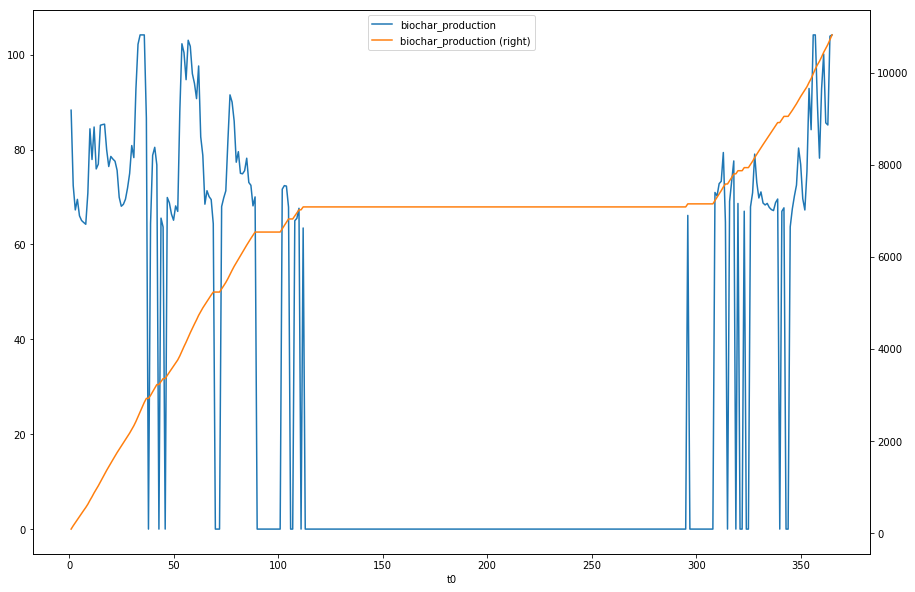

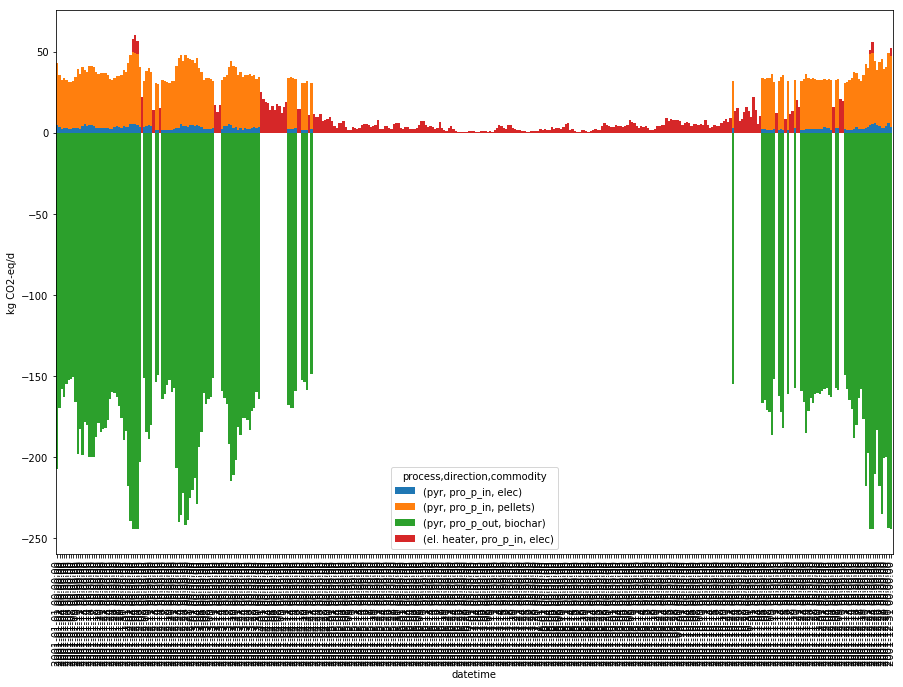

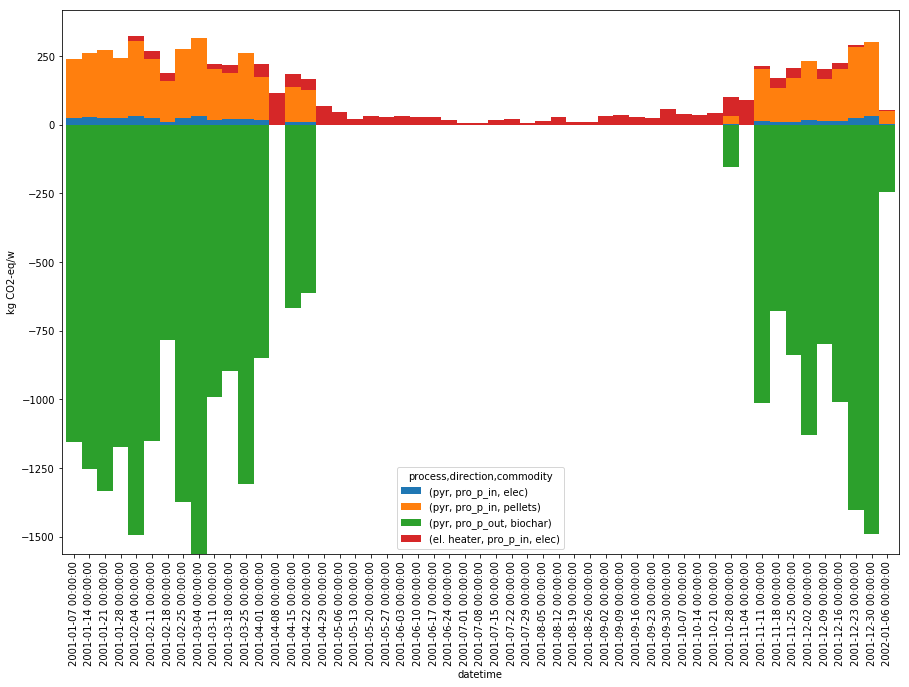

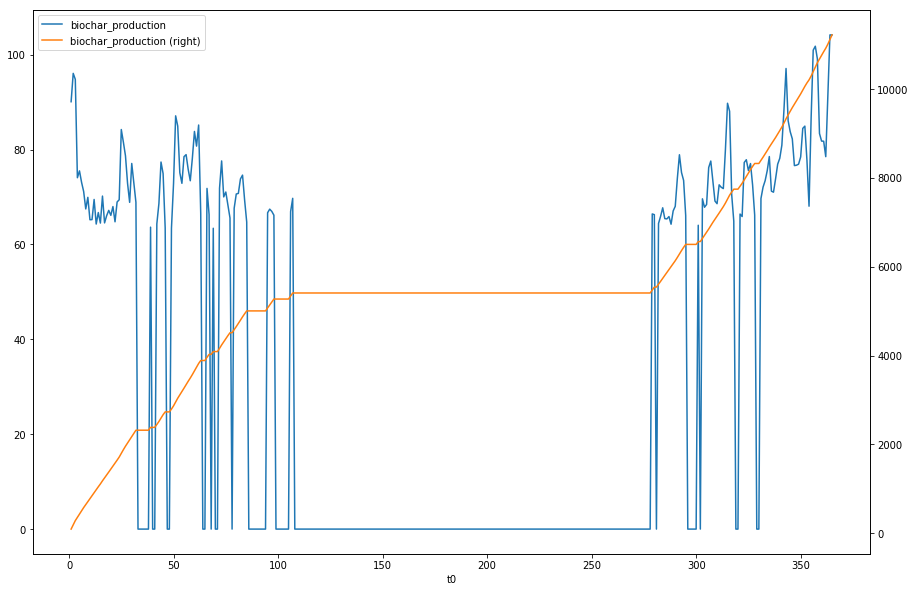

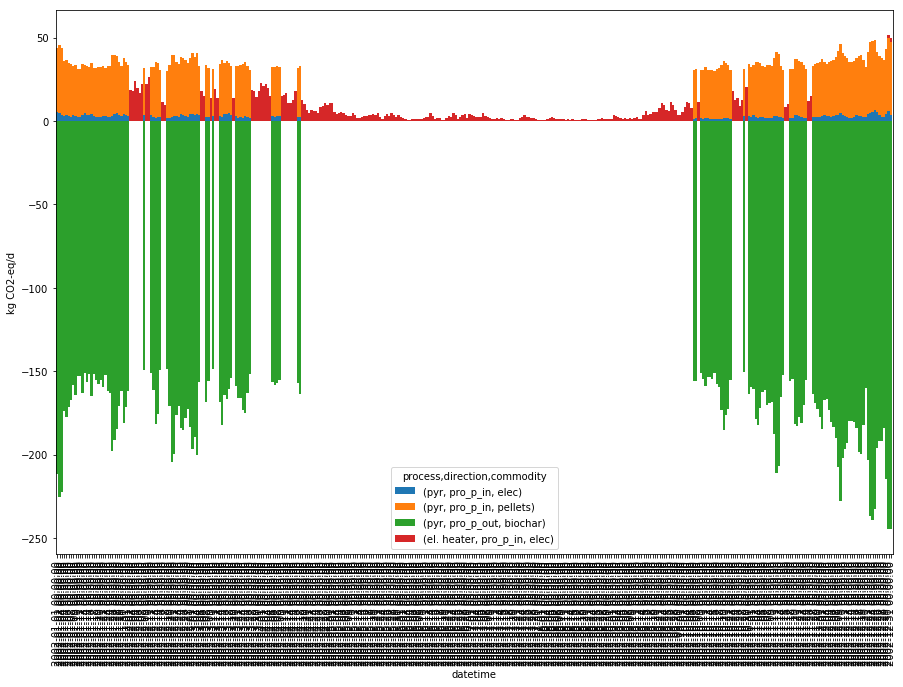

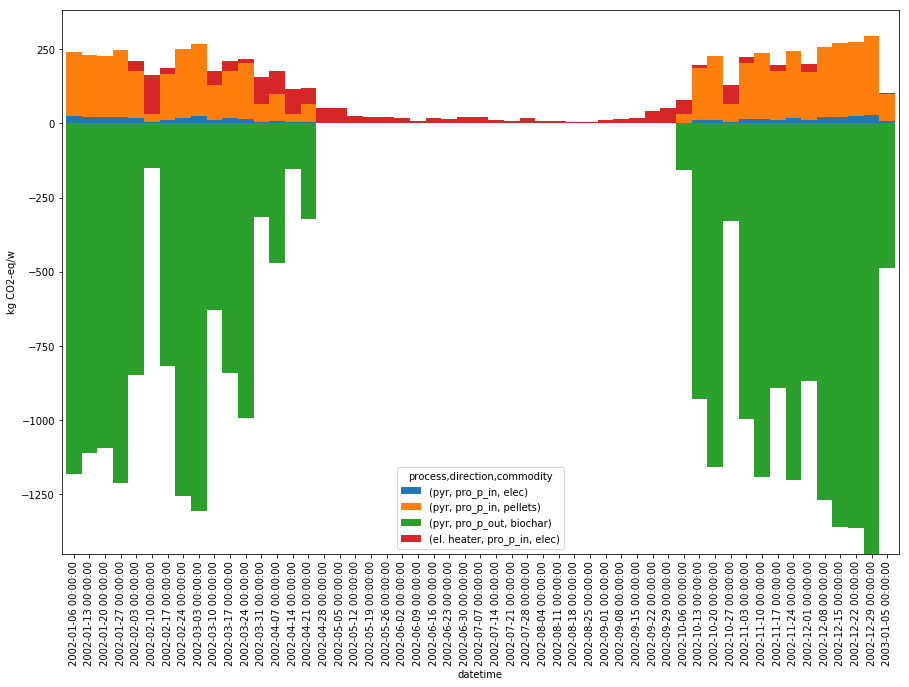

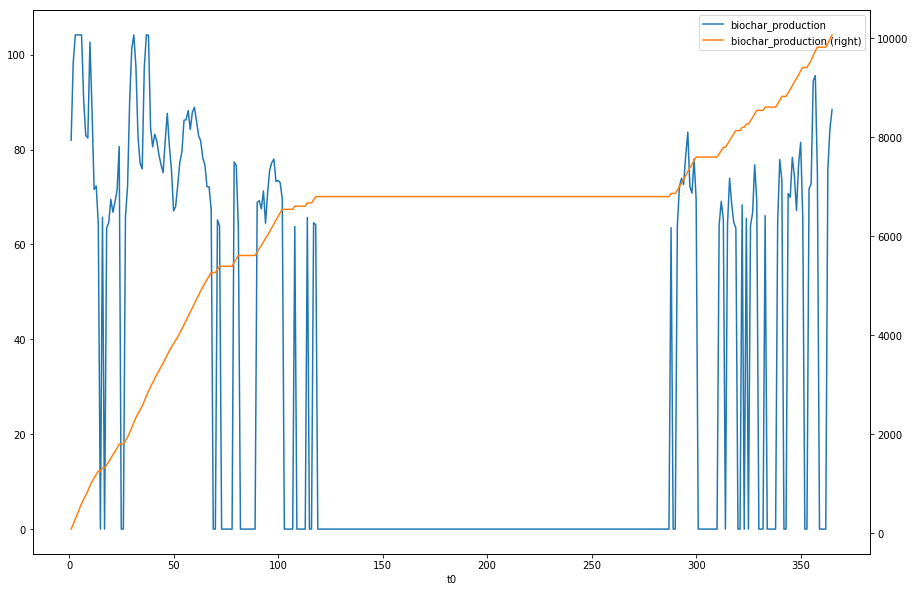

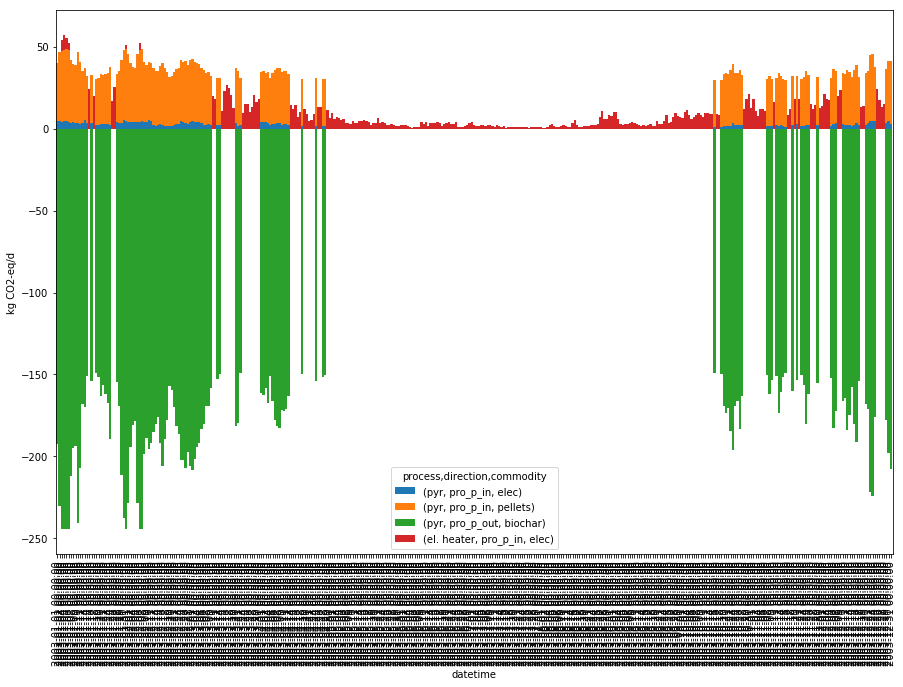

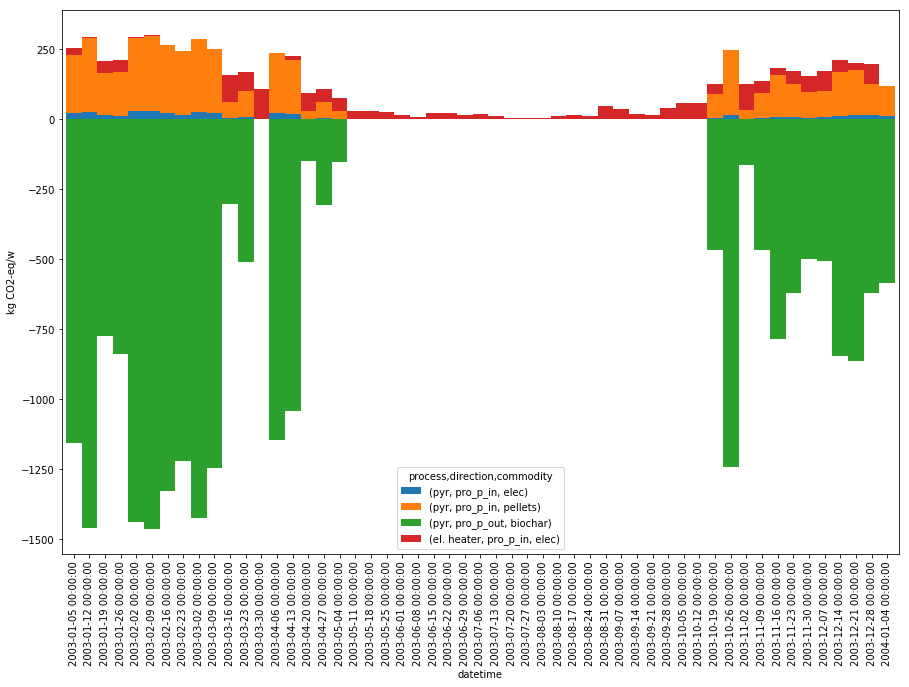

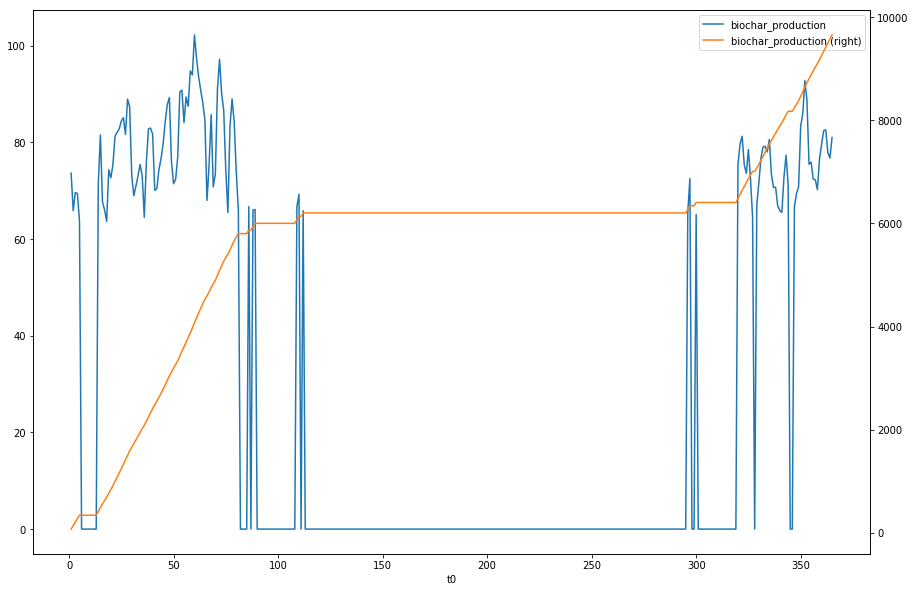

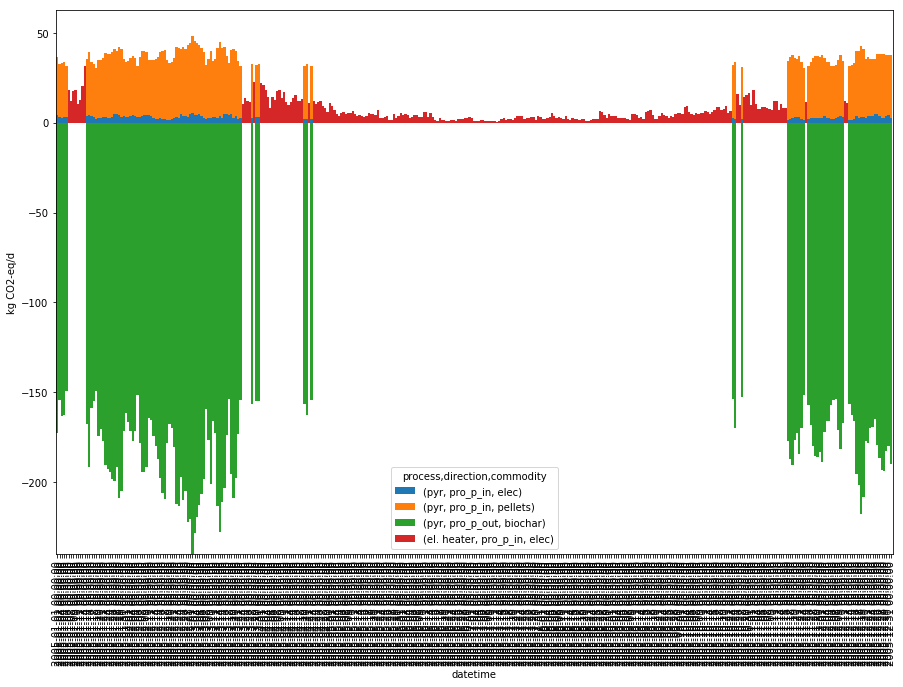

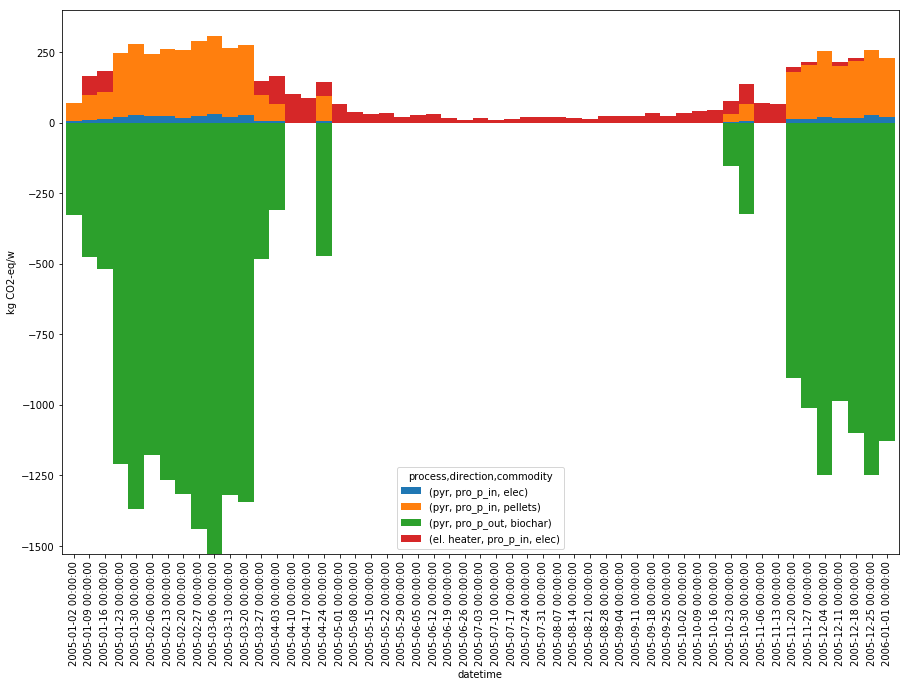

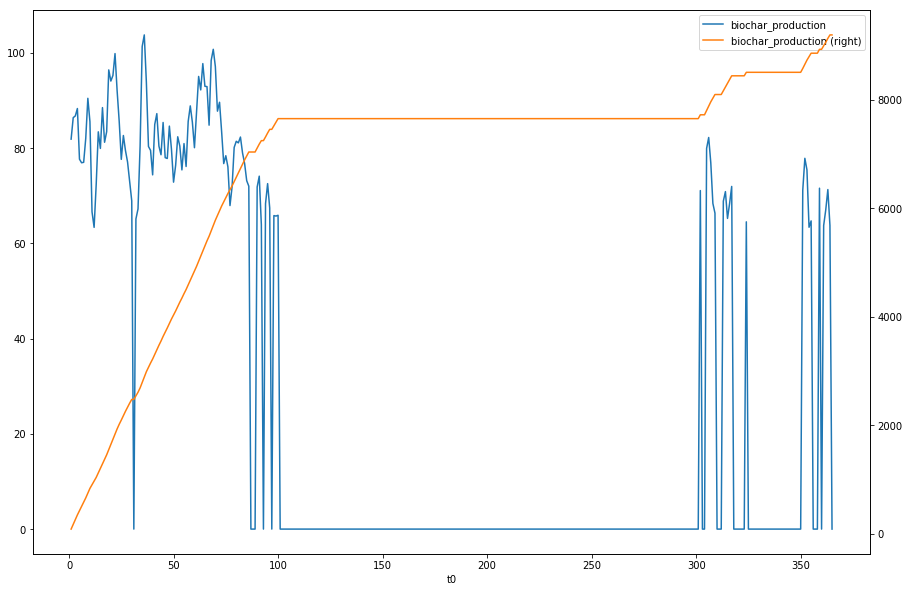

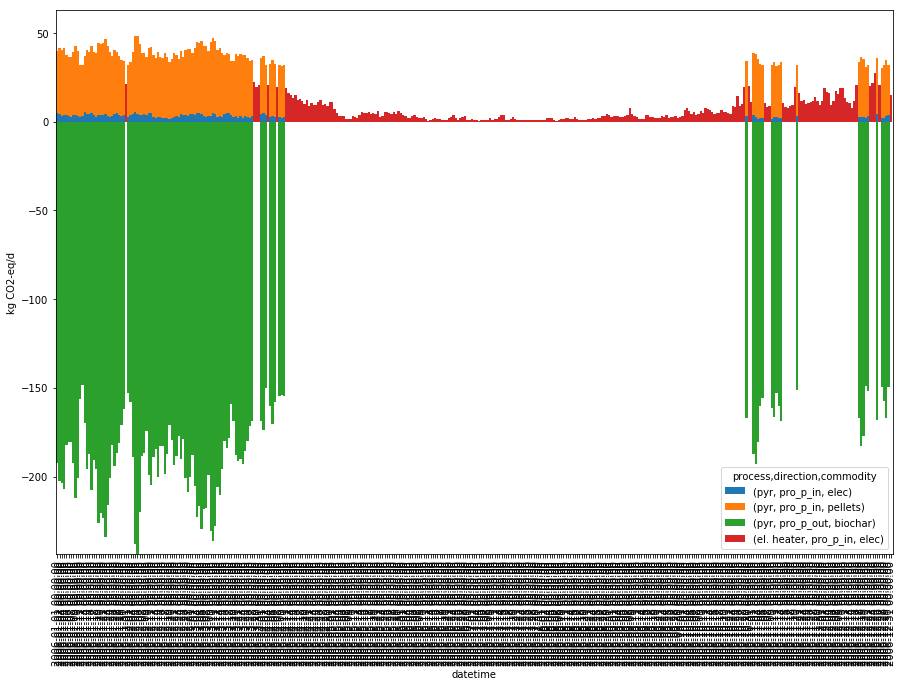

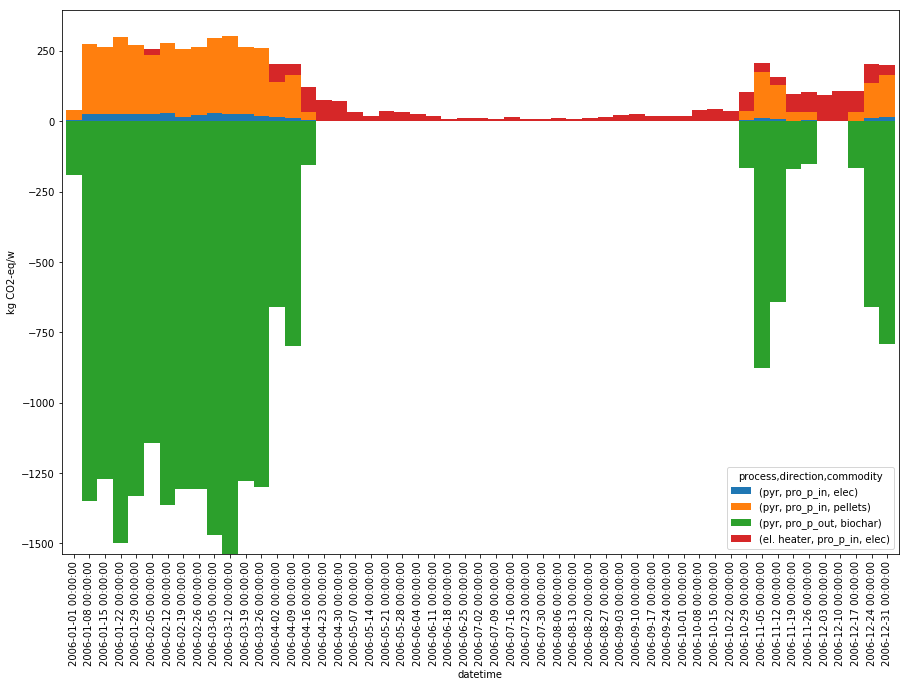

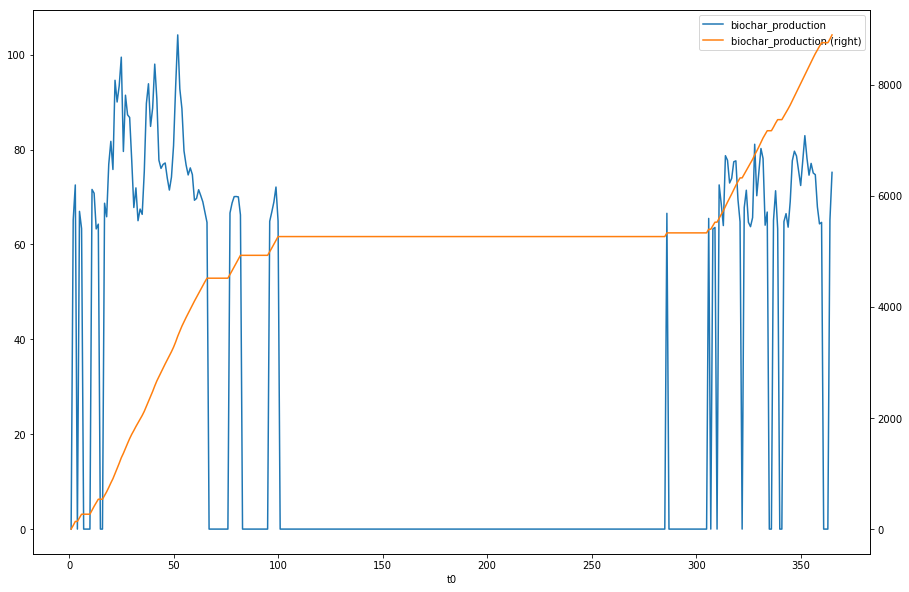

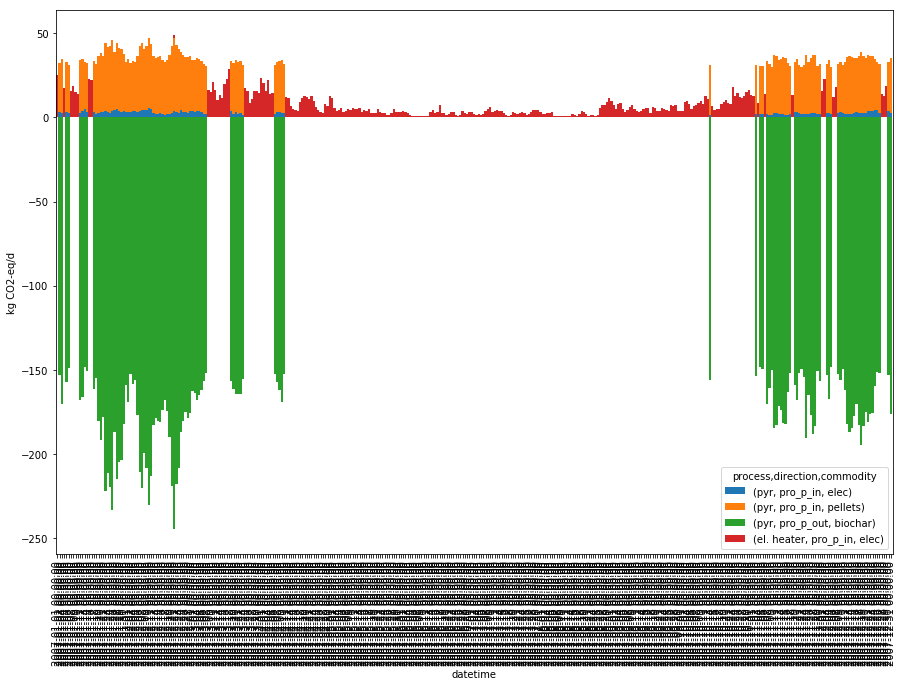

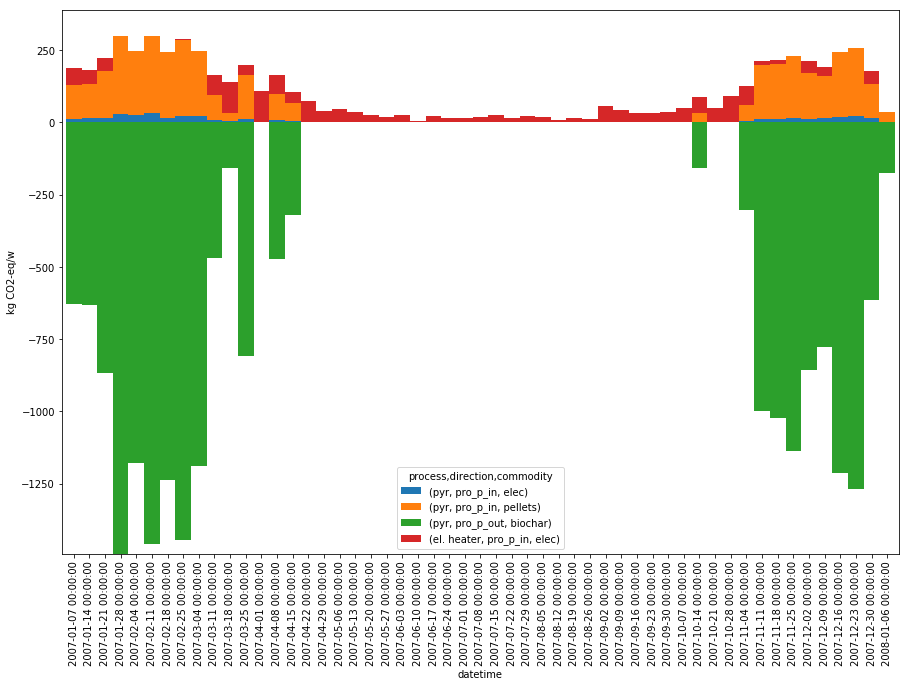

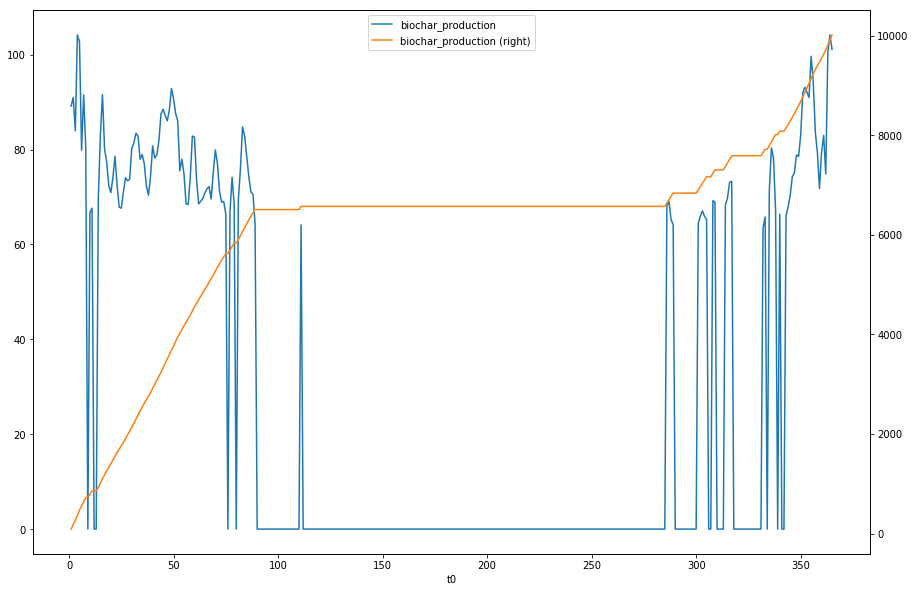

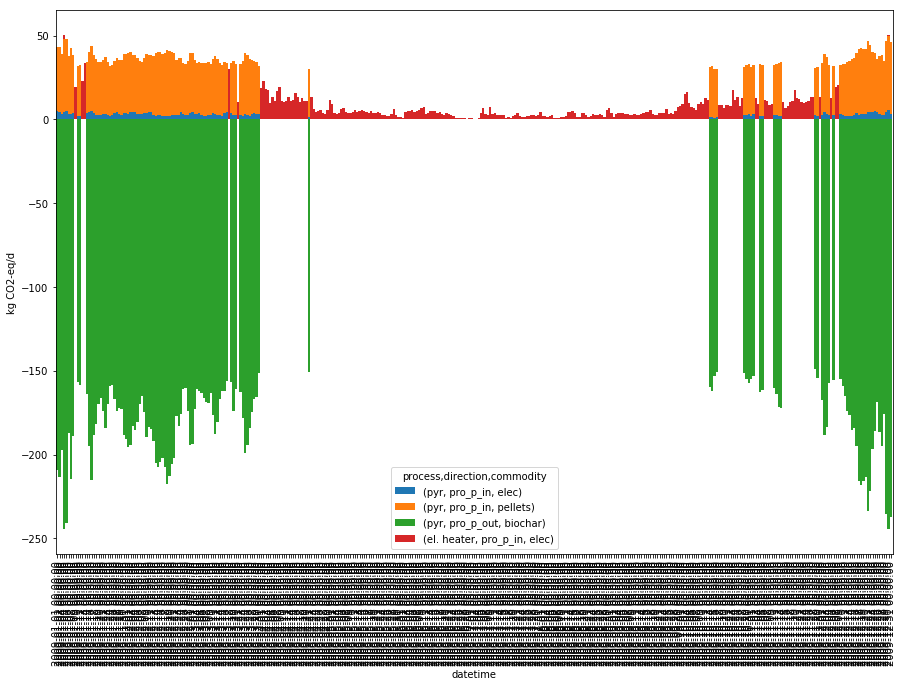

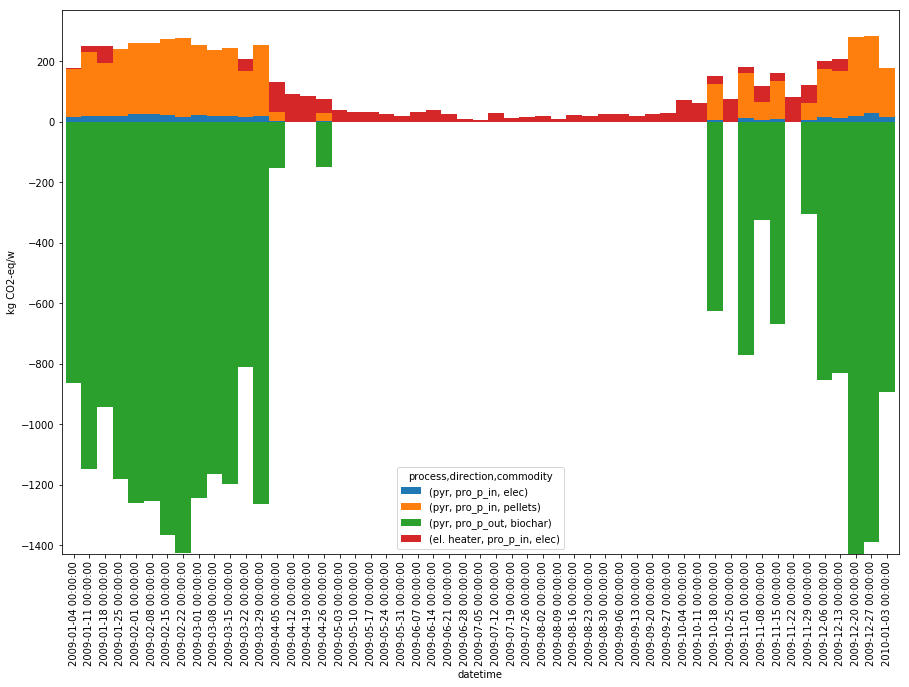

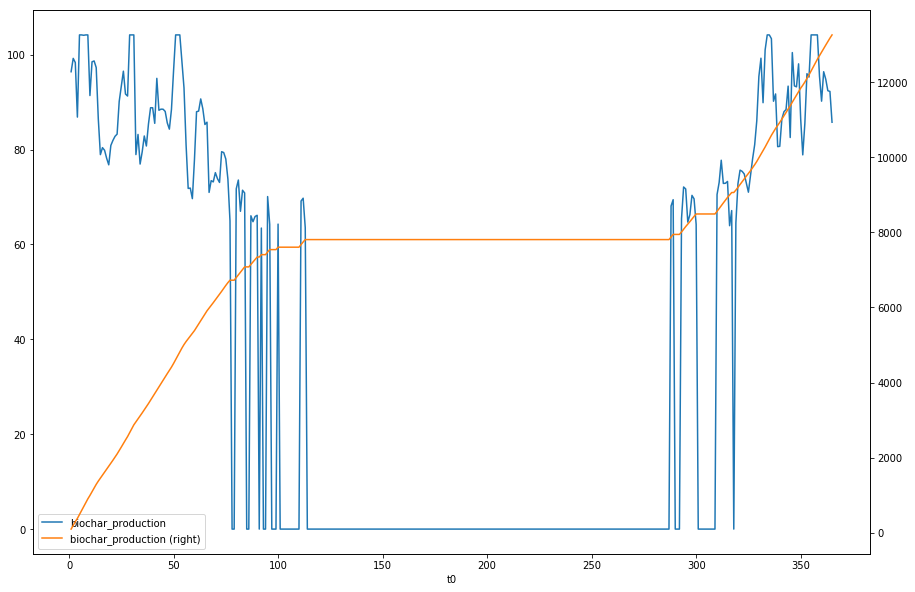

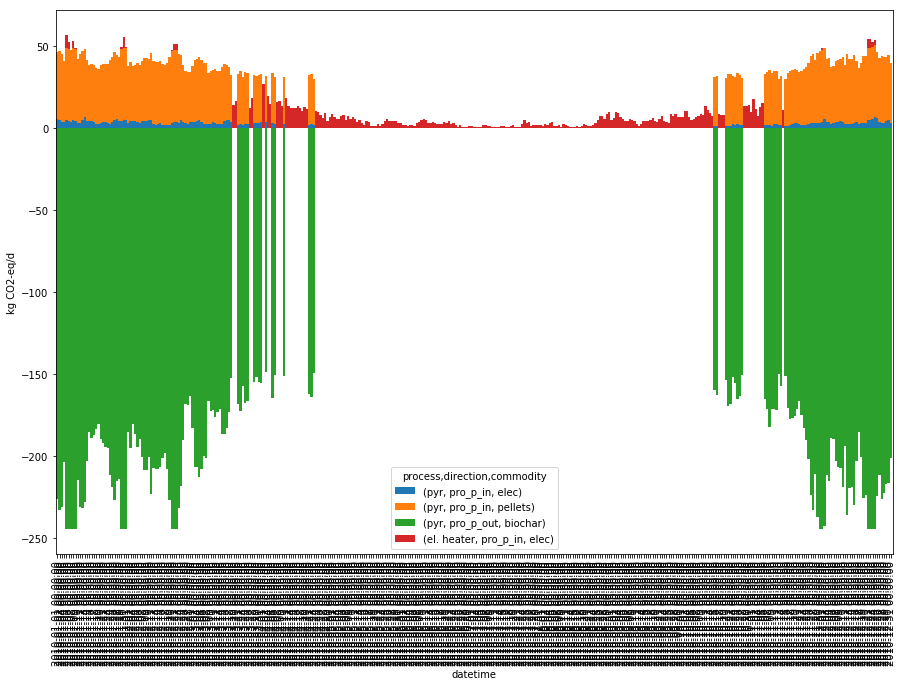

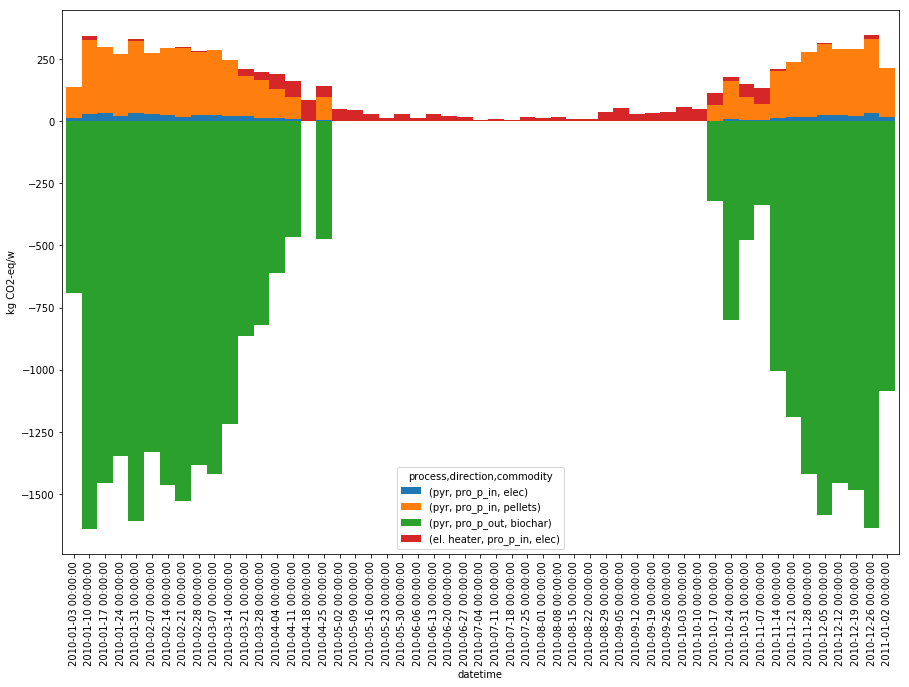

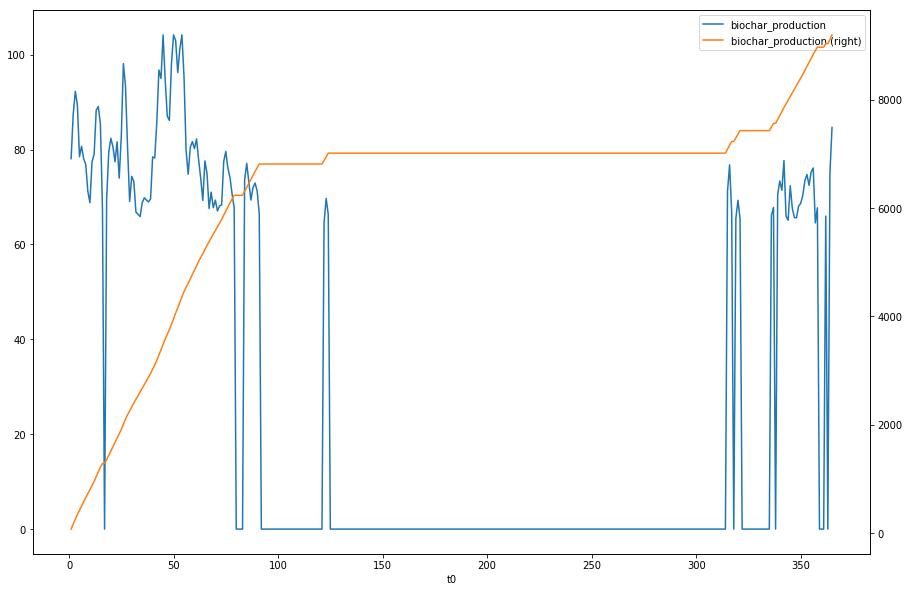

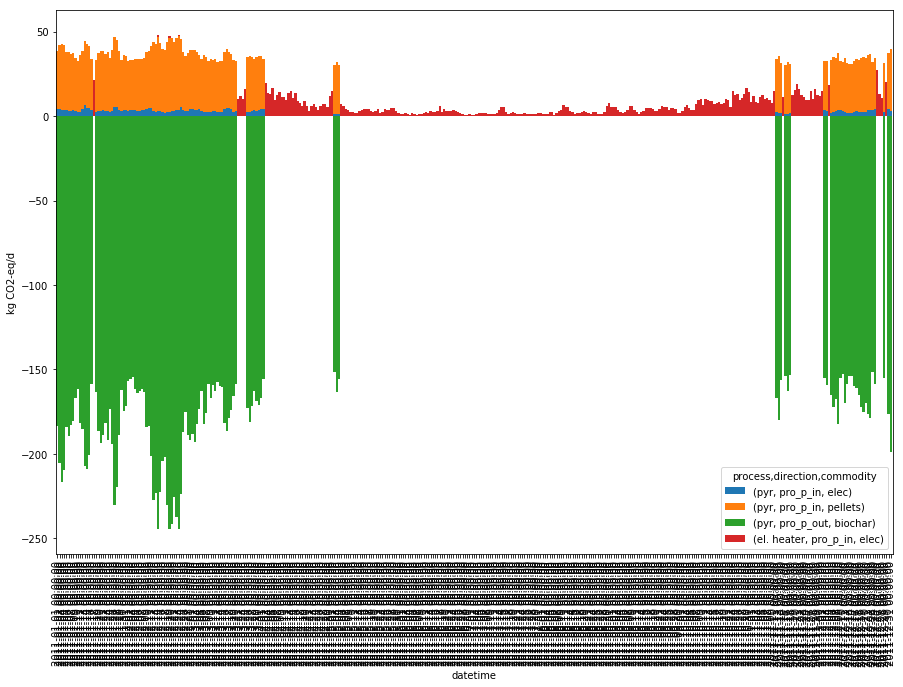

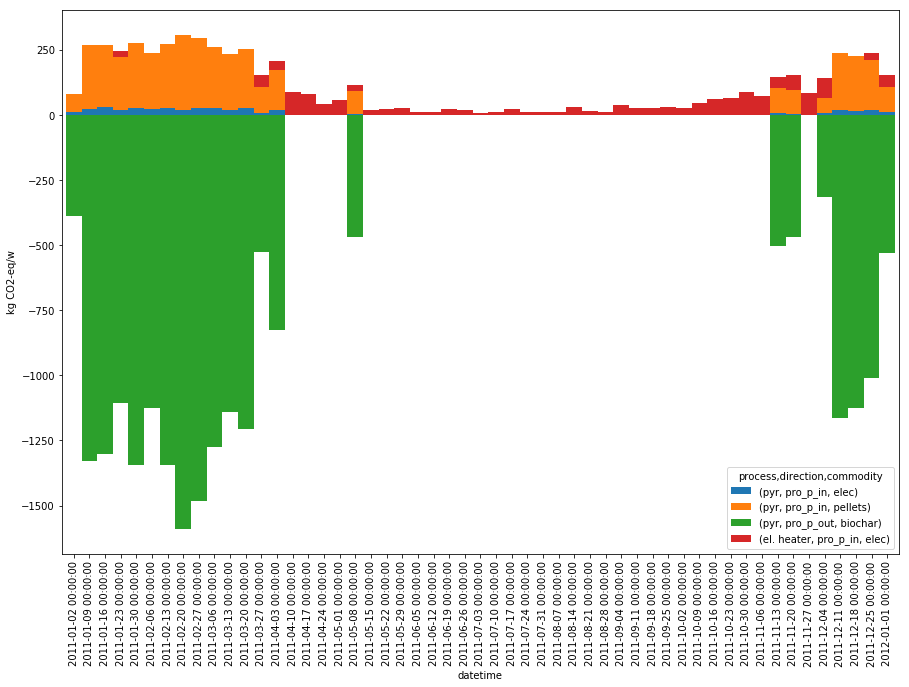

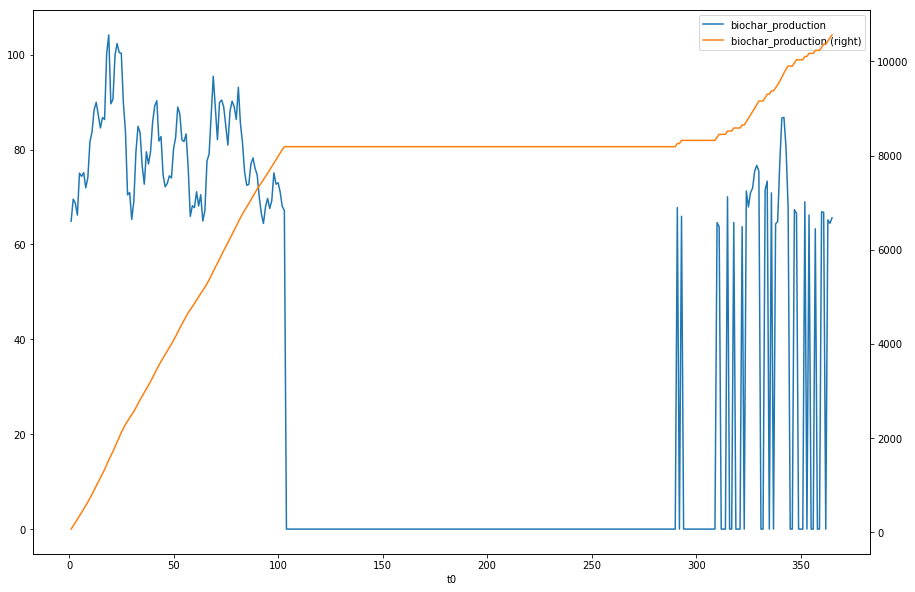

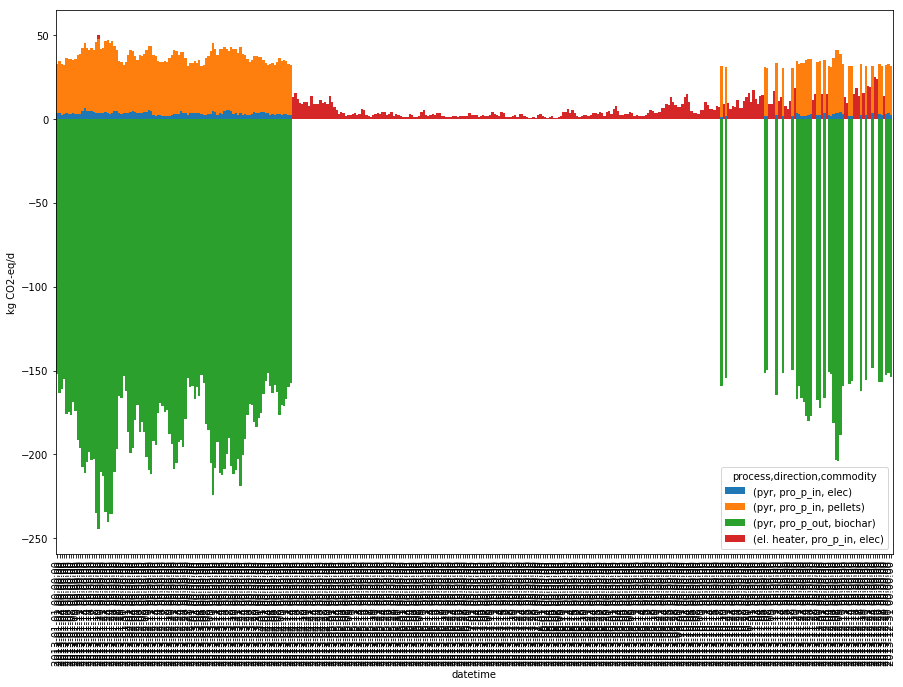

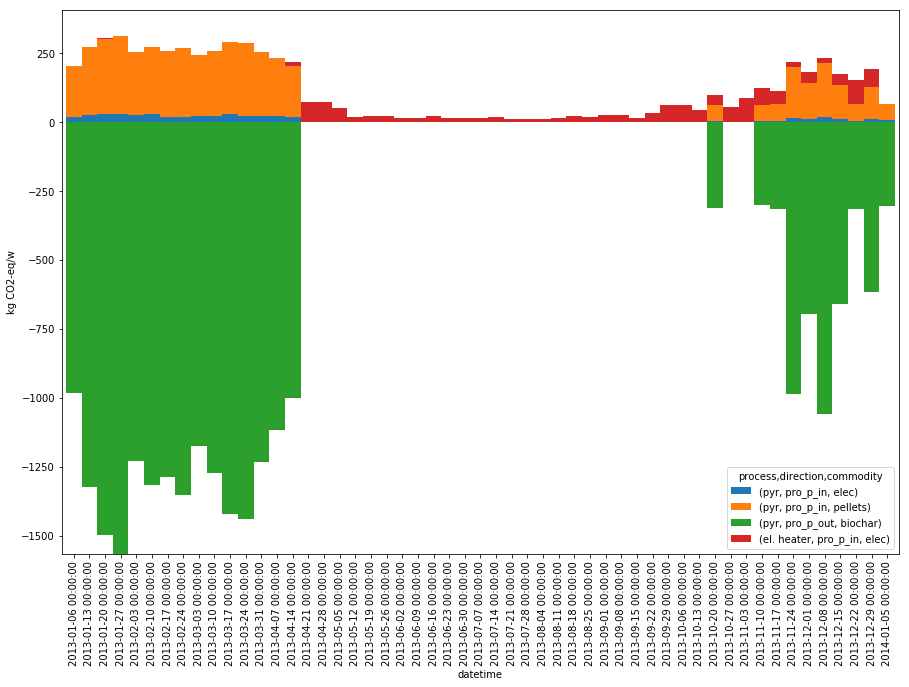

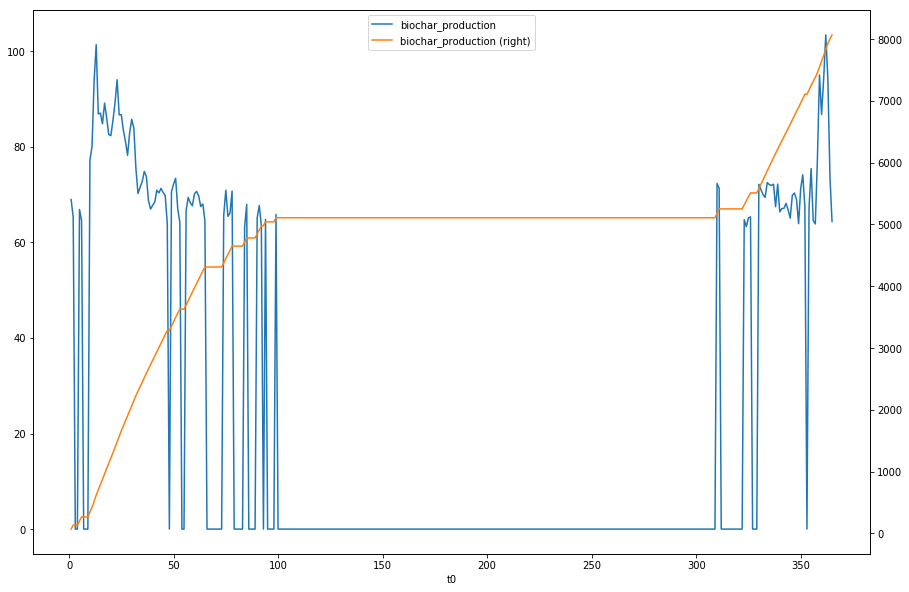

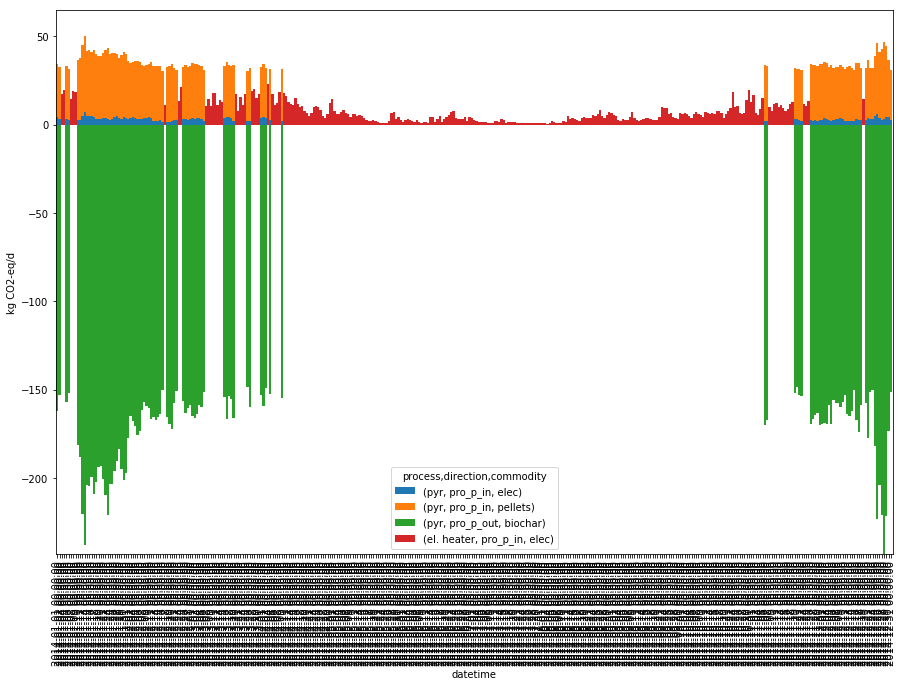

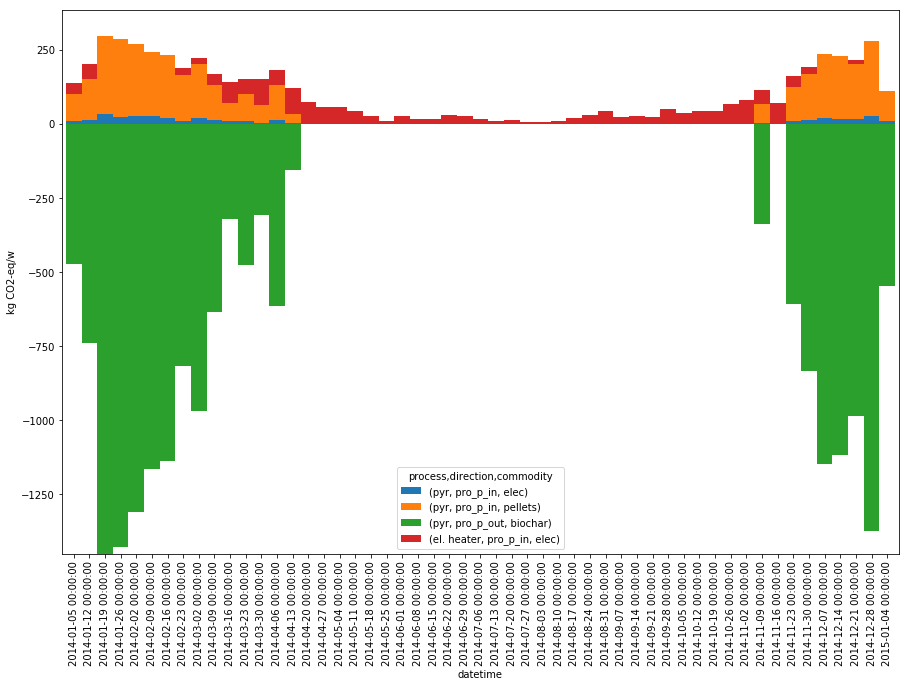

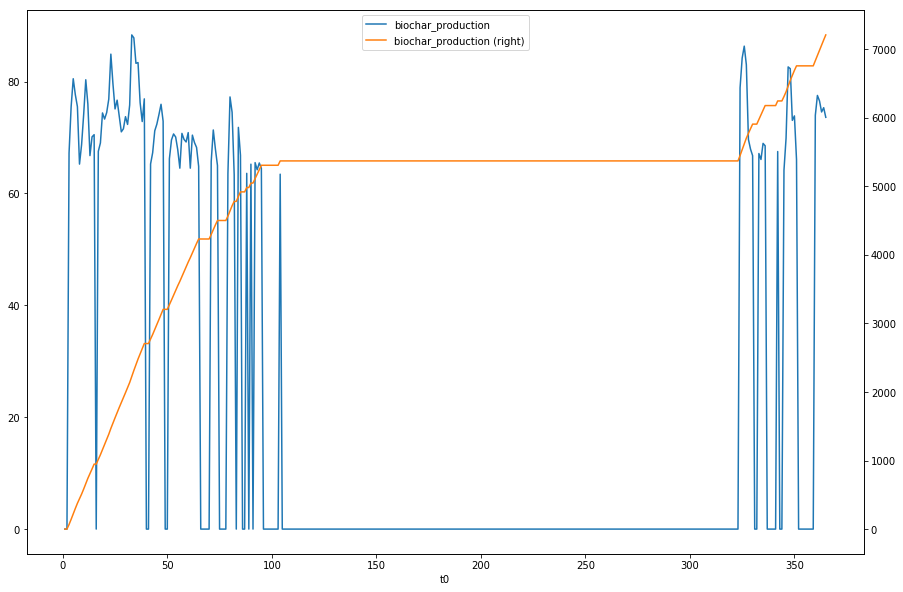

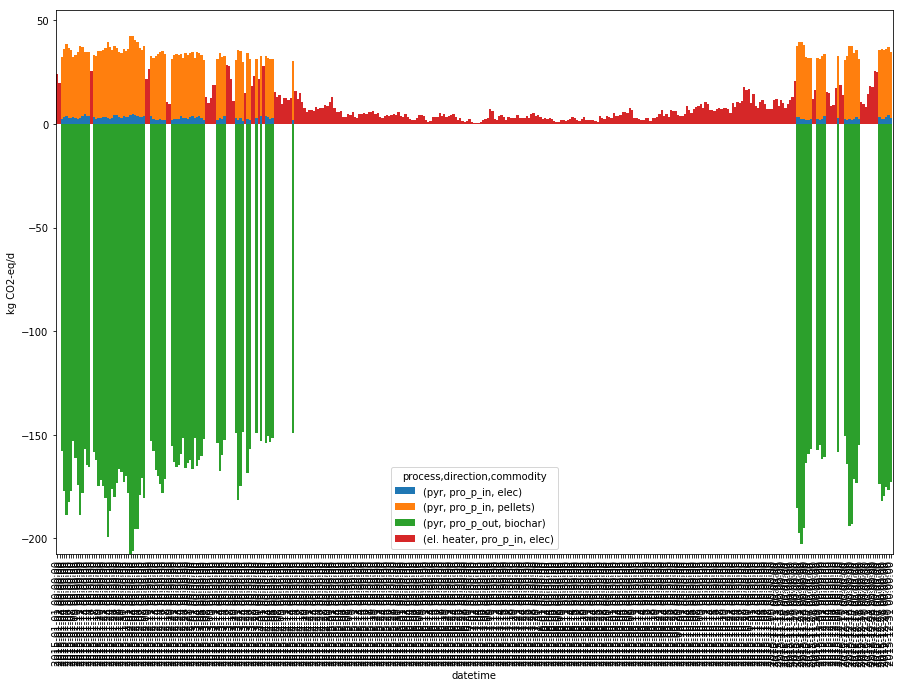

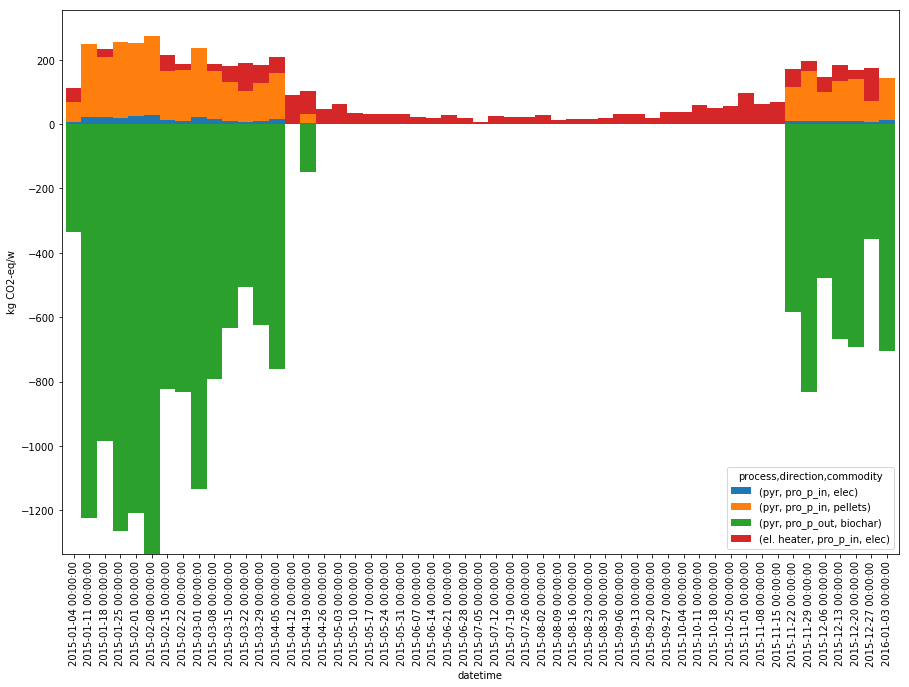

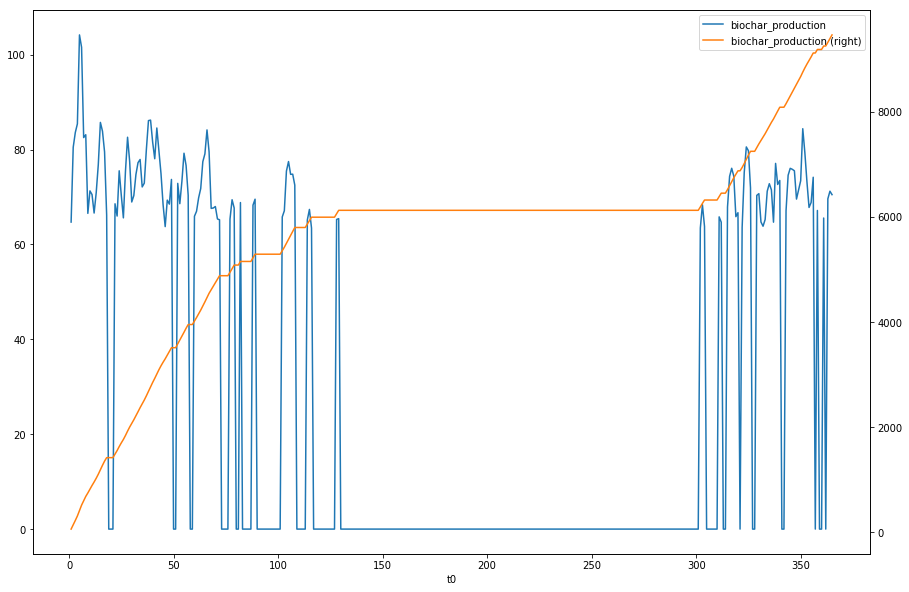

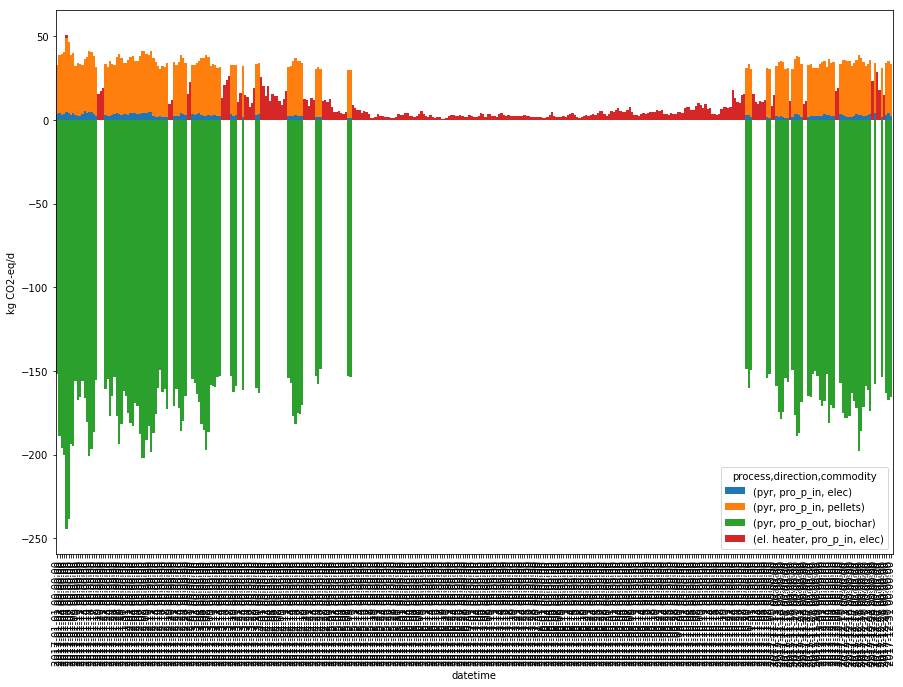

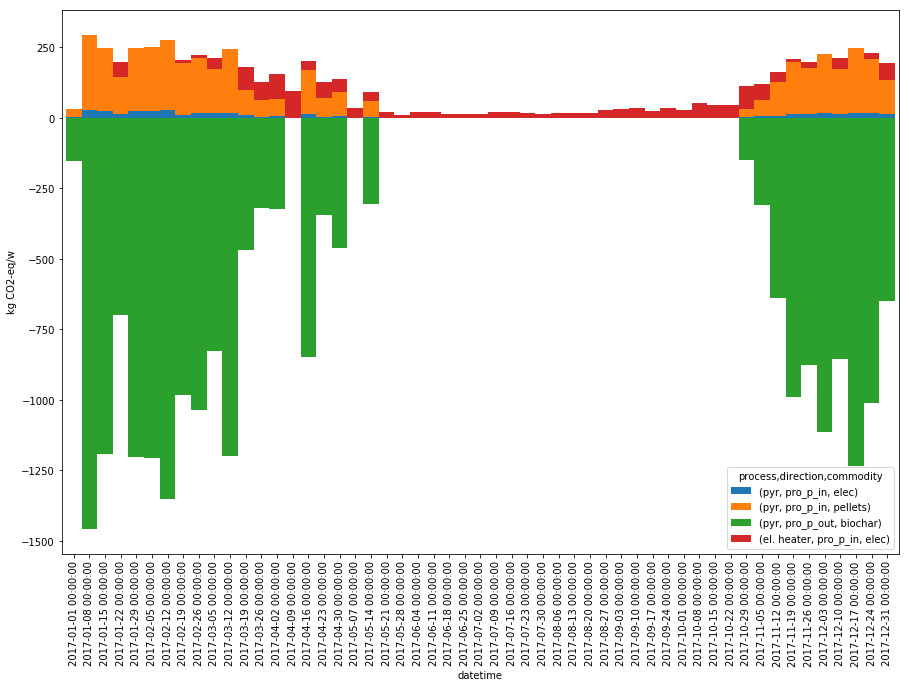

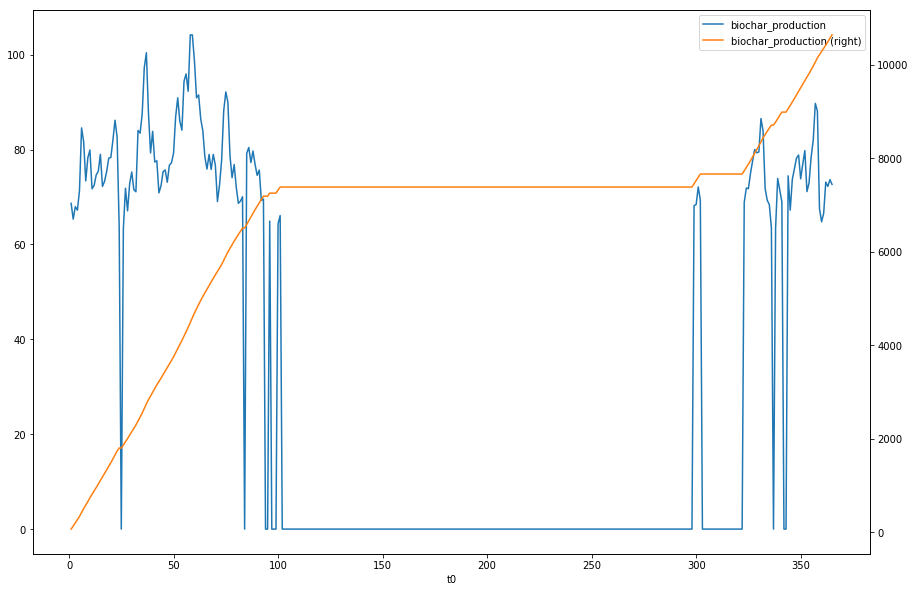

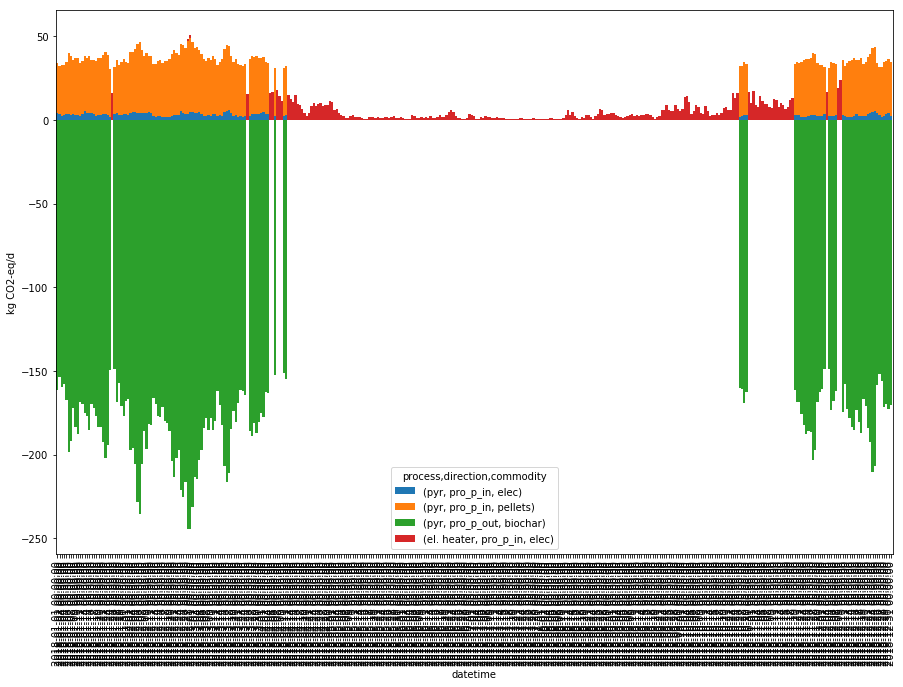

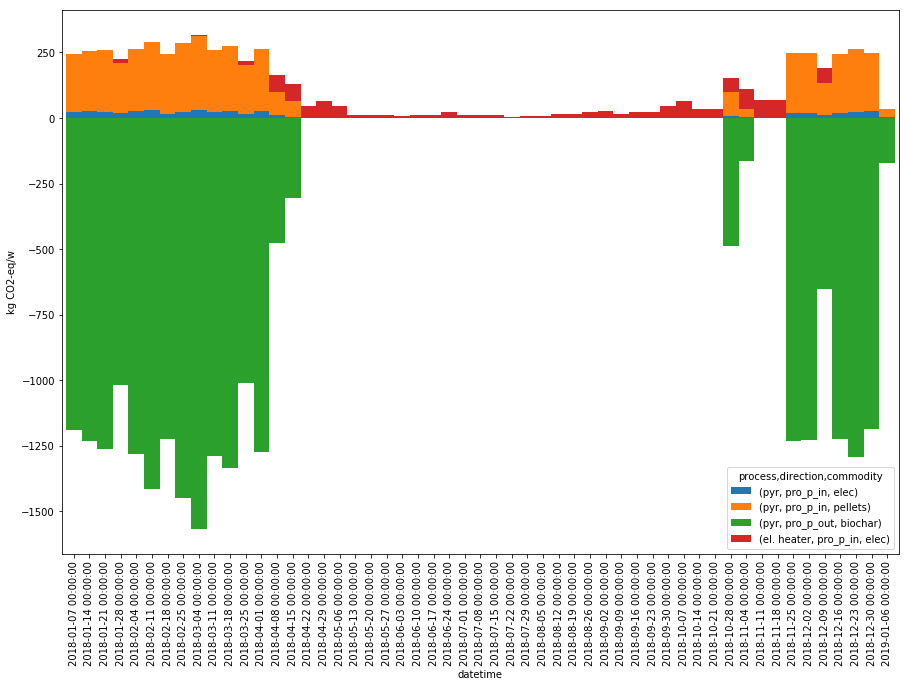

In [5]:
# energy demand calculated
ref_year= ['1996', '2010']
#Case 2: solid biomass fuel, PEF = 1 and EFF = 0.9 (Krav to be above 0.87, Boverket regulation)
e = np.array([90, 90, 90]) #kWh/m2/yr, from Boverket, PEF-corrected
c = np.array([1/1*0.9, 1/1*0.9, 1/1*0.9]) # /PEF * EFF (biomass) or /PEF * COP (heat pump)

#Case 1: electricity based declarations
e = np.array([90, 90, 90]) #kWh/m2/yr, from Boverket, PEF-corrected
c = np.array([1/1.6*3, 1/1.6*3, 1/1.6*3]) # /PEF *COP; worst case el values

#Case 3: electricity based declarations
e = np.array([90, 200, 159*1.6]) #kWh/m2/yr, from Boverket, PEF-corrected
c = np.array([1/1*0.9, 1/1.6*3, 1/1.6*3]) # /PEF *COP
farm_demand = fd.run_scn_demand(smhi_folder, smhi_files,
                                areas=a, energiprestande=e, water_share=w, cop_corr=c,
                                ref_year=ref_year, T_max=T_max, cc=False)


#years =['2008','2009','2010','2011','2012','2013','2014', '2015', '2016', '2017', '2018']
#years =['2014', '2015', '2017', '2018'] # skip 2016/2012, bissextile
#years = ['2010','2011','2013', '2014','2015', '2017', '2018']
years = ['2001','2002','2003', '2005','2006', '2007', '2009', '2010','2011','2013', '2014','2015', '2017', '2018']
# 2010 >>> https://en.wikipedia.org/wiki/2010_Swedish_cold_waves
for year in years:
    tmp = fs.selectInterval(farm_demand.resample('D').mean(), year+'-01-01', year+'-12-31')
    print(year, '>>> ', tmp.sum().sum()*p2e, ' kWh/yr')
    #scenario = 'T17elec_loop_'+year
    scenario = 'b17intermed_loop_'+year

    # plants parsed and ficus file written
    farm_supply = fs.run_scn_ficus_writer(plants_folder, plants_file,
                                          tb, tb_start, tb_end, 
                                          commodities_imp, commodities_exp, import_max, export_max, 
                                          el_folder, el_file, el_tab, 
                                          ef_pellets, biochar_seq, 
                                          plantsAvailable, farm_demand, year, elec_yr,
                                          ficus_folder, ficus_file, scenario)
    # run ficus milp
    prob = ff.run_ficus(ficus_folder+ficus_file+scenario+'.xlsx', opt = 'cplex', MipGap = 0)

    # saving ficus report and figures
    result_dir = ff.prepare_result_directory(ficus_result_folder,ficus_file+scenario)
    ff.report(prob, result_dir)
    ff.result_figures(result_dir,prob=prob, show=False)
    # printing final report and bw2-LCA
    
    lci_t, lcia_t = fb.run_scn_bw2(result_dir, 'result-'+proj+'_'+scenario+'.xlsx', year, p2e, 
                      plantsAvailable, ficus_folder, ficus_file, scenario,
                      proj, fg_db, fresh_db=False)

### Base technology, different heating demand

In [22]:
# Building properties
# 3 buildings = all renovated, respecting Boverket 90 kWh, supplied without heat pumps
a = np.array([400, 100, 89]) #m2
e = np.array([90, 90, 90]) #kWh/m2/yr, from Boverket, PEF-corrected
w = np.array([0.08, 0.08, 0.08])# share hot water
c = np.array([1, 1, 1]) # /PEF*COP = /1.6*3 >> worst case, when system respect regulation with electricity

# Annual electrical demand
elec_yr = 11000 # kWh

plantsAvailable = ['pyr15', 'el. heater'] # select among list in plants_file

# Year to study
year='2018'
scenario = 'lowBoverket_'
list_years=['2015', '2017']

# Input Ficus file names, scenario names
ficus_folder = 'C:/Users/eazzi/Box Sync/KTH_PhD_HeavyData/P2a_farm_biochar/'
ficus_file = 'cs1_Lindeborgs_'
#scenario = 'base_2018'
ficus_scenario = scenario+'.xlsx'

# Output Ficus 
ficus_result_folder = 'C:/Users/eazzi/Box Sync/KTH_PhD_HeavyData/P2a_farm_biochar/results'

In [23]:
# energy demand calculated
farm_demand = fd.run_scn_demand(smhi_folder, smhi_files,
                                areas=a, energiprestande=e, water_share=w, cop_corr=c,
                                ref_year=ref_year, T_max=T_max)

Parsing: smhi-opendata_1_86420_20190321_121405.csv
Parsing: smhi-opendata_1_86420_20190321_121419.csv
*Calculating annual heat demand*
Reference year:  2017
Total heat demand is  53010  kWh of which 8.0 % hot water
Returning farm_demand DataFrame


In [24]:
# plants parsed and ficus file written
farm_supply = fs.run_scn_ficus_writer(plants_folder, plants_file,
                                      tb, tb_start, tb_end, 
                                      commodities_imp, commodities_exp, import_max, export_max, 
                                      el_folder, el_file, el_tab, 
                                      ef_pellets, biochar_seq, 
                                      plantsAvailable, farm_demand, year, elec_yr,
                                      ficus_folder, ficus_file, scenario)
# run ficus milp
prob = ff.run_ficus(ficus_folder+ficus_file+scenario+'.xlsx', opt = 'cplex', MipGap = 0)

# saving ficus report and figures
result_dir = ff.prepare_result_directory(ficus_result_folder,ficus_file+scenario)
ff.report(prob, result_dir)
ff.result_figures(result_dir,prob=prob, show=False)

Parsing sample_plants
Calculating data for ficus input folder
Writing ficus input file
Read Data ...

Data Read. time: 0.1 s

Prepare Data ...

Data Prepared. time: 0.0 s

Define Model ...

Model Defined. time: 8.0 s

Solve Model ...


Welcome to IBM(R) ILOG(R) CPLEX(R) Interactive Optimizer 12.8.0.0
  with Simplex, Mixed Integer & Barrier Optimizers
5725-A06 5725-A29 5724-Y48 5724-Y49 5724-Y54 5724-Y55 5655-Y21
Copyright IBM Corp. 1988, 2017.  All Rights Reserved.

Type 'help' for a list of available commands.
Type 'help' followed by a command name for more
information on commands.

CPLEX> Logfile 'cplex.log' closed.
Logfile 'C:\Users\eazzi\AppData\Local\Temp\tmpopgezigm.cplex.log' open.
CPLEX> New value for default parallel thread count: 2
CPLEX> Problem 'C:\Users\eazzi\AppData\Local\Temp\tmp_uovc0lj.pyomo.lp' read.
Read time = 0.02 sec. (2.00 ticks)
CPLEX> Problem name         : C:\Users\eazzi\AppData\Local\Temp\tmp_uovc0lj.pyomo.lp
Objective sense      : Minimize
Variables         

Biochar produced annually:  biochar_production    6.520702
dtype: float64  tons
Compile ficus lci and lcia
pyr15
el. heater
-11.46186107255939 ton CO2-eq, net score, for 1 year of farm-energy
Daily and weekly plots
Towards bw2...


Writing activities to SQLite3 database:


Current project is:  cs1_Lindeborgs
Read only mode:  False


0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


Title: Writing activities to SQLite3 database:
  Started: 05/20/2019 16:11:59
  Finished: 05/20/2019 16:11:59
  Total time elapsed: 00:00:00
  CPU %: 90.10
  Memory %: 2.35
Scenario  lowBoverket_  is now ready for analysis in Activity-Browser


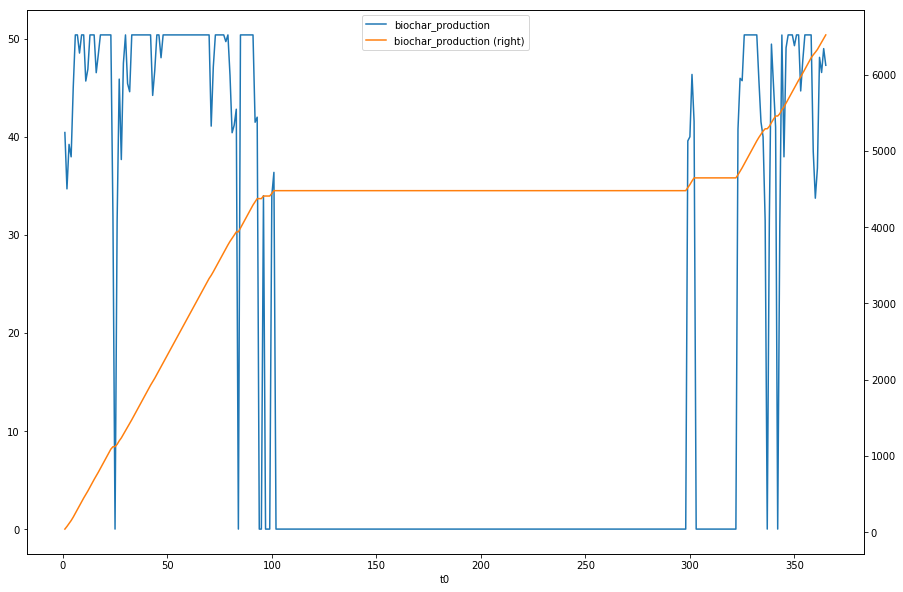

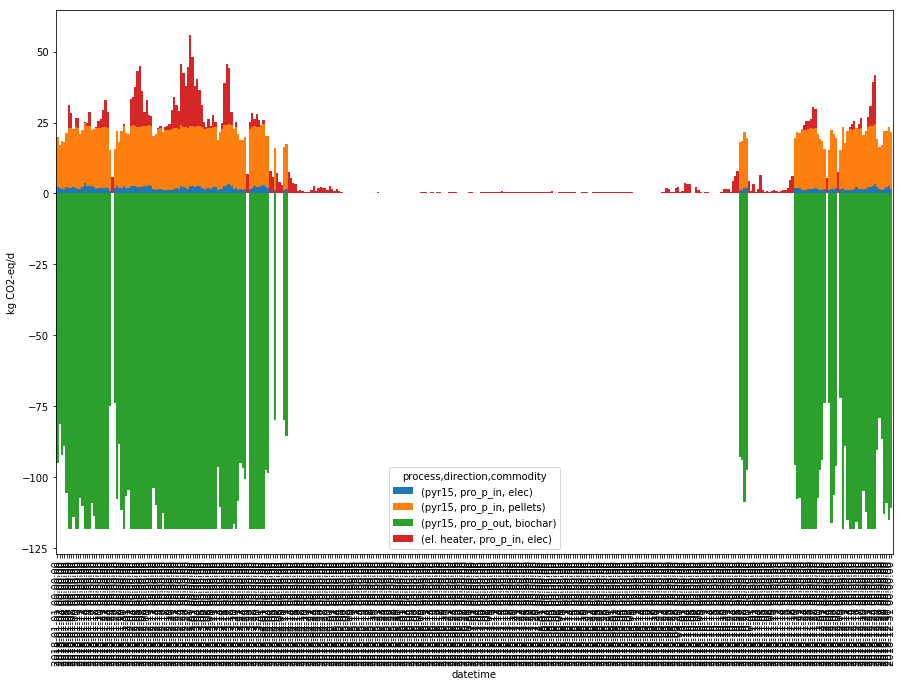

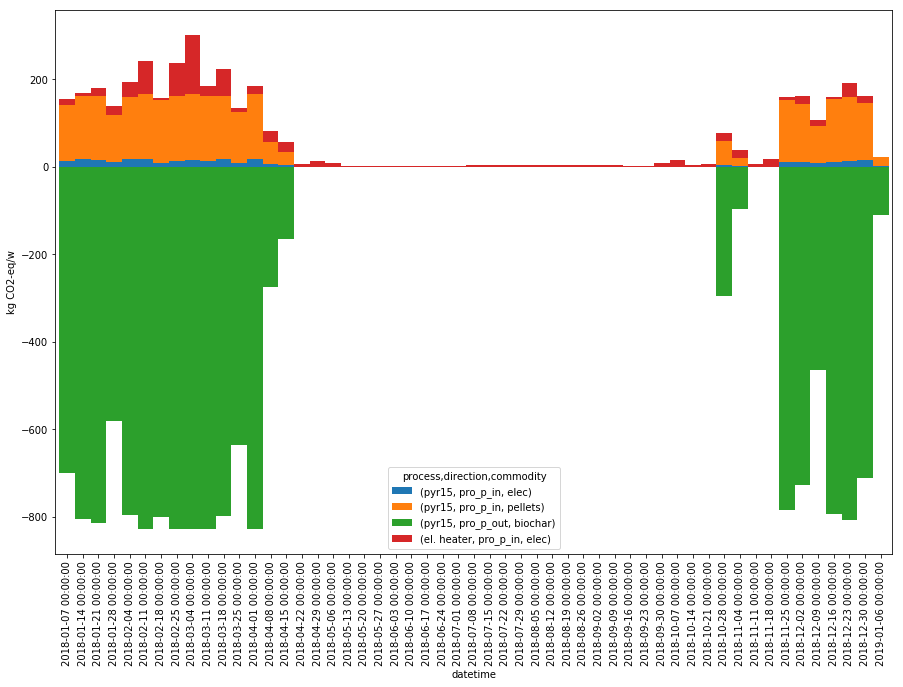

In [25]:
# printing final report and bw2-LCA
lci_t, lcia_t = fb.run_scn_bw2(result_dir, 'result-'+proj+'_'+ficus_scenario, year, p2e, 
                      plantsAvailable, ficus_folder, ficus_file, scenario,
                      proj, fg_db, fresh_db=False)

### Loop on years, climate change effect, 

In [11]:
# if cc=True, takes a bit longer, since it calculates new temperatures for 20 years of hourly data.
farm_demand = fd.run_scn_demand(smhi_folder, smhi_files,
                                areas=a, energiprestande=e, water_share=w, cop_corr=c,
                                ref_year=ref_year, T_max=T_max, cc=True)
# farm_demand.head()

Parsing: smhi-opendata_1_86420_20190321_121405.csv
Parsing: smhi-opendata_1_86420_20190321_121419.csv
*Calculating annual heat demand*
Reference year:  2017
Total heat demand is  145050.0  kWh of which 6.783867631851086 % hot water
Returning farm_demand DataFrame


2003 >>>  111783.54345851479  kWh/yr
Parsing sample_plants
Calculating data for ficus input folder
365 366 = annee bissextile
Writing ficus input file
Read Data ...

Data Read. time: 0.1 s

Prepare Data ...

Data Prepared. time: 0.0 s

Define Model ...

Model Defined. time: 7.5 s

Solve Model ...


Welcome to IBM(R) ILOG(R) CPLEX(R) Interactive Optimizer 12.8.0.0
  with Simplex, Mixed Integer & Barrier Optimizers
5725-A06 5725-A29 5724-Y48 5724-Y49 5724-Y54 5724-Y55 5655-Y21
Copyright IBM Corp. 1988, 2017.  All Rights Reserved.

Type 'help' for a list of available commands.
Type 'help' followed by a command name for more
information on commands.

CPLEX> Logfile 'cplex.log' closed.
Logfile 'C:\Users\eazzi\AppData\Local\Temp\tmpq7gvnagm.cplex.log' open.
CPLEX> New value for default parallel thread count: 2
CPLEX> Problem 'C:\Users\eazzi\AppData\Local\Temp\tmpd9swpxp1.pyomo.lp' read.
Read time = 0.02 sec. (2.00 ticks)
CPLEX> Problem name         : C:\Users\eazzi\AppData\Local\Temp\tmpd9sw

Writing activities to SQLite3 database:


Current project is:  cs1_Lindeborgs
Read only mode:  False


0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


Title: Writing activities to SQLite3 database:
  Started: 05/21/2019 11:47:29
  Finished: 05/21/2019 11:47:29
  Total time elapsed: 00:00:00
  CPU %: 256.20
  Memory %: 2.19
Scenario  loop_cc_2003  is now ready for analysis in Activity-Browser
2005 >>>  105279.83983498966  kWh/yr
Parsing sample_plants
Calculating data for ficus input folder
365 366 = annee bissextile
Writing ficus input file
Read Data ...

Data Read. time: 0.1 s

Prepare Data ...

Data Prepared. time: 0.0 s

Define Model ...

Model Defined. time: 7.5 s

Solve Model ...


Welcome to IBM(R) ILOG(R) CPLEX(R) Interactive Optimizer 12.8.0.0
  with Simplex, Mixed Integer & Barrier Optimizers
5725-A06 5725-A29 5724-Y48 5724-Y49 5724-Y54 5724-Y55 5655-Y21
Copyright IBM Corp. 1988, 2017.  All Rights Reserved.

Type 'help' for a list of available commands.
Type 'help' followed by a command name for more
information on commands.

CPLEX> Logfile 'cplex.log' closed.
Logfile 'C:\Users\eazzi\AppData\Local\Temp\tmpswcod8y3.cplex.log' 

Writing activities to SQLite3 database:


Current project is:  cs1_Lindeborgs
Read only mode:  False


0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


Title: Writing activities to SQLite3 database:
  Started: 05/21/2019 11:48:06
  Finished: 05/21/2019 11:48:06
  Total time elapsed: 00:00:00
  CPU %: 275.00
  Memory %: 2.48
Scenario  loop_cc_2005  is now ready for analysis in Activity-Browser
2006 >>>  107879.24064408921  kWh/yr
Parsing sample_plants
Calculating data for ficus input folder
365 366 = annee bissextile
Writing ficus input file
Read Data ...

Data Read. time: 0.1 s

Prepare Data ...

Data Prepared. time: 0.0 s

Define Model ...

Model Defined. time: 7.5 s

Solve Model ...


Welcome to IBM(R) ILOG(R) CPLEX(R) Interactive Optimizer 12.8.0.0
  with Simplex, Mixed Integer & Barrier Optimizers
5725-A06 5725-A29 5724-Y48 5724-Y49 5724-Y54 5724-Y55 5655-Y21
Copyright IBM Corp. 1988, 2017.  All Rights Reserved.

Type 'help' for a list of available commands.
Type 'help' followed by a command name for more
information on commands.

CPLEX> Logfile 'cplex.log' closed.
Logfile 'C:\Users\eazzi\AppData\Local\Temp\tmpp27nsdfk.cplex.log' 

Writing activities to SQLite3 database:


Current project is:  cs1_Lindeborgs
Read only mode:  False


0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


Title: Writing activities to SQLite3 database:
  Started: 05/21/2019 11:48:43
  Finished: 05/21/2019 11:48:43
  Total time elapsed: 00:00:00
  CPU %: 235.00
  Memory %: 2.88
Scenario  loop_cc_2006  is now ready for analysis in Activity-Browser
2007 >>>  86967.2792949524  kWh/yr
Parsing sample_plants
Calculating data for ficus input folder
365 366 = annee bissextile
Writing ficus input file
Read Data ...

Data Read. time: 0.1 s

Prepare Data ...

Data Prepared. time: 0.1 s

Define Model ...

Model Defined. time: 7.9 s

Solve Model ...


Welcome to IBM(R) ILOG(R) CPLEX(R) Interactive Optimizer 12.8.0.0
  with Simplex, Mixed Integer & Barrier Optimizers
5725-A06 5725-A29 5724-Y48 5724-Y49 5724-Y54 5724-Y55 5655-Y21
Copyright IBM Corp. 1988, 2017.  All Rights Reserved.

Type 'help' for a list of available commands.
Type 'help' followed by a command name for more
information on commands.

CPLEX> Logfile 'cplex.log' closed.
Logfile 'C:\Users\eazzi\AppData\Local\Temp\tmpvsf6miwt.cplex.log' op

Writing activities to SQLite3 database:


Current project is:  cs1_Lindeborgs
Read only mode:  False


0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


Title: Writing activities to SQLite3 database:
  Started: 05/21/2019 11:49:22
  Finished: 05/21/2019 11:49:23
  Total time elapsed: 00:00:00
  CPU %: 212.30
  Memory %: 3.17
Scenario  loop_cc_2007  is now ready for analysis in Activity-Browser
2009 >>>  107851.73214455081  kWh/yr
Parsing sample_plants
Calculating data for ficus input folder
365 366 = annee bissextile
Writing ficus input file
Read Data ...

Data Read. time: 0.1 s

Prepare Data ...

Data Prepared. time: 0.0 s

Define Model ...

Model Defined. time: 7.6 s

Solve Model ...


Welcome to IBM(R) ILOG(R) CPLEX(R) Interactive Optimizer 12.8.0.0
  with Simplex, Mixed Integer & Barrier Optimizers
5725-A06 5725-A29 5724-Y48 5724-Y49 5724-Y54 5724-Y55 5655-Y21
Copyright IBM Corp. 1988, 2017.  All Rights Reserved.

Type 'help' for a list of available commands.
Type 'help' followed by a command name for more
information on commands.

CPLEX> Logfile 'cplex.log' closed.
Logfile 'C:\Users\eazzi\AppData\Local\Temp\tmpmuqvxq0y.cplex.log' 

Writing activities to SQLite3 database:


Current project is:  cs1_Lindeborgs
Read only mode:  False


0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


Title: Writing activities to SQLite3 database:
  Started: 05/21/2019 11:50:00
  Finished: 05/21/2019 11:50:00
  Total time elapsed: 00:00:00
  CPU %: 227.00
  Memory %: 3.51
Scenario  loop_cc_2009  is now ready for analysis in Activity-Browser
2010 >>>  178748.35261155188  kWh/yr
Parsing sample_plants
Calculating data for ficus input folder
365 366 = annee bissextile
Writing ficus input file
Read Data ...

Data Read. time: 0.1 s

Prepare Data ...

Data Prepared. time: 0.1 s

Define Model ...

Model Defined. time: 7.3 s

Solve Model ...


Welcome to IBM(R) ILOG(R) CPLEX(R) Interactive Optimizer 12.8.0.0
  with Simplex, Mixed Integer & Barrier Optimizers
5725-A06 5725-A29 5724-Y48 5724-Y49 5724-Y54 5724-Y55 5655-Y21
Copyright IBM Corp. 1988, 2017.  All Rights Reserved.

Type 'help' for a list of available commands.
Type 'help' followed by a command name for more
information on commands.

CPLEX> Logfile 'cplex.log' closed.
Logfile 'C:\Users\eazzi\AppData\Local\Temp\tmpoxy4z4dq.cplex.log' 

Writing activities to SQLite3 database:


Current project is:  cs1_Lindeborgs
Read only mode:  False


0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


Title: Writing activities to SQLite3 database:
  Started: 05/21/2019 11:50:38
  Finished: 05/21/2019 11:50:38
  Total time elapsed: 00:00:00
  CPU %: 221.00
  Memory %: 3.88
Scenario  loop_cc_2010  is now ready for analysis in Activity-Browser
2011 >>>  97900.13456510424  kWh/yr
Parsing sample_plants
Calculating data for ficus input folder
365 366 = annee bissextile
Writing ficus input file
Read Data ...

Data Read. time: 0.1 s

Prepare Data ...

Data Prepared. time: 0.0 s

Define Model ...

Model Defined. time: 7.7 s

Solve Model ...


Welcome to IBM(R) ILOG(R) CPLEX(R) Interactive Optimizer 12.8.0.0
  with Simplex, Mixed Integer & Barrier Optimizers
5725-A06 5725-A29 5724-Y48 5724-Y49 5724-Y54 5724-Y55 5655-Y21
Copyright IBM Corp. 1988, 2017.  All Rights Reserved.

Type 'help' for a list of available commands.
Type 'help' followed by a command name for more
information on commands.

CPLEX> Logfile 'cplex.log' closed.
Logfile 'C:\Users\eazzi\AppData\Local\Temp\tmpb4v_u1sj.cplex.log' o

C:\Users\eazzi\AppData\Local\conda\conda\envs\bw2\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Towards bw2...


Writing activities to SQLite3 database:


Current project is:  cs1_Lindeborgs
Read only mode:  False


0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


Title: Writing activities to SQLite3 database:
  Started: 05/21/2019 11:51:38
  Finished: 05/21/2019 11:51:38
  Total time elapsed: 00:00:00
  CPU %: 183.30
  Memory %: 4.15
Scenario  loop_cc_2011  is now ready for analysis in Activity-Browser
2013 >>>  112456.12197160357  kWh/yr
Parsing sample_plants
Calculating data for ficus input folder
365 366 = annee bissextile
Writing ficus input file
Read Data ...

Data Read. time: 0.1 s

Prepare Data ...

Data Prepared. time: 0.1 s

Define Model ...

Model Defined. time: 9.4 s

Solve Model ...


Welcome to IBM(R) ILOG(R) CPLEX(R) Interactive Optimizer 12.8.0.0
  with Simplex, Mixed Integer & Barrier Optimizers
5725-A06 5725-A29 5724-Y48 5724-Y49 5724-Y54 5724-Y55 5655-Y21
Copyright IBM Corp. 1988, 2017.  All Rights Reserved.

Type 'help' for a list of available commands.
Type 'help' followed by a command name for more
information on commands.

CPLEX> Logfile 'cplex.log' closed.
Logfile 'C:\Users\eazzi\AppData\Local\Temp\tmpu735cf9_.cplex.log' 

Writing activities to SQLite3 database:


Current project is:  cs1_Lindeborgs
Read only mode:  False


0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


Title: Writing activities to SQLite3 database:
  Started: 05/21/2019 11:52:28
  Finished: 05/21/2019 11:52:28
  Total time elapsed: 00:00:00
  CPU %: 191.80
  Memory %: 4.63
Scenario  loop_cc_2013  is now ready for analysis in Activity-Browser
2014 >>>  76767.37442335342  kWh/yr
Parsing sample_plants
Calculating data for ficus input folder
365 366 = annee bissextile
Writing ficus input file
Read Data ...

Data Read. time: 0.1 s

Prepare Data ...

Data Prepared. time: 0.1 s

Define Model ...

Model Defined. time: 9.1 s

Solve Model ...


Welcome to IBM(R) ILOG(R) CPLEX(R) Interactive Optimizer 12.8.0.0
  with Simplex, Mixed Integer & Barrier Optimizers
5725-A06 5725-A29 5724-Y48 5724-Y49 5724-Y54 5724-Y55 5655-Y21
Copyright IBM Corp. 1988, 2017.  All Rights Reserved.

Type 'help' for a list of available commands.
Type 'help' followed by a command name for more
information on commands.

CPLEX> Logfile 'cplex.log' closed.
Logfile 'C:\Users\eazzi\AppData\Local\Temp\tmpoztpu06a.cplex.log' o

Writing activities to SQLite3 database:
0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


Title: Writing activities to SQLite3 database:
  Started: 05/21/2019 11:53:25
  Finished: 05/21/2019 11:53:25
  Total time elapsed: 00:00:00
  CPU %: 90.50
  Memory %: 5.05
Scenario  loop_cc_2014  is now ready for analysis in Activity-Browser
2015 >>>  64890.76975071511  kWh/yr
Parsing sample_plants
Calculating data for ficus input folder
365 366 = annee bissextile
Writing ficus input file
Read Data ...

Data Read. time: 0.1 s

Prepare Data ...

Data Prepared. time: 0.0 s

Define Model ...

Model Defined. time: 11.5 s

Solve Model ...


Welcome to IBM(R) ILOG(R) CPLEX(R) Interactive Optimizer 12.8.0.0
  with Simplex, Mixed Integer & Barrier Optimizers
5725-A06 5725-A29 5724-Y48 5724-Y49 5724-Y54 5724-Y55 5655-Y21
Copyright IBM Corp. 1988, 2017.  All Rights Reserved.

Type 'help' for a list of available commands.
Type 'help' followed by a command name for more
information on commands.

CPLEX> Logfile 'cplex.log' closed.
Logfile 'C:\Users\eazzi\AppData\Local\Temp\tmprmjd1k_e.cplex.log' o

Writing activities to SQLite3 database:
0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


Title: Writing activities to SQLite3 database:
  Started: 05/21/2019 11:54:19
  Finished: 05/21/2019 11:54:19
  Total time elapsed: 00:00:00
  CPU %: 88.40
  Memory %: 5.44
Scenario  loop_cc_2015  is now ready for analysis in Activity-Browser
2017 >>>  85353.1543718083  kWh/yr
Parsing sample_plants
Calculating data for ficus input folder
365 366 = annee bissextile
Writing ficus input file
Read Data ...

Data Read. time: 0.2 s

Prepare Data ...

Data Prepared. time: 0.1 s

Define Model ...

Model Defined. time: 10.7 s

Solve Model ...


Welcome to IBM(R) ILOG(R) CPLEX(R) Interactive Optimizer 12.8.0.0
  with Simplex, Mixed Integer & Barrier Optimizers
5725-A06 5725-A29 5724-Y48 5724-Y49 5724-Y54 5724-Y55 5655-Y21
Copyright IBM Corp. 1988, 2017.  All Rights Reserved.

Type 'help' for a list of available commands.
Type 'help' followed by a command name for more
information on commands.

CPLEX> Logfile 'cplex.log' closed.
Logfile 'C:\Users\eazzi\AppData\Local\Temp\tmpjd3x4blm.cplex.log' op

Writing activities to SQLite3 database:
0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


Title: Writing activities to SQLite3 database:
  Started: 05/21/2019 11:55:13
  Finished: 05/21/2019 11:55:13
  Total time elapsed: 00:00:00
  CPU %: 66.80
  Memory %: 5.78
Scenario  loop_cc_2017  is now ready for analysis in Activity-Browser
2018 >>>  112285.22215863704  kWh/yr
Parsing sample_plants
Calculating data for ficus input folder
365 366 = annee bissextile
Writing ficus input file
Read Data ...

Data Read. time: 0.2 s

Prepare Data ...

Data Prepared. time: 0.1 s

Define Model ...

Model Defined. time: 8.6 s

Solve Model ...


Welcome to IBM(R) ILOG(R) CPLEX(R) Interactive Optimizer 12.8.0.0
  with Simplex, Mixed Integer & Barrier Optimizers
5725-A06 5725-A29 5724-Y48 5724-Y49 5724-Y54 5724-Y55 5655-Y21
Copyright IBM Corp. 1988, 2017.  All Rights Reserved.

Type 'help' for a list of available commands.
Type 'help' followed by a command name for more
information on commands.

CPLEX> Logfile 'cplex.log' closed.
Logfile 'C:\Users\eazzi\AppData\Local\Temp\tmpxznbm4j3.cplex.log' o

Writing activities to SQLite3 database:
0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


Title: Writing activities to SQLite3 database:
  Started: 05/21/2019 11:56:04
  Finished: 05/21/2019 11:56:04
  Total time elapsed: 00:00:00
  CPU %: 58.70
  Memory %: 6.15
Scenario  loop_cc_2018  is now ready for analysis in Activity-Browser


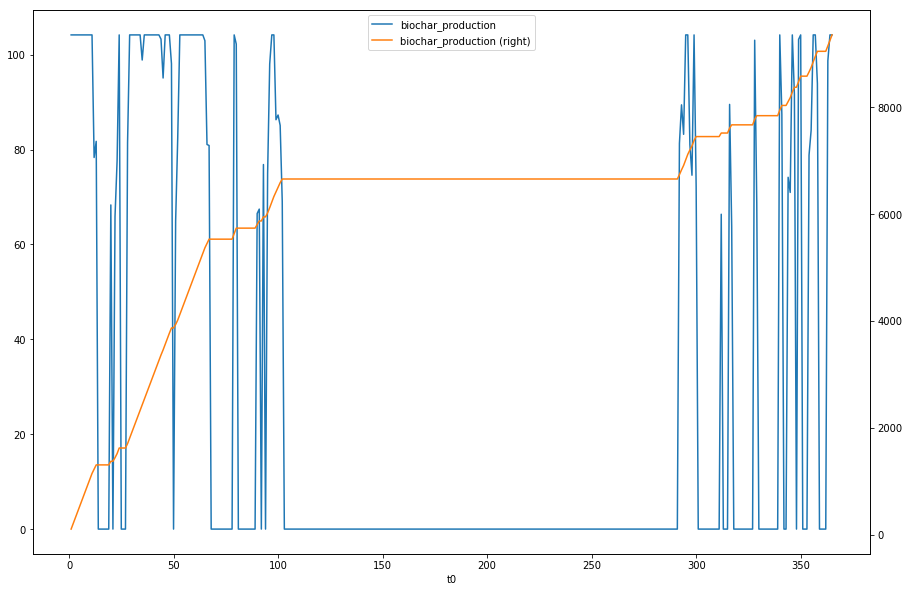

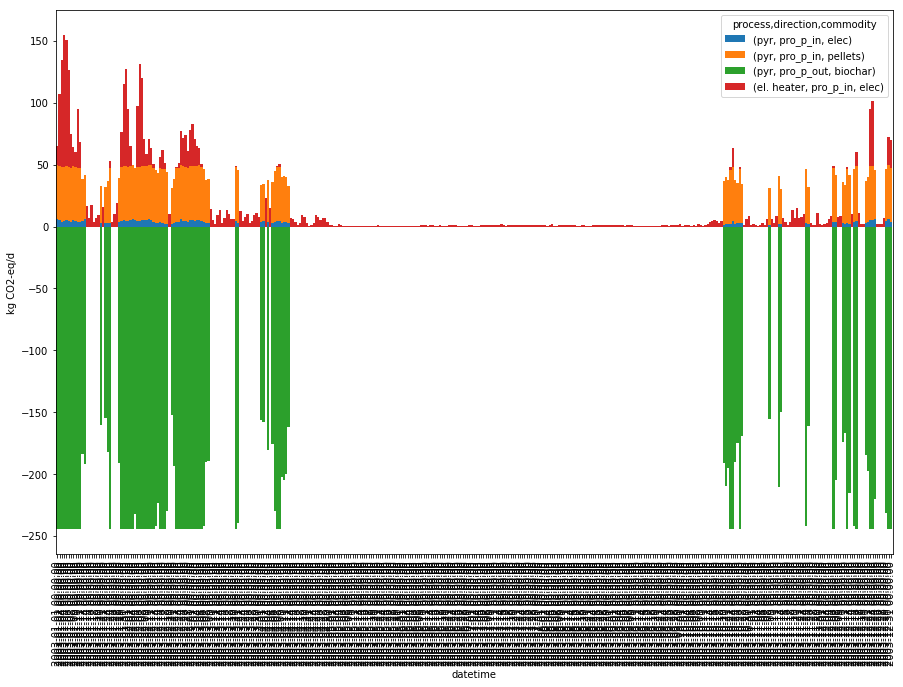

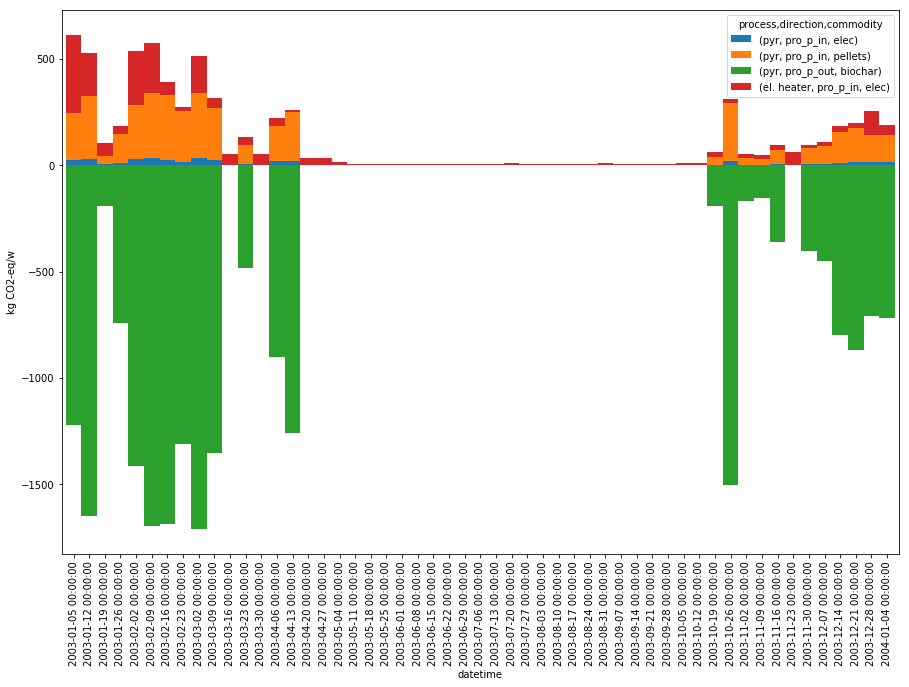

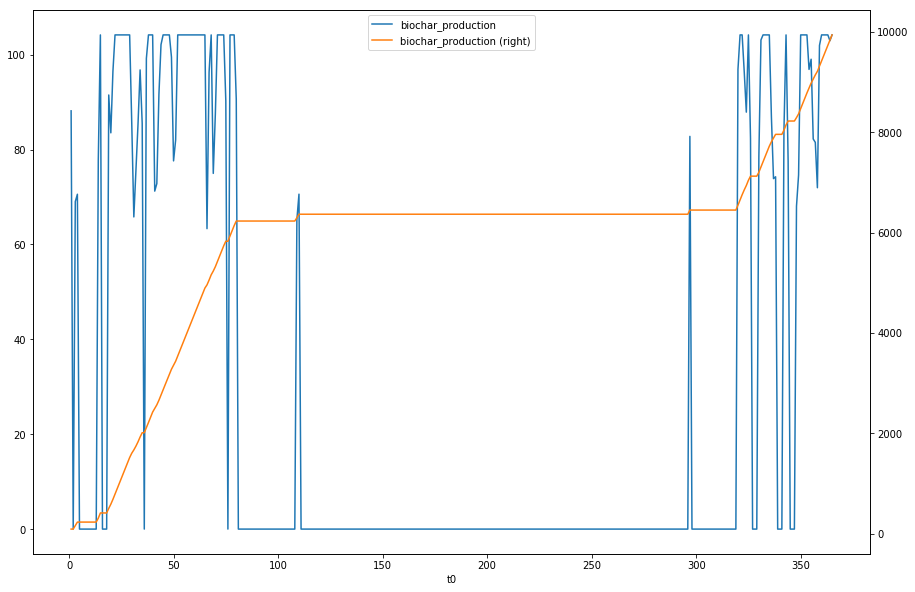

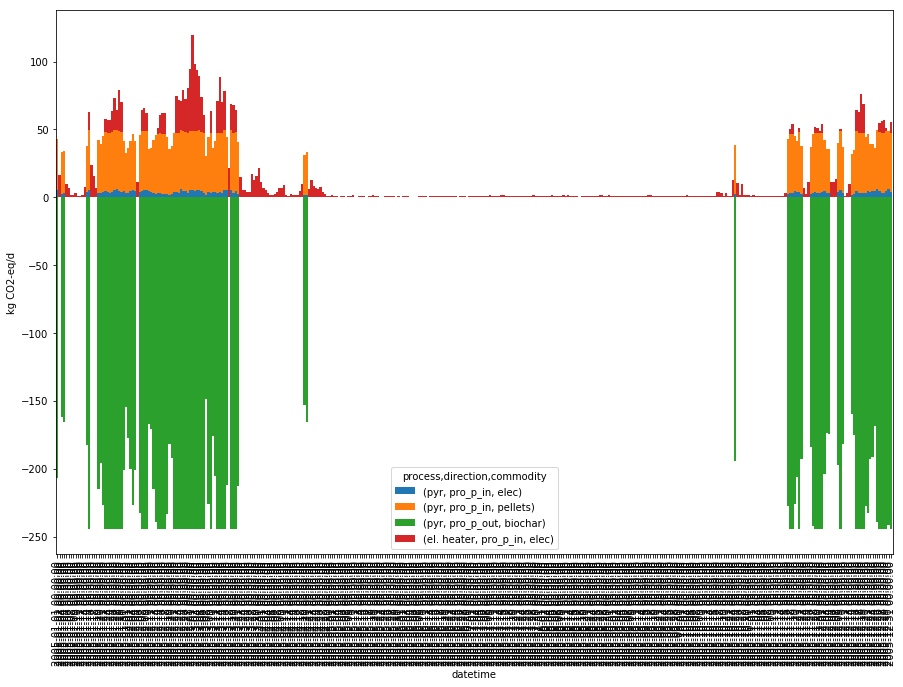

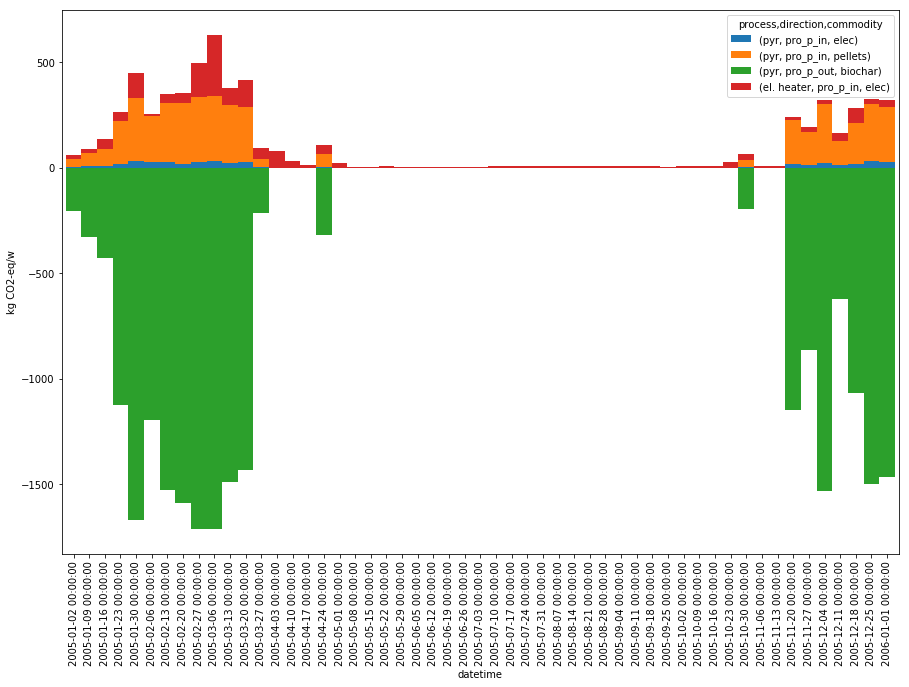

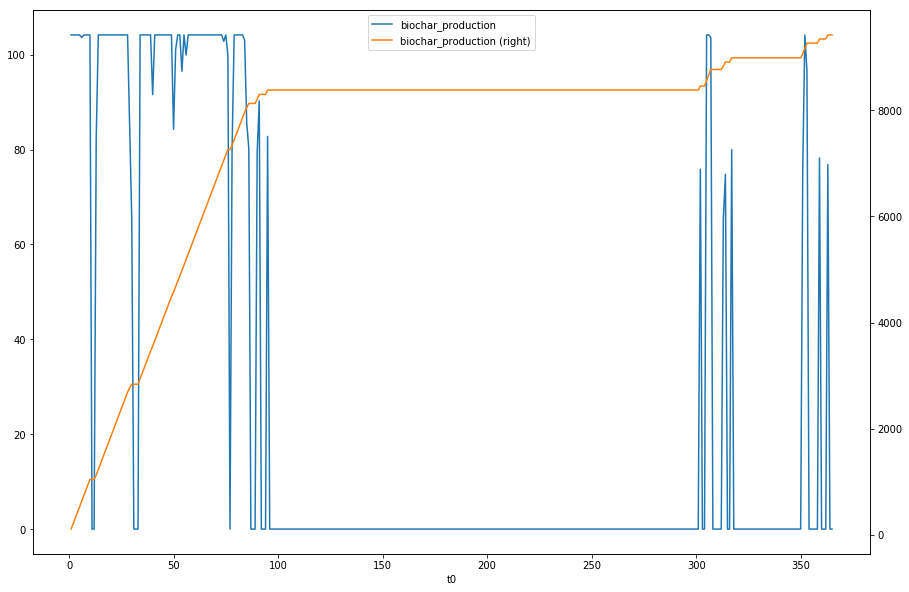

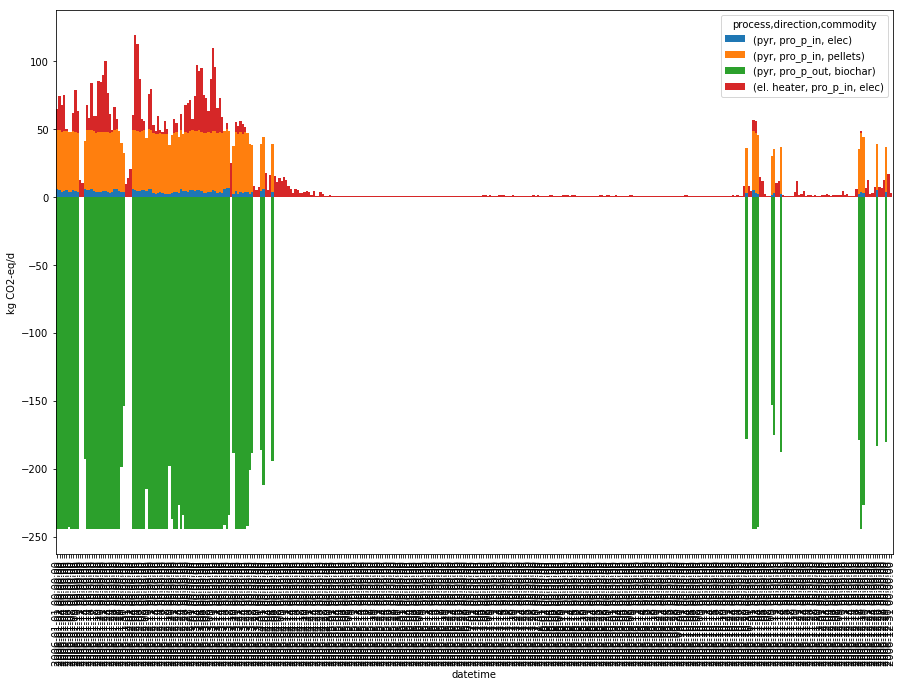

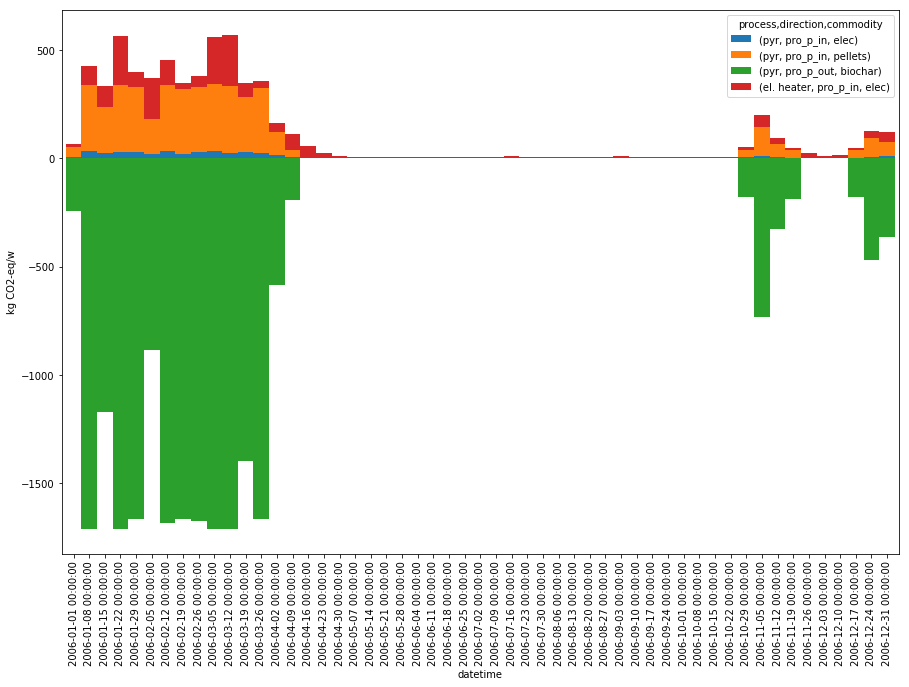

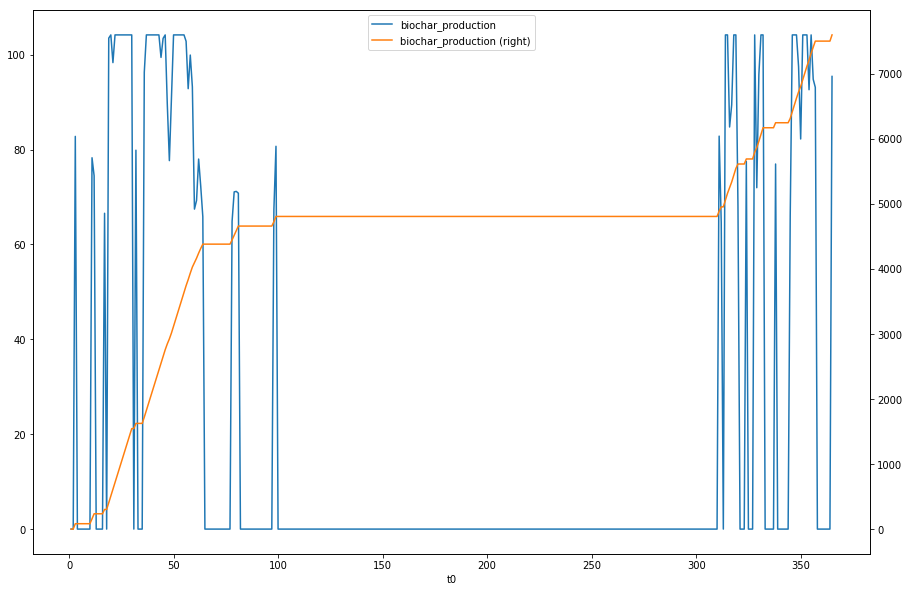

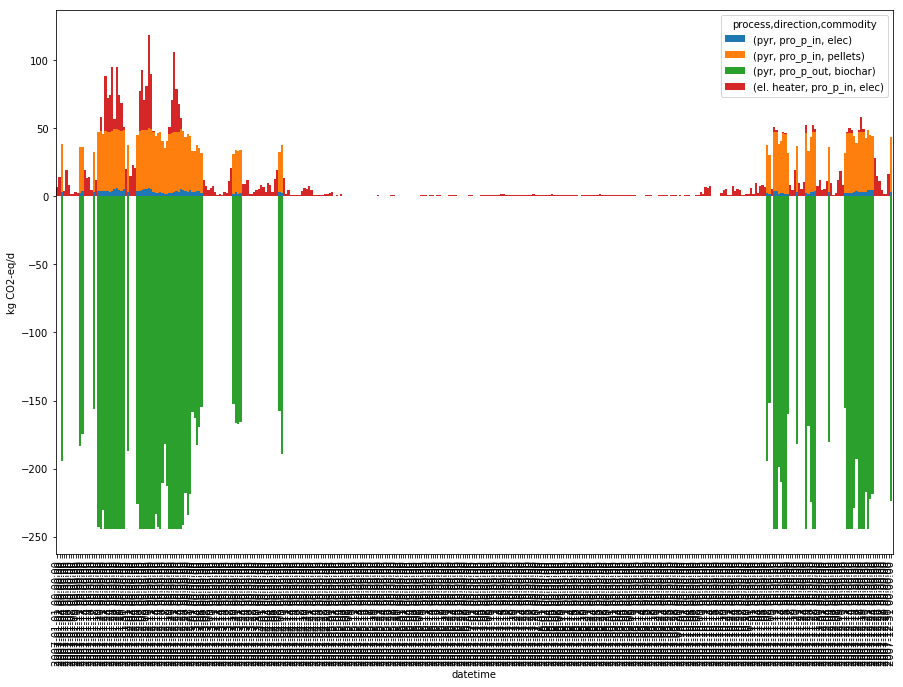

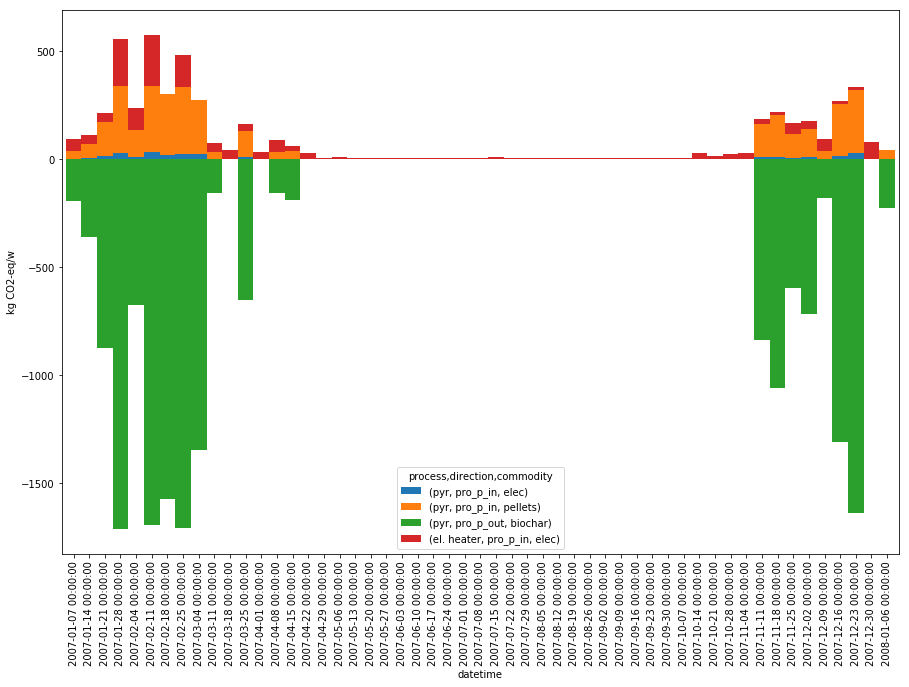

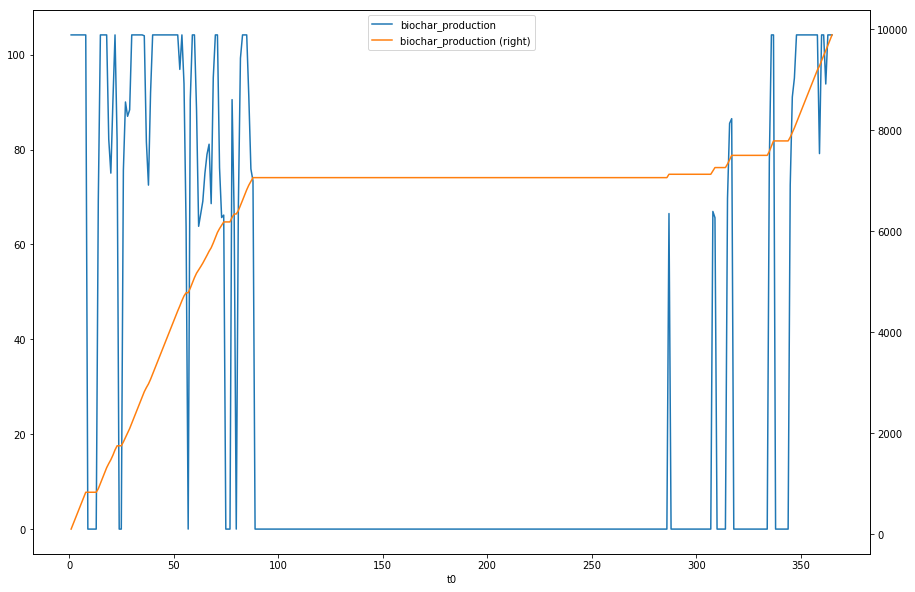

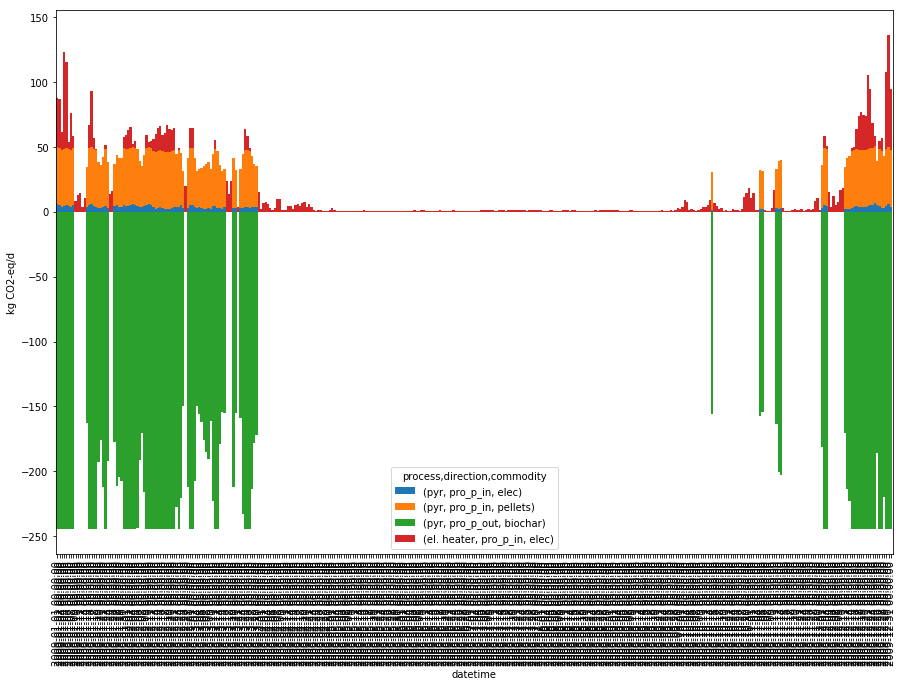

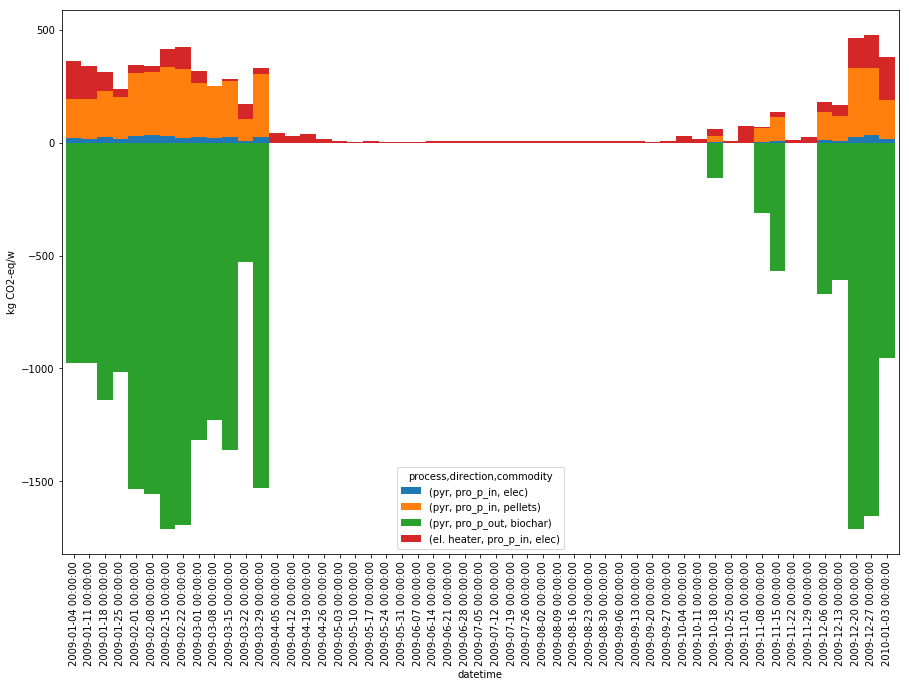

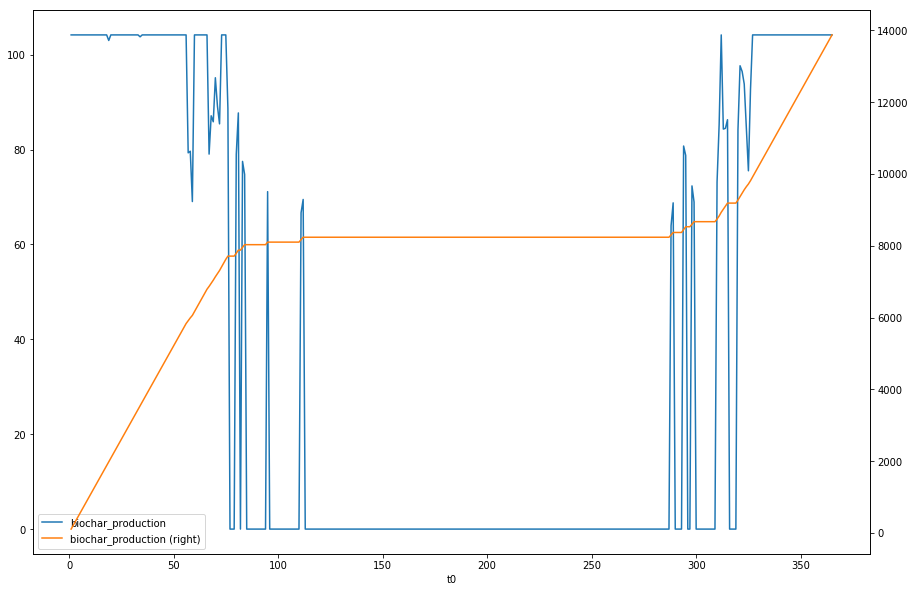

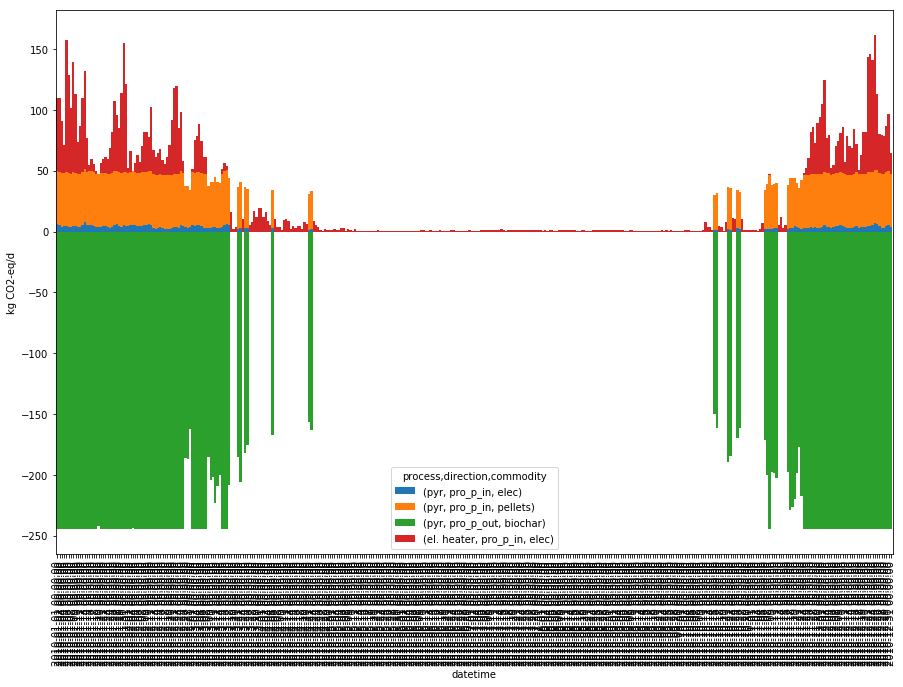

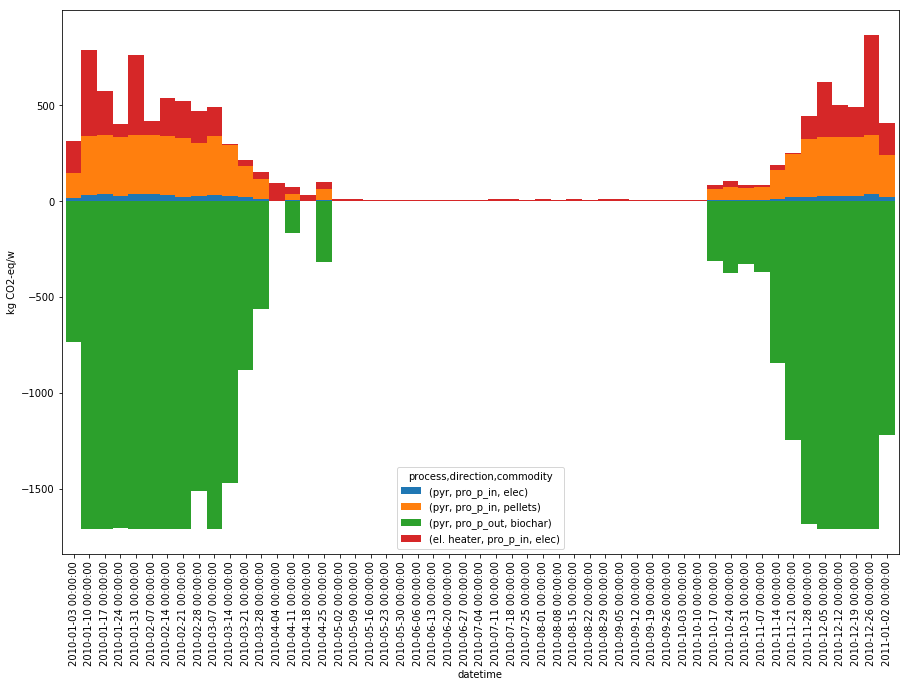

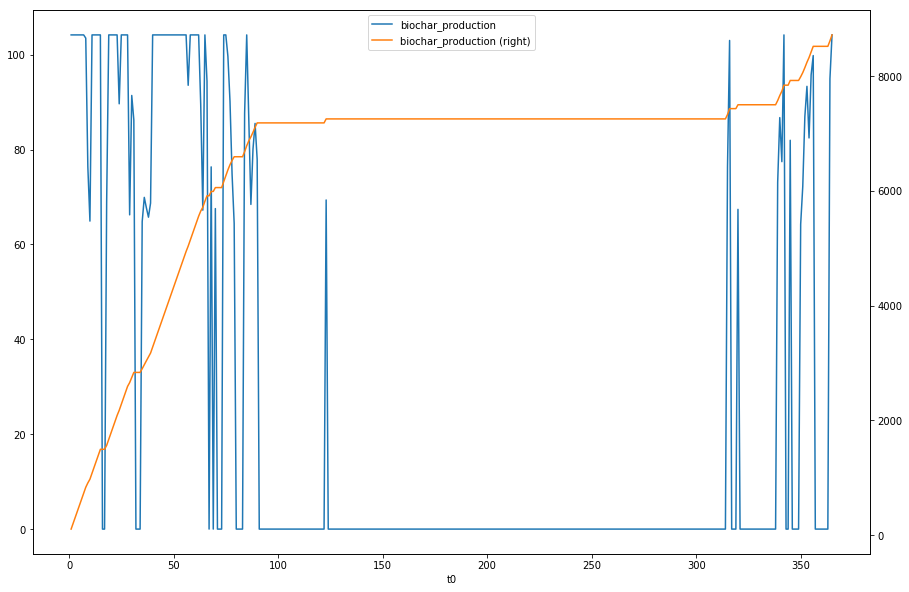

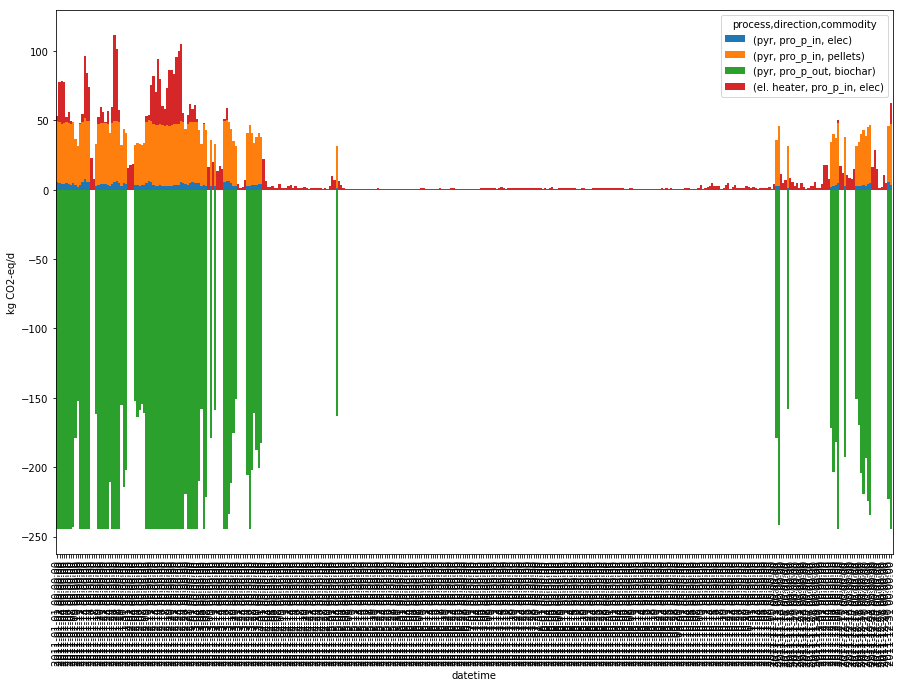

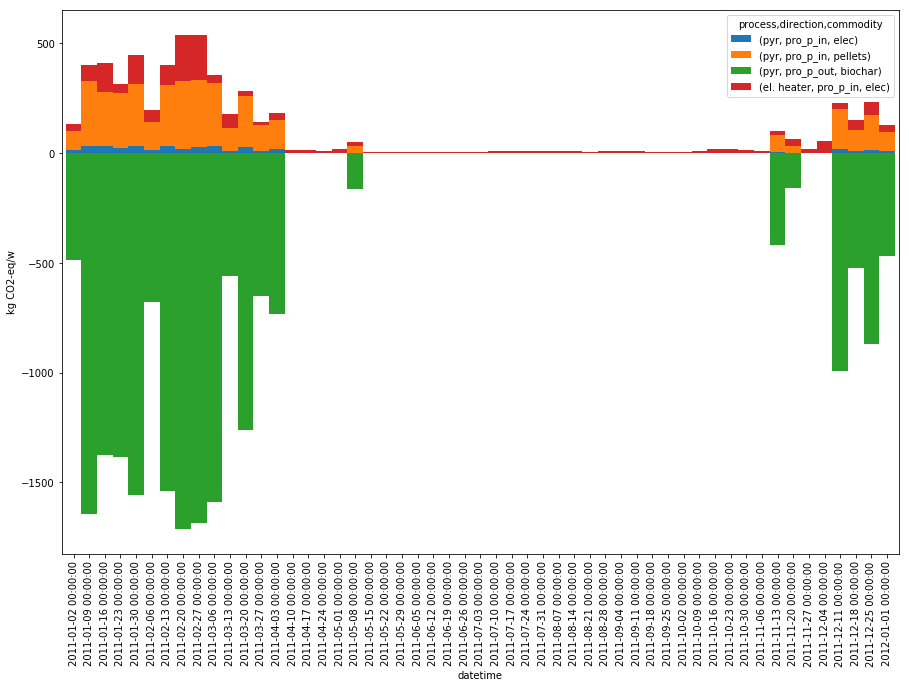

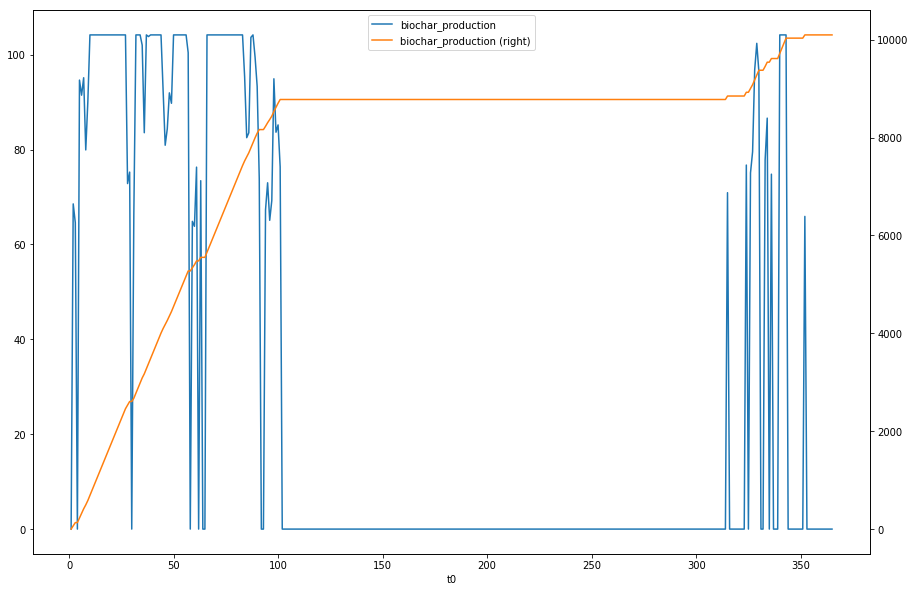

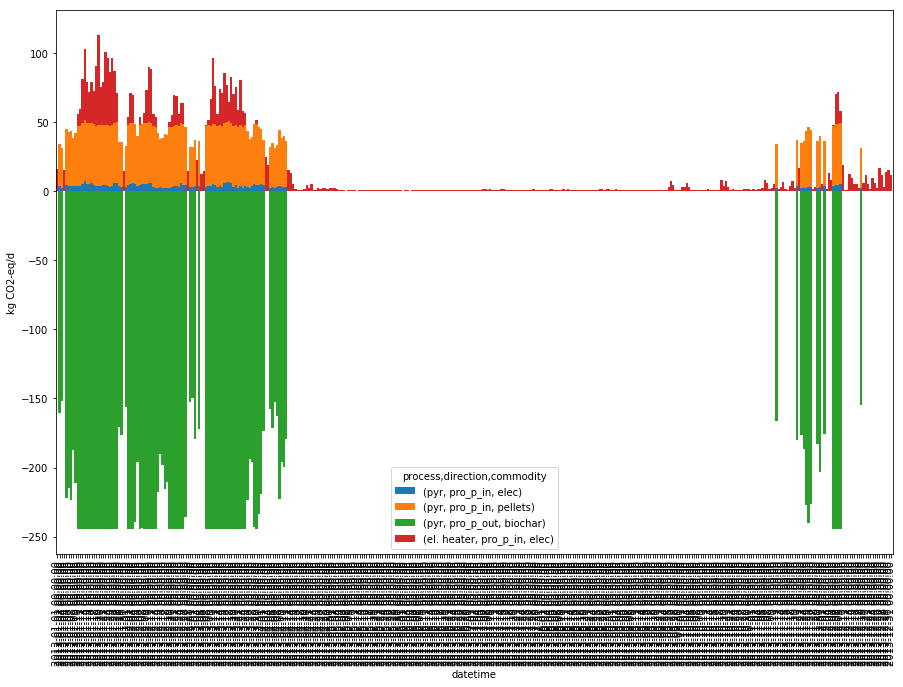

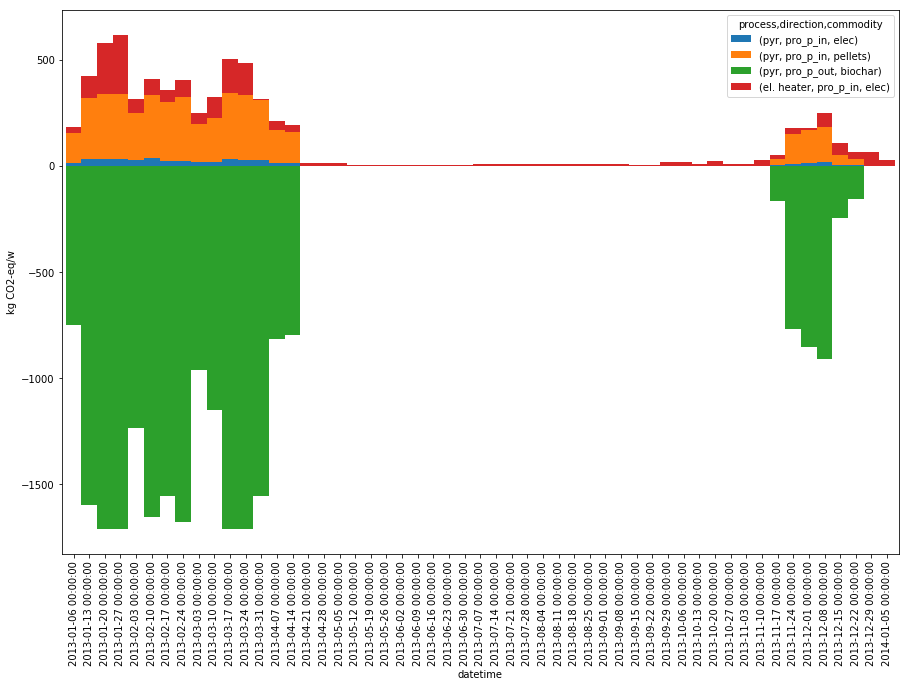

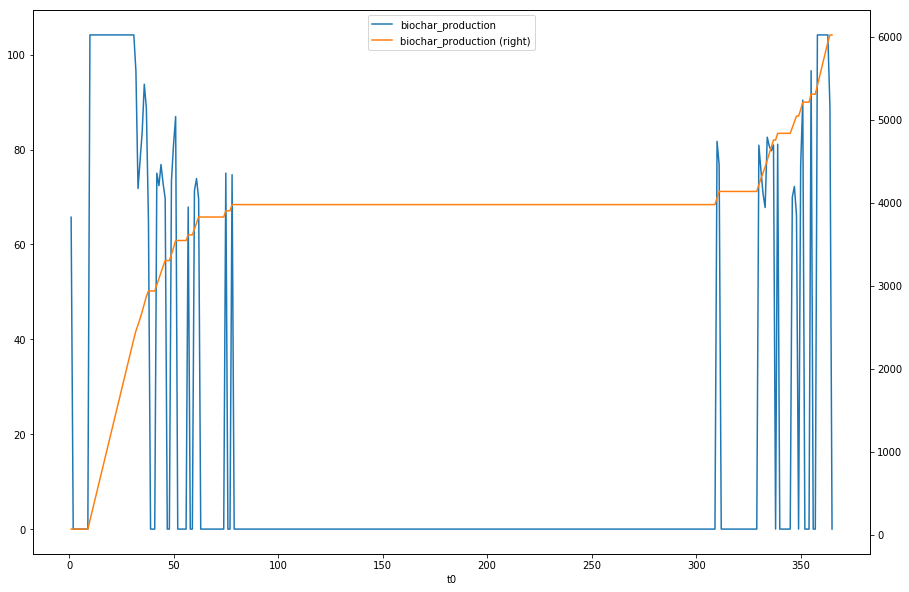

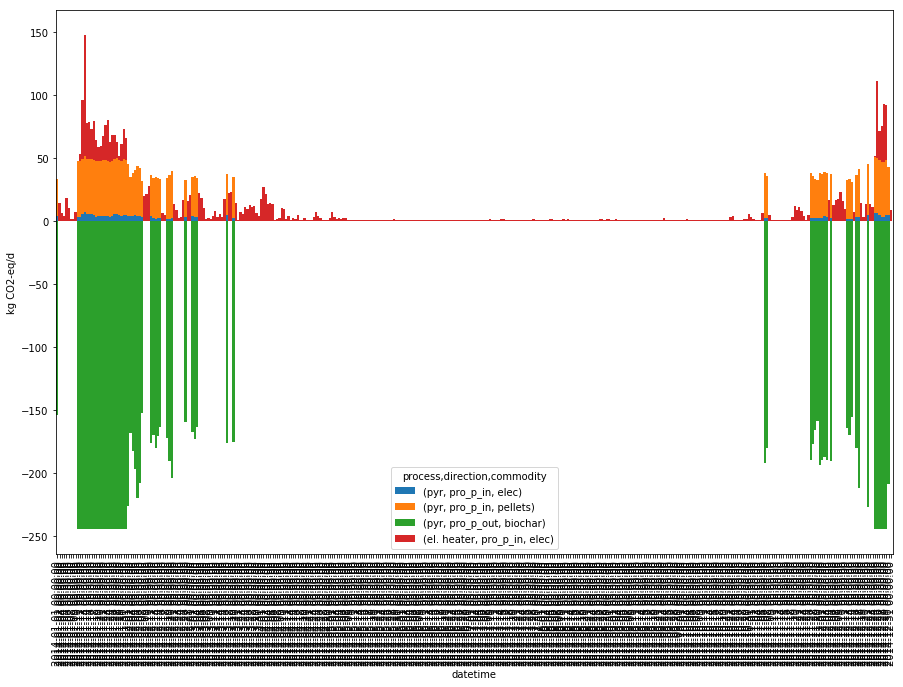

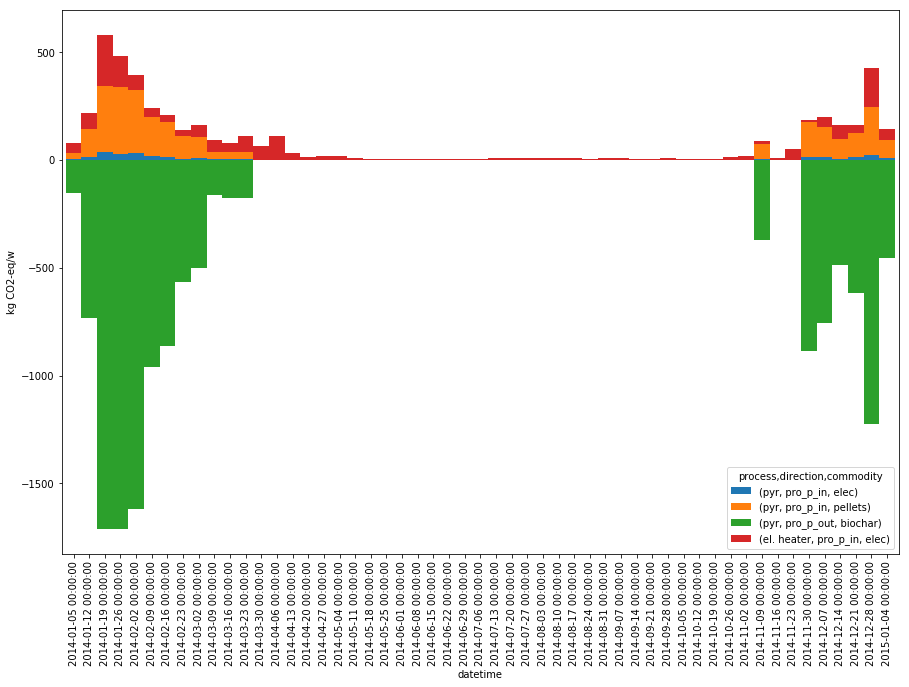

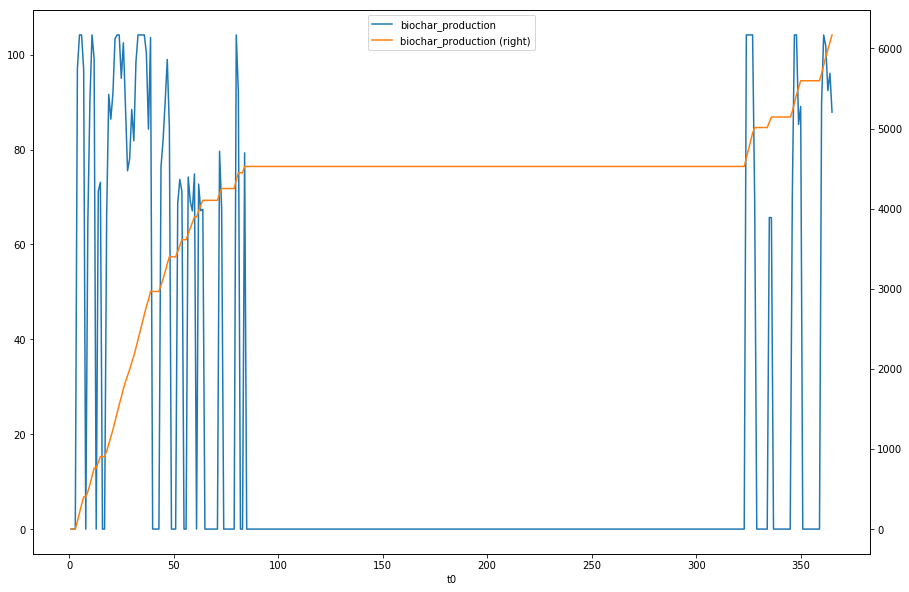

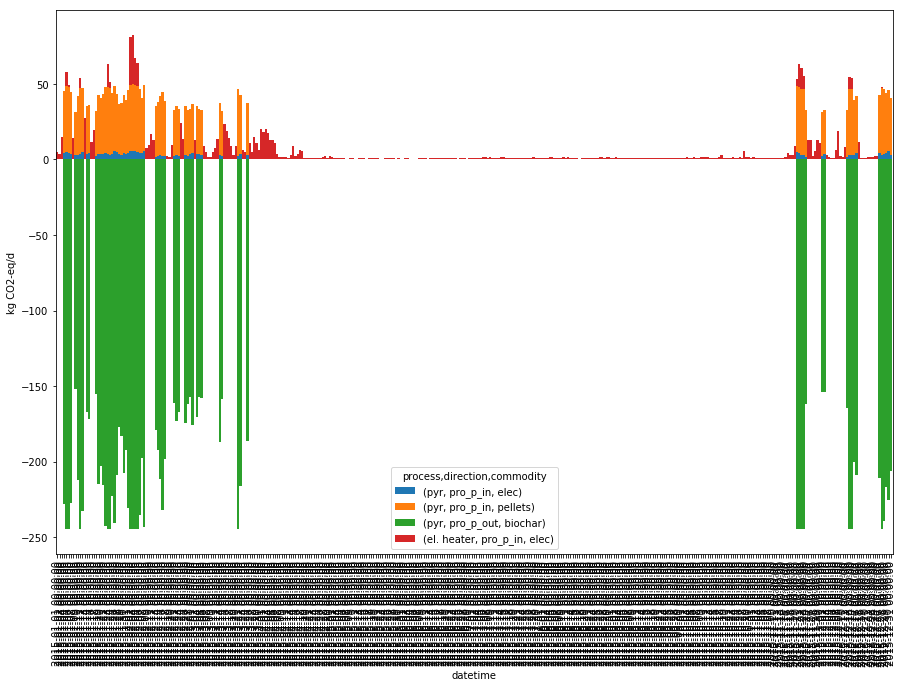

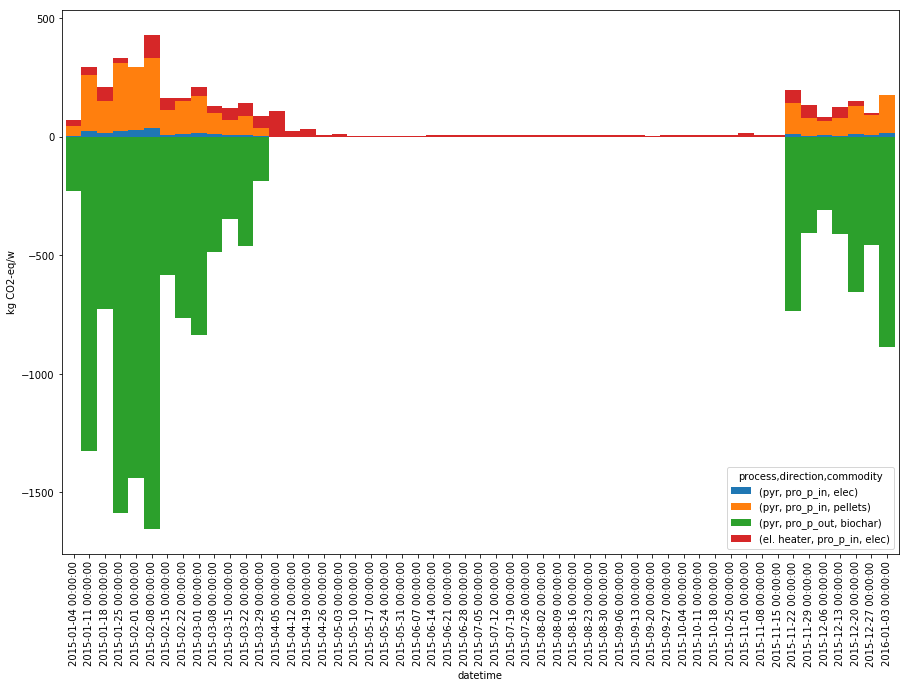

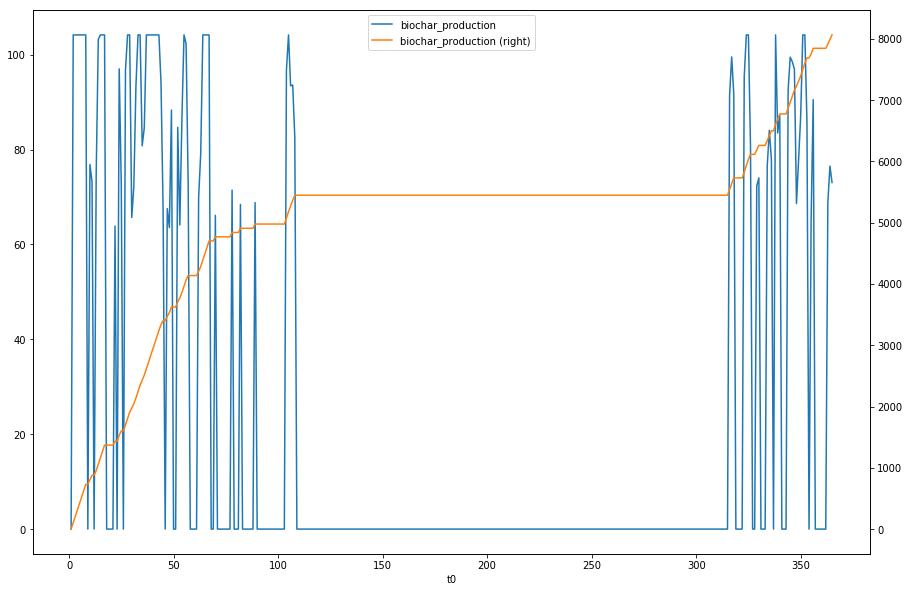

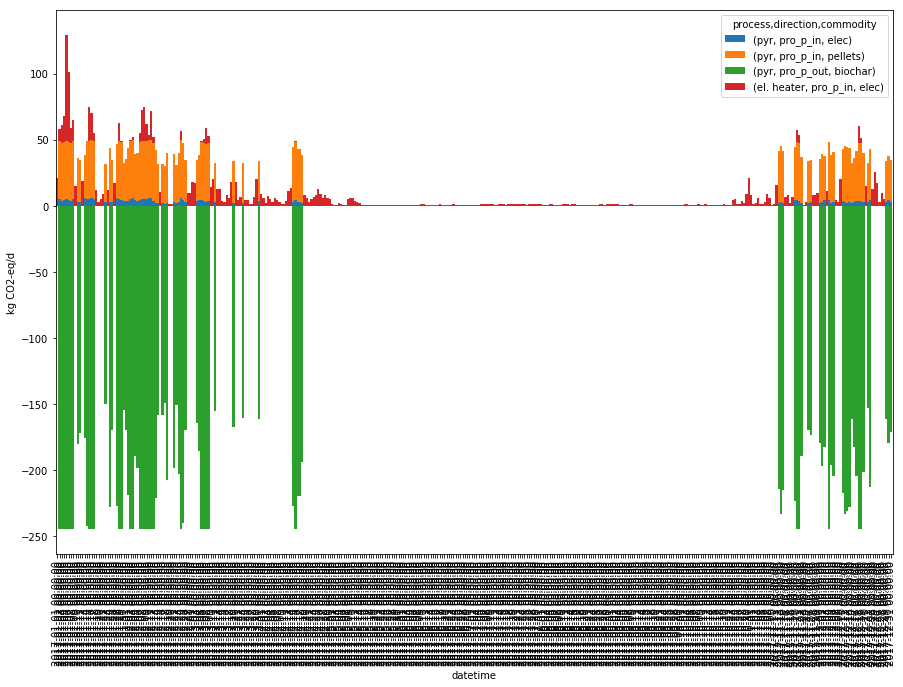

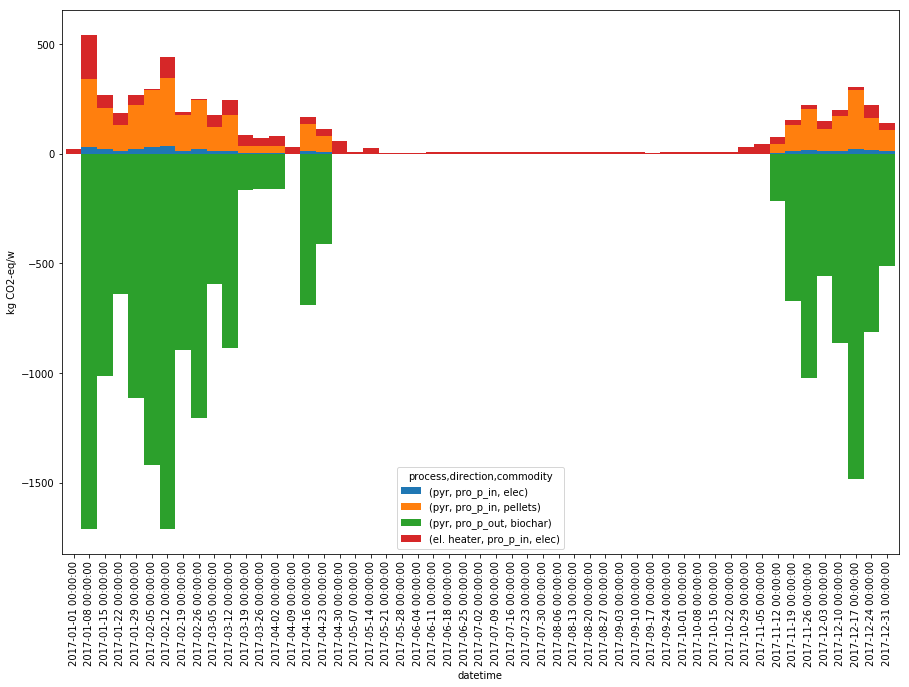

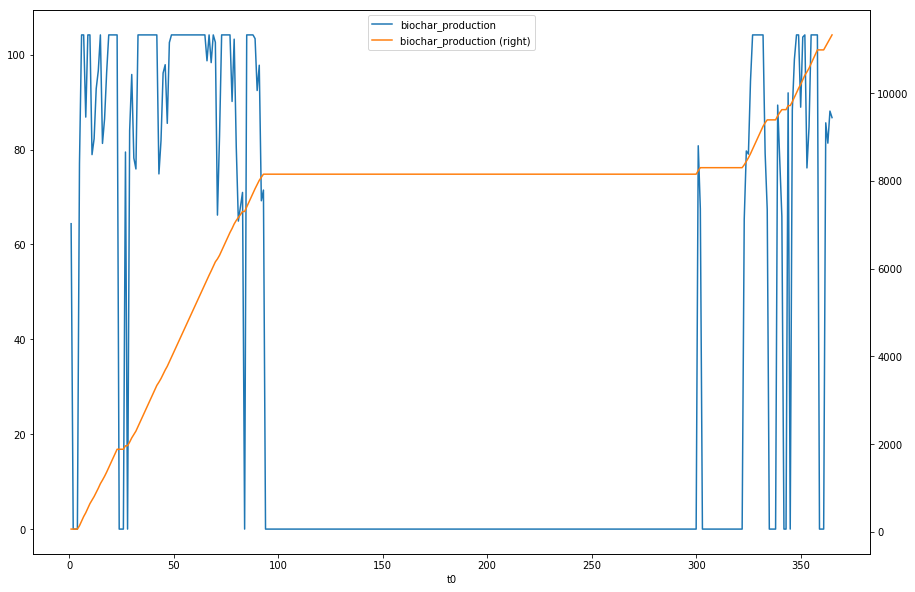

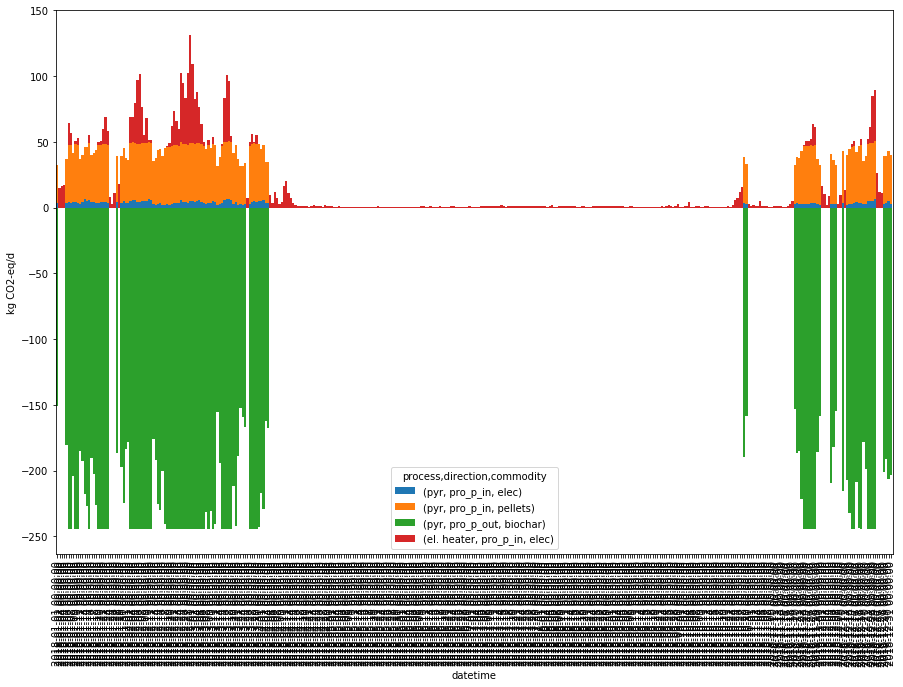

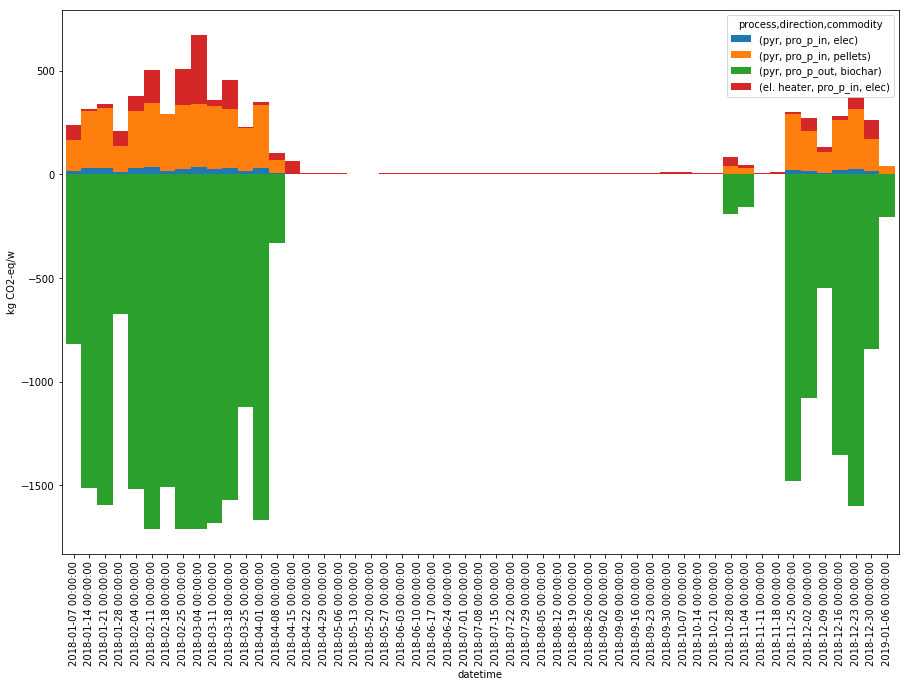

In [13]:
#years =['2008','2009','2010','2011','2012','2013','2014', '2015', '2016', '2017', '2018']
years =['2014', '2015', '2017', '2018'] # skip 2016/2012, bissextile
years = ['2003', '2005','2006', '2007', '2009', '2010','2011','2013', '2014','2015', '2017', '2018']
# test small
# 2010 >>> https://en.wikipedia.org/wiki/2010_Swedish_cold_waves
for year in years:
    tmp = fs.selectInterval(farm_demand.resample('D').mean(), year+'-01-01', year+'-12-31')
    print(year, '>>> ', tmp.sum().sum()*p2e, ' kWh/yr')
    scenario = 'loop_cc_'+year
    # plants parsed and ficus file written
    farm_supply = fs.run_scn_ficus_writer(plants_folder, plants_file,
                                          tb, tb_start, tb_end, 
                                          commodities_imp, commodities_exp, import_max, export_max, 
                                          el_folder, el_file, el_tab, 
                                          ef_pellets, biochar_seq, 
                                          plantsAvailable, farm_demand, year, elec_yr,
                                          ficus_folder, ficus_file, scenario)
    # run ficus milp
    prob = ff.run_ficus(ficus_folder+ficus_file+scenario+'.xlsx', opt = 'cplex', MipGap = 0)

    # saving ficus report and figures
    result_dir = ff.prepare_result_directory(ficus_result_folder,ficus_file+scenario)
    ff.report(prob, result_dir)
    ff.result_figures(result_dir,prob=prob, show=False)
    # printing final report and bw2-LCA
    
    lci_t, lcia_t = fb.run_scn_bw2(result_dir, 'result-'+proj+'_'+scenario+'.xlsx', year, p2e, 
                      plantsAvailable, ficus_folder, ficus_file, scenario,
                      proj, fg_db, fresh_db=False)